In [231]:
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [233]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [235]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

*Functions to plot graphs*

In [237]:
def categorical_plot(data, colname,xticks=0):
    fig, axs = plt.subplots(1,3,figsize=(20,6))
    target1 = ((data[data.TARGET == 1][colname].value_counts().sort_values(ascending=False) / data[colname].value_counts().sort_values(ascending=False))*100).round(2)
    target0 = ((data[data.TARGET == 0][colname].value_counts().sort_values(ascending=False) / data[colname].value_counts().sort_values(ascending=False))*100).round(2)
    target = ((data[colname].value_counts().sort_values(ascending=False) / data.shape[0])*100).round(2)
    # sns.countplot(x= colname,data=data, ax=axs[0]).set_title("Distribution of Loans based on "+colname)
    axs[0].set(xlabel=colname, ylabel='Total Percentage')
    sns.barplot(x= target.index,y=target.values,ax=axs[0]).set_title("Distribution of Loans based on "+colname)
    #sns.countplot(x= colname,data=data, hue='TARGET',ax=axs[0, 1]).set_title(colname+" Distribution by Target")
    sns.barplot(x= target0.index,y=target0.values,ax=axs[1]).set_title(colname+" by Non Defaulter")
    axs[1].set(xlabel=colname, ylabel='Percentage of Non Defaulters')
    sns.barplot(x= target1.index,y=target1.values,ax=axs[2]).set_title(colname+" by Defaulter")
    plot3 =axs[2].set(xlabel=colname, ylabel='Percentage of Defaulters')
    def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          if height>0:
            ax.text(rect.get_x()+0.2, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12,family='serif',style="normal",weight="light")
    for ax in axs.flatten():
        for label in ax.get_xticklabels():
            label.set_rotation(xticks)
            autolabel(ax.patches)

    plt.show()

def numerical_plot(data,colname):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("TARGET by "+ colname)
    sns.kdeplot(data.loc[(df_app_data['TARGET']==0),colname], color="g", label="Non Defaulter",legend=True)
    sns.kdeplot(data.loc[(df_app_data['TARGET']==1),colname],color="r", label="Defaulter",legend=True) 
    plt.legend()
    plt.subplot(1,2,2)
    plt.title("BOXPLOT TARGET by "+ colname)
    sns.boxplot(y=colname, data=data, x="TARGET")
    plt.show()

def numerical_histplot(data,colname):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("TARGET by "+ colname)
    sns.histplot(data.loc[(df_app_data['TARGET']==0),colname],color='g',label="Non Defaulter",bins=10)
    sns.histplot(data.loc[(df_app_data['TARGET']==1),colname],color='r',bins=10, label="Defaulter")
    plt.ticklabel_format(style='plain', axis='x',useOffset=False)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    plt.title("BOXPLOT TARGET by "+ colname)
    sns.boxplot(y=colname, data=data, x="TARGET")
    plt.show()

def corr_plot(data, reduced_col):
    k = len(reduced_col) #number of variables for heatmap
    cols = data.loc[:,reduced_col].corr()['TARGET'].index
    cm = data[cols].corr()
    mask = np.triu(np.ones_like(cm, dtype=bool))
    cmap=sns.diverging_palette(20, 220, n=200)
    plt.figure(figsize=(14,14))
    sns.heatmap(cm,cmap = cmap,annot=True,mask=mask)
    plt.show()





**Reading Application Data**



In [239]:
df_app_data = pd.read_csv('application_data.csv')

print("Application data csv head:\n")
df_app_data.head()



Application data csv head:



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

Checking shape of Data set and describe function



In [241]:
df_app_data.shape

(307511, 122)

In [243]:
df_app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

**Missing values in the Data**

In [245]:
null_values = 100 * (df_app_data.isnull().sum()/df_app_data.shape[0])
null_values

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

**Missing Values more than 45 percent**

In [247]:
null_values[null_values>45].sort_values(ascending=False)

Series([], dtype: float64)

 **Dropping the Columns with more than 45% null values. There are 49 columns with more than 50% missing values**

In [249]:
cols = null_values[null_values>45].sort_values(ascending=False).index
df_app_data.drop(labels=cols,axis=1,inplace=True)
df_app_data.shape

(307511, 73)

 **Columns with less than 13% null values for possible imputation**

In [251]:
null_values = 100 * (df_app_data.isnull().sum()/df_app_data.shape[0]) 
null_values[(null_values <13) & (null_values>0)]

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

**Checking for datatypes of Columns**

In [253]:
df_app_data.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [255]:
colstoint = [ 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS']
for cols in colstoint:
  df_app_data[cols]=df_app_data[cols].astype('Int64',errors='ignore')


In [257]:
df_app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**Analyzing the target Variable**


In [259]:
target = df_app_data["TARGET"].value_counts(normalize=True)

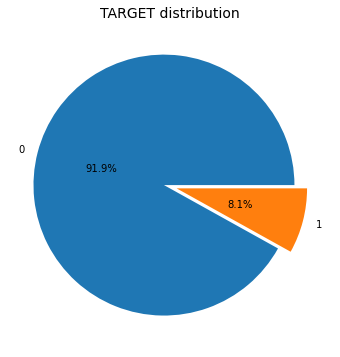

In [261]:
pie, ax = plt.subplots(figsize=[10,6])
labels = target.keys()
plt.pie(x=target, autopct="%.1f%%", labels=labels, pctdistance=0.5,explode=[0.05]*2)
plt.title("TARGET distribution", fontsize=14);


**From the TARGET variable we can see that around 8.1% are clients with payment difficulties**

**USER DEMOGRAPHICS**

  **1. GENDER**

  **Analyzing CODE_GENDER - Gender of the client**

In [263]:
df_app_data['CODE_GENDER'].isnull().sum()

0

In [265]:
df_app_data['CODE_GENDER'].value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

 **There are only 4 values for XNA Type and no Null Values.<br>
XNA values can be imputed as mode of the category - Female as there are no Male characteristics in the XNA data**

In [267]:
df_app_data.loc[df_app_data['CODE_GENDER']=='XNA']

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [269]:
df_app_data.loc[df_app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [271]:
df_app_data['CODE_GENDER'].value_counts(normalize=True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

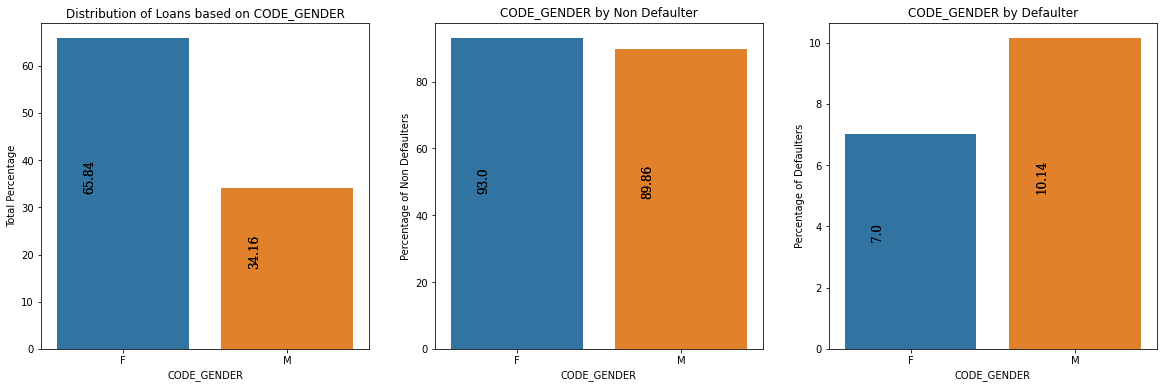

In [273]:
categorical_plot(df_app_data,'CODE_GENDER')
plt.show()

**66% Females have applied for loan and 34% males have applied for loan.<br>
Out of the 34% males who applied for loan - 10% are likely to default<br>
Out of the 66% females who applied for loan - 7% are likely to default<br>**

In [275]:
df_default_data = df_app_data[df_app_data['TARGET'] == 1]

In [277]:
df_nondefault_data = df_app_data[df_app_data['TARGET'] == 0]

  **2.HOUSE/CAR OWNERSHIP**


  **Analyzing FLAG_OWN_CAR - Flag if the client owns a car**

In [279]:
df_app_data['FLAG_OWN_CAR'].isnull().sum()

0

There are no null values

In [281]:
df_app_data['FLAG_OWN_CAR'].value_counts(normalize=True)

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64

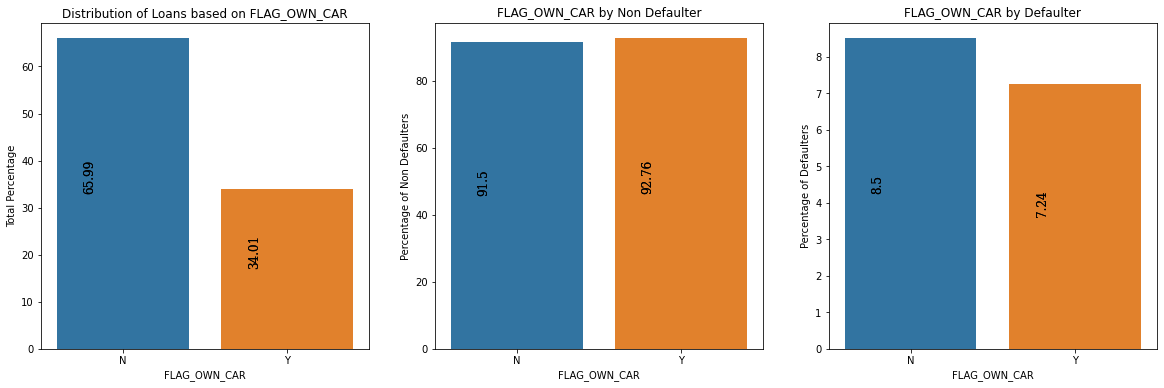

In [283]:
categorical_plot(df_app_data,'FLAG_OWN_CAR')

**34% of the people who applied for loan own a car.<br>
People who dont own a car are more likely to default.**

  **Analyzing FLAG_OWN_REALTY - Flag if client owns a house or flat**

In [285]:
df_app_data['FLAG_OWN_REALTY'].isnull().sum()

0

There are no null values

In [287]:
df_app_data['FLAG_OWN_REALTY'].value_counts(normalize=True)

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

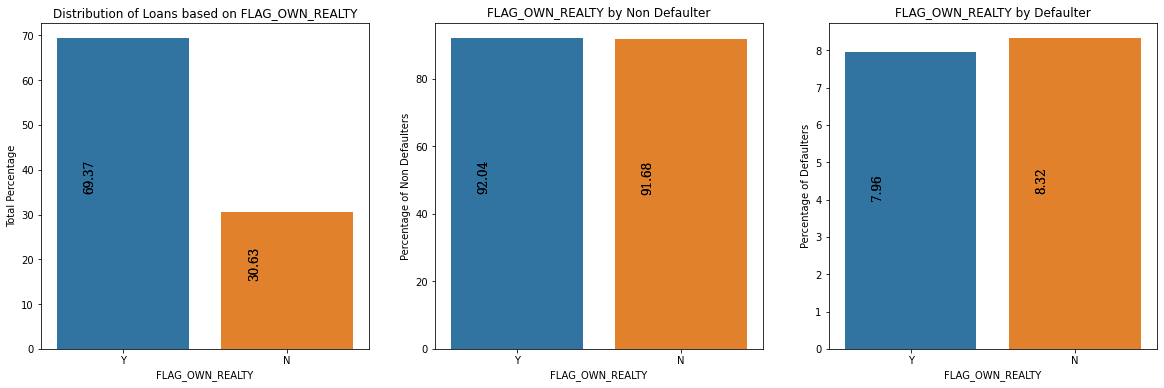

In [289]:
categorical_plot(df_app_data,'FLAG_OWN_REALTY')

**69.3% of people who have applied for loan own a house.<br>
People who dont own house are more likely to default**

**3. AGE**

In [291]:
df_app_data['DAYS_BIRTH'].isnull().sum()

0

 There are no Null values

  **Converting the age to years as age is provided in days at the time of application**

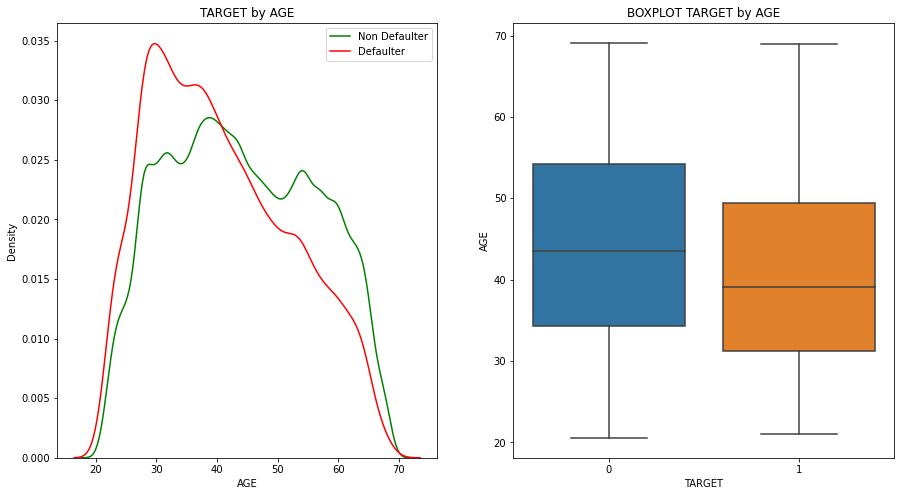

In [293]:
df_app_data['AGE']= abs(df_app_data['DAYS_BIRTH']/365)
birthyear_d= df_app_data[df_app_data['TARGET']==1]['AGE']
birthyear_nd= df_app_data[df_app_data['TARGET']==0]['AGE']
numerical_plot(df_app_data,'AGE')

  **Clients in age group >40 are less likely to default loans**

 **4.EMPLOYMENT**

  **Analyzing NAME_INCOME_TYPE - Clients income type (businessman, working, maternity leave,…)**




In [295]:
df_app_data['NAME_INCOME_TYPE'].isnull().sum()

0

There are no null values

In [297]:
df_app_data['NAME_INCOME_TYPE'].value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

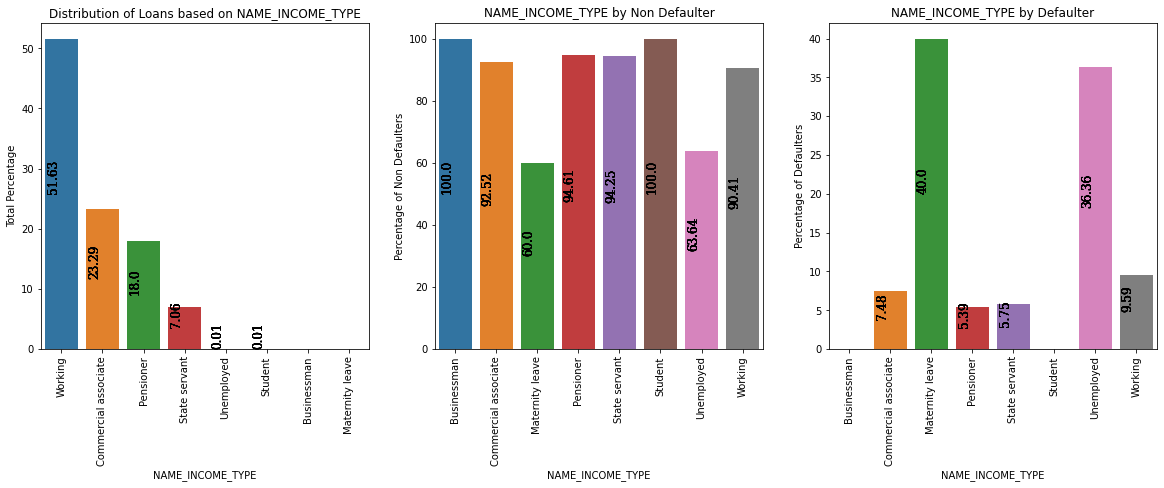

In [299]:
categorical_plot(df_app_data,'NAME_INCOME_TYPE',xticks=90)

**51% of loans are applied working people followed by 23.2% commercial associates.<br> Maternity Leave and Unemployed are the most likely to default loans.<br>**

  **Analyzing DAYS_EMPLOYED - How many days before the application the person started current employment**

Missing Values in DAYS_EMPLOYED

In [301]:
df_app_data['DAYS_EMPLOYED'].isnull().sum()

0

There are no null values

Converting it into years

In [303]:
df_app_data['YEAR_EMPLOYED']= abs(df_app_data['DAYS_EMPLOYED']/365)

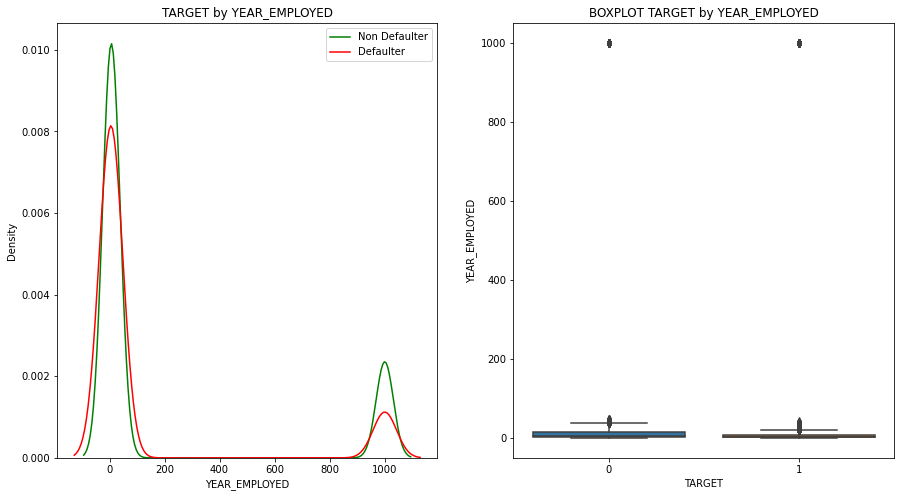

In [305]:
numerical_plot(df_app_data,'YEAR_EMPLOYED')

In [307]:
(df_app_data['YEAR_EMPLOYED']).value_counts().head(20)

1000.665753    55374
0.547945         156
0.613699         152
0.630137         151
0.545205         151
0.580822         150
0.627397         143
1.052055         143
0.632877         140
0.567123         138
0.589041         138
0.591781         137
0.515068         137
0.317808         136
0.536986         136
0.608219         135
0.528767         134
0.534247         133
0.586301         132
0.583562         131
Name: YEAR_EMPLOYED, dtype: int64

**When converted to years, we get 55374 entries for 1000 years which implies we need further analysis**

 **Analyzing Days Employed excluding 1000 years**

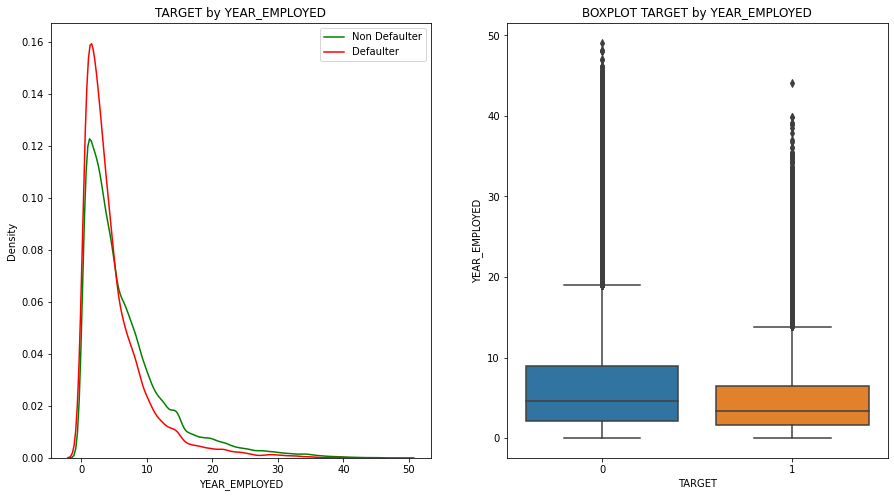

In [309]:
numerical_plot(df_app_data[df_app_data['YEAR_EMPLOYED']<1000],'YEAR_EMPLOYED')

 If we exclude 1000 years, we can observe that clients who are employed for 0-10 years are more likely to default

 **Analyzing OCCUPATION_TYPE - What kind of occupation does the client have**

In [311]:
df_app_data['OCCUPATION_TYPE'].isnull().sum()/df_app_data.shape[0]

0.31345545362604915

  31% values are null. Since 31% percentage is huge, we cannot impute it with mode of the columns. We will be proceeding with the analysis without imputing

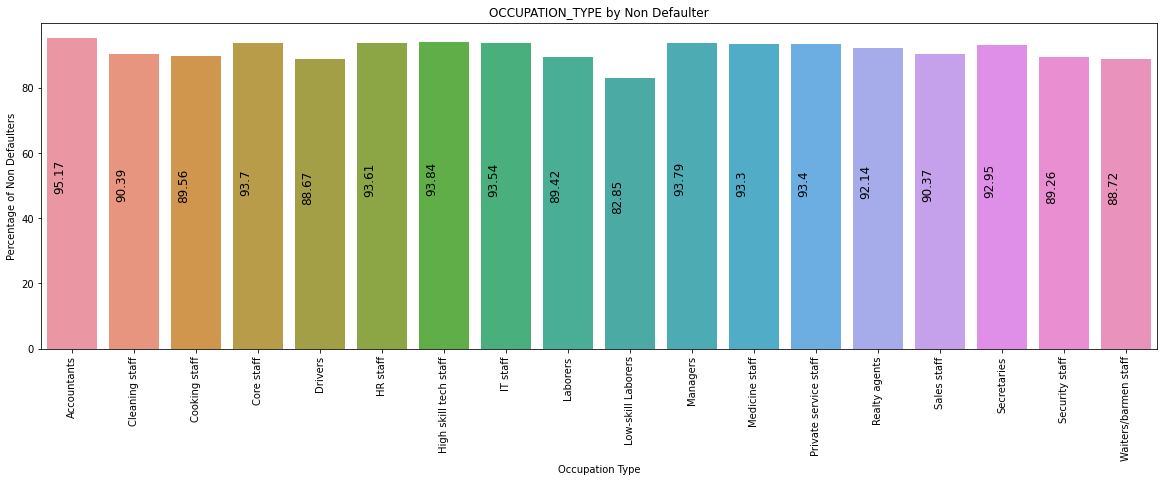

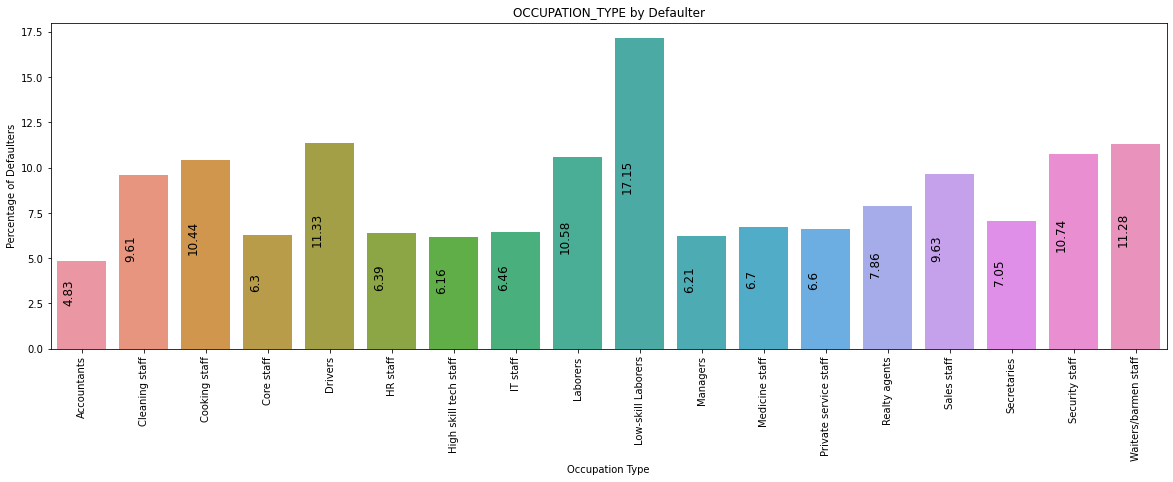

In [313]:
# plt.figure(figsize=(20,6))
fig, ax = plt.subplots(figsize=(20,6))
org_p1 = round((df_app_data[df_app_data.TARGET == 1]['OCCUPATION_TYPE'].value_counts() / df_app_data['OCCUPATION_TYPE'].value_counts())*100,2)
org_p0 = round((df_app_data[df_app_data.TARGET == 0]['OCCUPATION_TYPE'].value_counts() / df_app_data['OCCUPATION_TYPE'].value_counts())*100,2)
sns.barplot(x= org_p0.index,y=org_p0.values,ax=ax).set_title('OCCUPATION_TYPE'+" by Non Defaulter")
plt.ylabel("Percentage of Non Defaulters")
plt.xlabel("Occupation Type")
plt.xticks(rotation=90)
def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          if height>0:
            ax.text(rect.get_x()+0.2, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12)
   
autolabel(ax.patches)
plt.show()
# plt.figure(figsize=(20,6))
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x= org_p1.index,y=org_p1.values,ax=ax).set_title('OCCUPATION_TYPE'+" by Defaulter")
plt.ylabel("Percentage of Defaulters")
plt.xlabel("Occupation Type")
plt.xticks(rotation=90)
autolabel(ax.patches)
plt.show()

In [315]:
df_app_data[df_app_data.TARGET == 1]['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.314768
Sales staff              0.166712
Drivers                  0.113603
Core staff               0.093708
Managers                 0.071602
Security staff           0.038928
High skill tech staff    0.037796
Cooking staff            0.033483
Medicine staff           0.030841
Accountants              0.025557
Cleaning staff           0.024101
Low-skill Laborers       0.019356
Private service staff    0.009435
Waiters/barmen staff     0.008195
Secretaries              0.004960
Realty agents            0.003181
HR staff                 0.001941
IT staff                 0.001833
Name: OCCUPATION_TYPE, dtype: float64

**Low skill labourers,Drivers,Security Staff and waiters are more likely to default compared to Accountants, Managers and other high skill jobs**

 **Analyzing Organiztion_Type - Type of organization where client works**

In [317]:
df_app_data['ORGANIZATION_TYPE'].isnull().sum()

0

  There are no null values

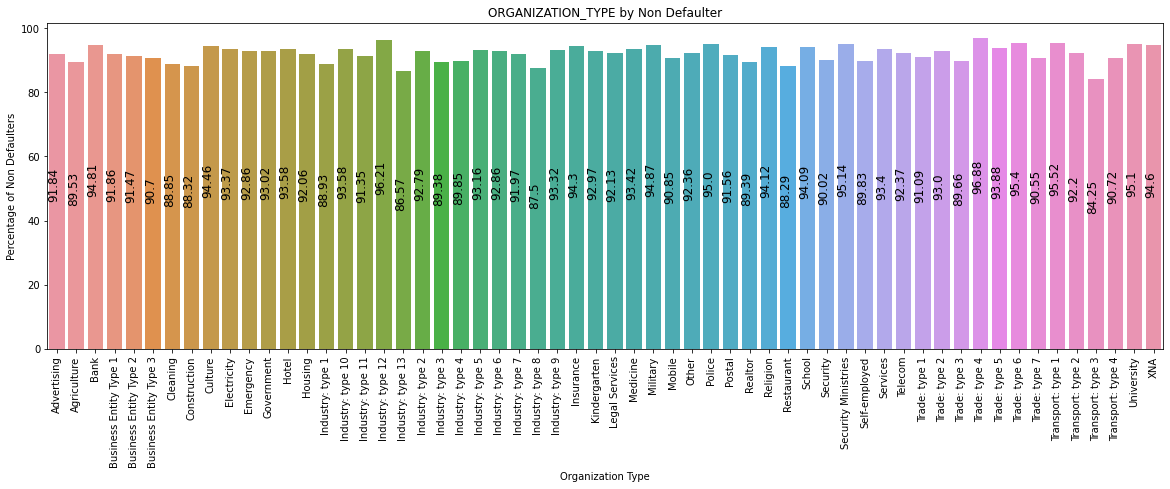

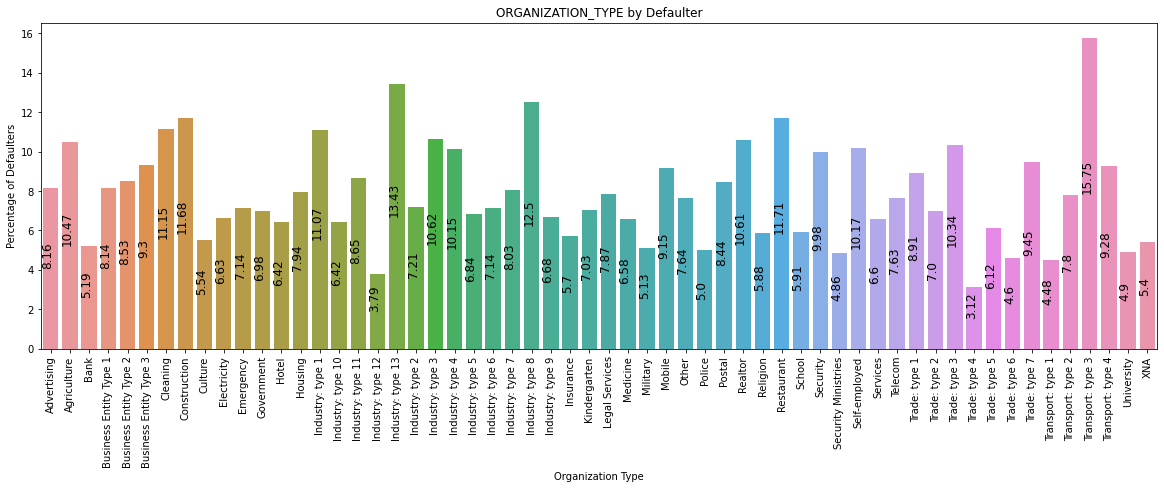

In [319]:
fig, ax = plt.subplots(figsize=(20,6))
org_p1 = round((df_app_data[df_app_data.TARGET == 1]['ORGANIZATION_TYPE'].value_counts() / df_app_data['ORGANIZATION_TYPE'].value_counts())*100,2)
org_p0 = round((df_app_data[df_app_data.TARGET == 0]['ORGANIZATION_TYPE'].value_counts() / df_app_data['ORGANIZATION_TYPE'].value_counts())*100,2)
sns.barplot(x= org_p0.index,y=org_p0.values,ax=ax).set_title('ORGANIZATION_TYPE'+" by Non Defaulter")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Non Defaulters")
plt.xlabel("Organization Type")
def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x()+0.25, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12)
   
autolabel(ax.patches)
plt.show()

fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x= org_p1.index,y=org_p1.values,ax=ax).set_title('ORGANIZATION_TYPE'+" by Defaulter")
plt.ylabel("Percentage of Defaulters")
plt.xlabel("Organization Type")
plt.xticks(rotation=90)
autolabel(ax.patches)
plt.show()

**Transport: type 3 ,Industry: type 13  and Industry: type 8 are more likely to default**

 **Binning Transport Type into Transport, Industry Types into Industry, Business Entity into Business and Trade type to Trade**

In [321]:
def Orgfunc(x):
  if x.find("Industry")==0:
    return "Industry"
  elif x.find("Business")==0:
    return "Business"
  elif x.find("Transport")==0:
    return "Transport"
  elif x.find("Trade")==0: 
    return "Trade"
  else:
    return x;
df_app_data["ORGANIZATION_TYPE_REDUCED"] = df_app_data["ORGANIZATION_TYPE"].apply(lambda x: Orgfunc(x))

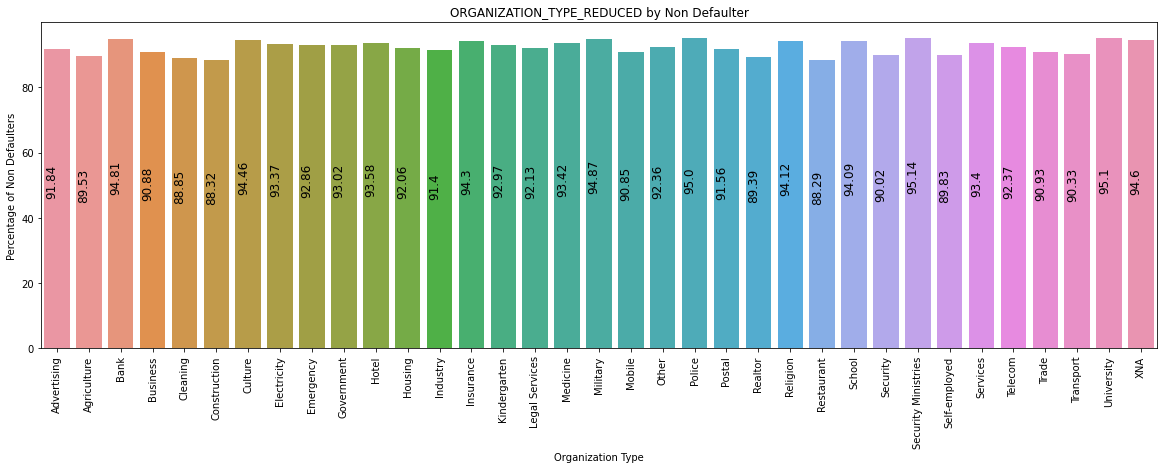

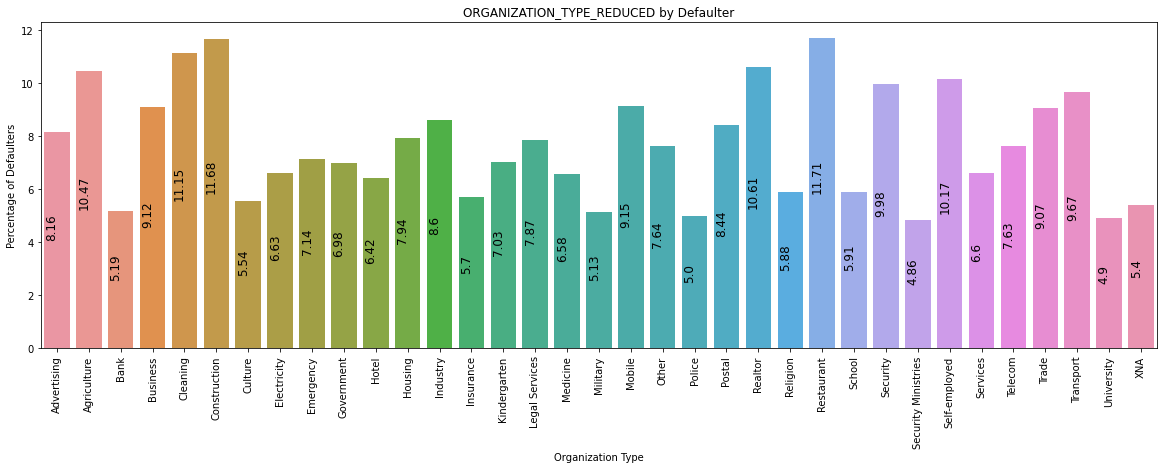

In [323]:
fig, ax = plt.subplots(figsize=(20,6))
org_p1 = round((df_app_data[df_app_data.TARGET == 1]['ORGANIZATION_TYPE_REDUCED'].value_counts() / df_app_data['ORGANIZATION_TYPE_REDUCED'].value_counts())*100,2)
org_p0 = round((df_app_data[df_app_data.TARGET == 0]['ORGANIZATION_TYPE_REDUCED'].value_counts() / df_app_data['ORGANIZATION_TYPE_REDUCED'].value_counts())*100,2)
sns.barplot(x= org_p0.index,y=org_p0.values,ax=ax).set_title('ORGANIZATION_TYPE_REDUCED'+" by Non Defaulter")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Non Defaulters")
plt.xlabel("Organization Type")
def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x()+0.25, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12)
   
autolabel(ax.patches)
plt.show()

fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x= org_p1.index,y=org_p1.values,ax=ax).set_title('ORGANIZATION_TYPE_REDUCED'+" by Defaulter")
plt.ylabel("Percentage of Defaulters")
plt.xlabel("Organization Type")
plt.xticks(rotation=90)
autolabel(ax.patches)
plt.show()

Clients from Restaurant, Construction and CLeaning are more likely to default

In [325]:
df_app_data['ORGANIZATION_TYPE_REDUCED'].value_counts(normalize=True).sort_values(ascending=False).head(5)

Business         0.274881
XNA              0.180072
Self-employed    0.124913
Other            0.054252
Trade            0.046551
Name: ORGANIZATION_TYPE_REDUCED, dtype: float64

In [327]:
org_p1 = round((df_app_data[df_app_data.TARGET == 0]['ORGANIZATION_TYPE_REDUCED'].value_counts() / df_app_data['ORGANIZATION_TYPE_REDUCED'].value_counts())*100,2).sort_values(ascending=False)
org_p1

Security Ministries    95.14
University             95.10
Police                 95.00
Military               94.87
Bank                   94.81
XNA                    94.60
Culture                94.46
Insurance              94.30
Religion               94.12
School                 94.09
Hotel                  93.58
Medicine               93.42
Services               93.40
Electricity            93.37
Government             93.02
Kindergarten           92.97
Emergency              92.86
Telecom                92.37
Other                  92.36
Legal Services         92.13
Housing                92.06
Advertising            91.84
Postal                 91.56
Industry               91.40
Trade                  90.93
Business               90.88
Mobile                 90.85
Transport              90.33
Security               90.02
Self-employed          89.83
Agriculture            89.53
Realtor                89.39
Cleaning               88.85
Construction           88.32
Restaurant    

 **5.EDUCATION**

In [329]:
df_app_data['NAME_EDUCATION_TYPE'].isnull().sum()

0

In [331]:
df_app_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

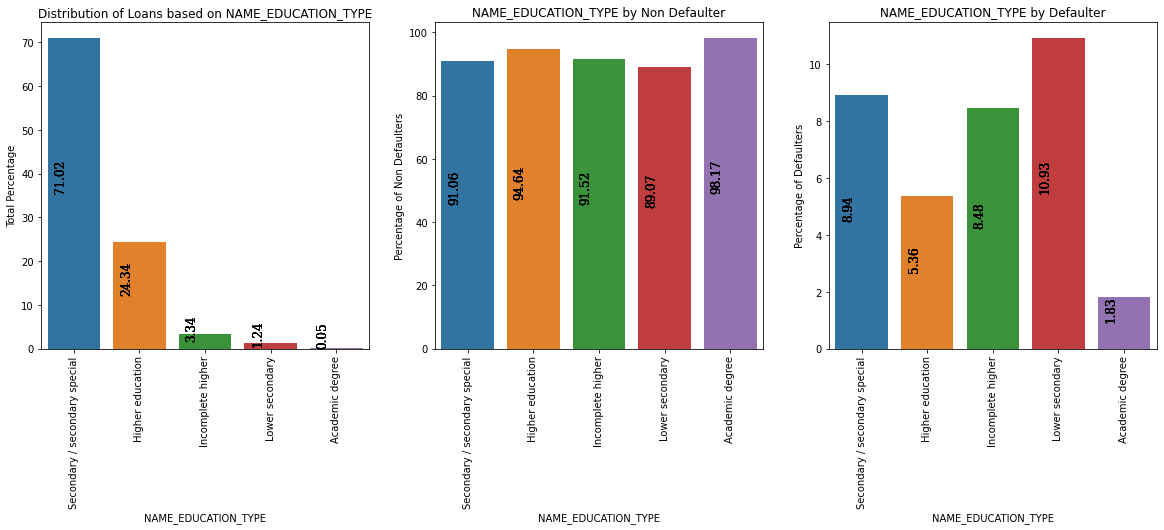

In [333]:
categorical_plot(df_app_data,'NAME_EDUCATION_TYPE',xticks=90)

**71% of loans are applied by people with Secondary education.<br>
People with lower secondary education are more likely to default.<br>
People with Academic degree are less likely to default loans<br>**

  **6. Contact Rating**

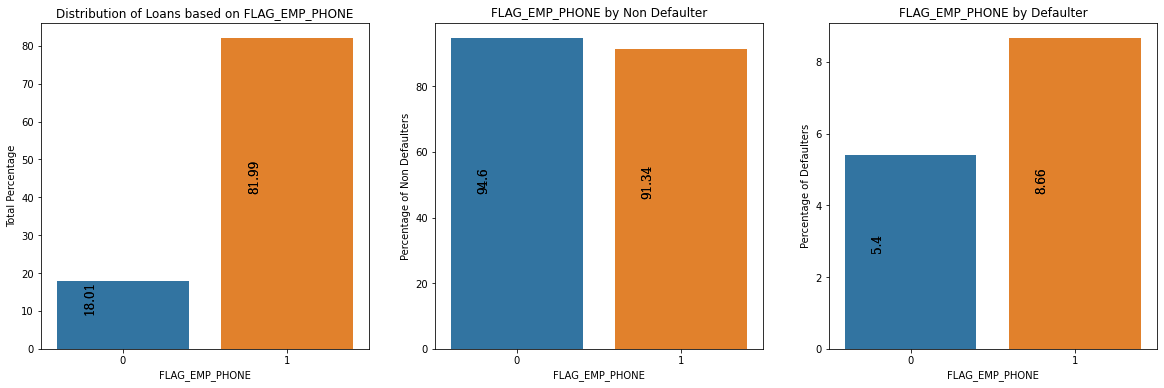

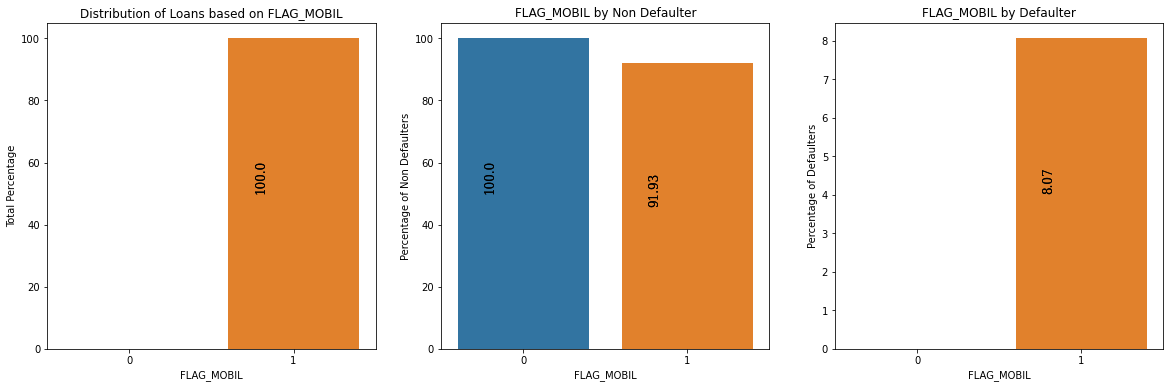

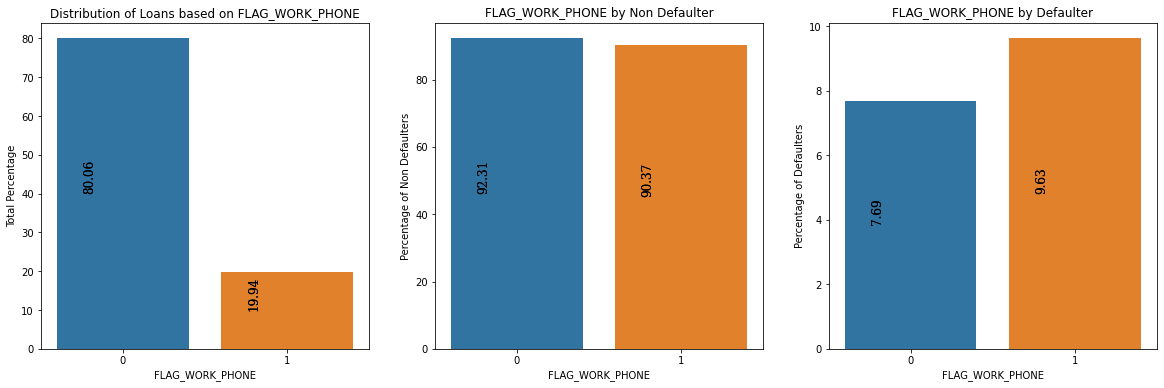

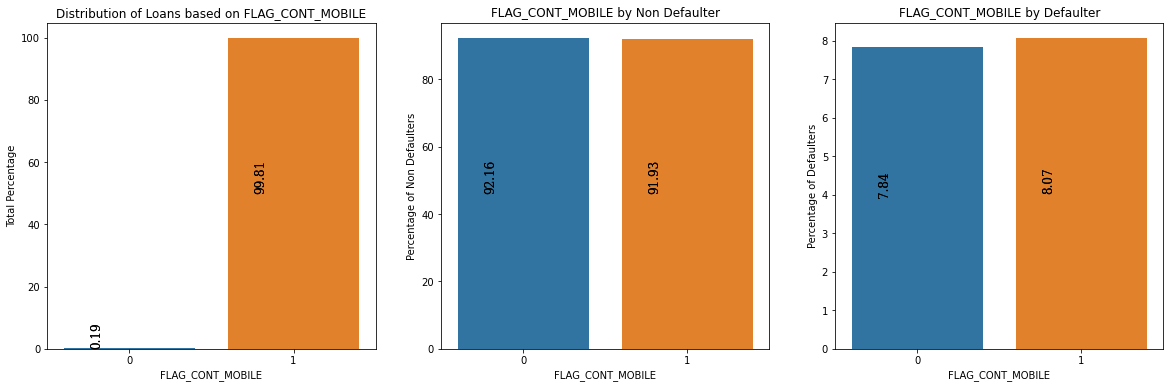

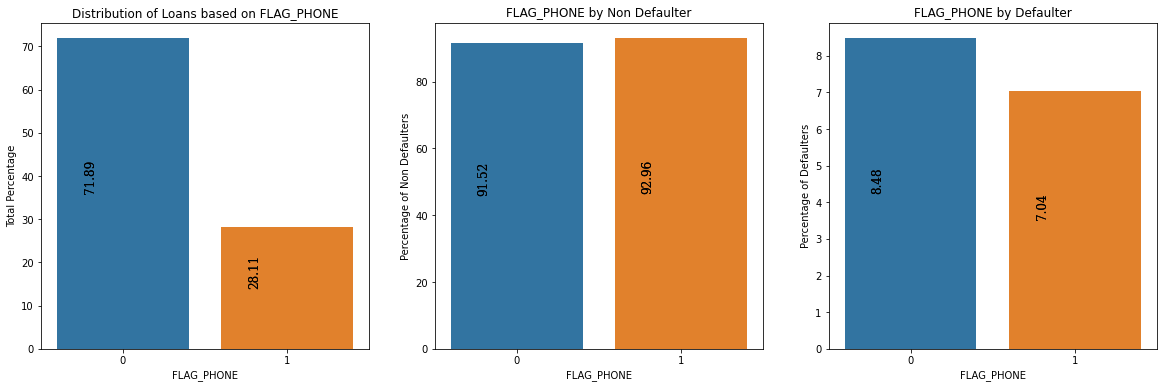

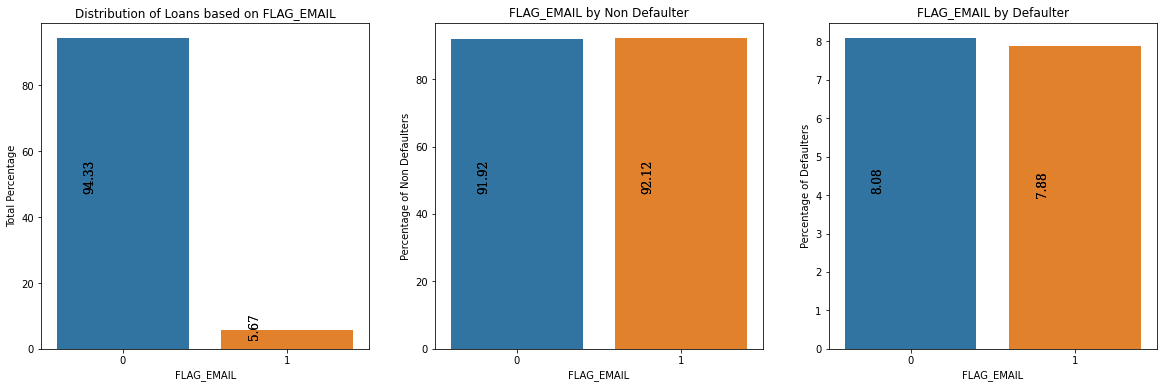

In [335]:
cols = ['FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
for col in cols:
  categorical_plot(df_app_data,col)

Combing all the contact information related ratings and analyzing

In [337]:

df_app_data['CONTACT RATING']= df_app_data['FLAG_MOBIL'] + df_app_data['FLAG_EMP_PHONE'] + df_app_data['FLAG_WORK_PHONE'] + df_app_data['FLAG_CONT_MOBILE'] + df_app_data['FLAG_PHONE']+ df_app_data['FLAG_EMAIL']


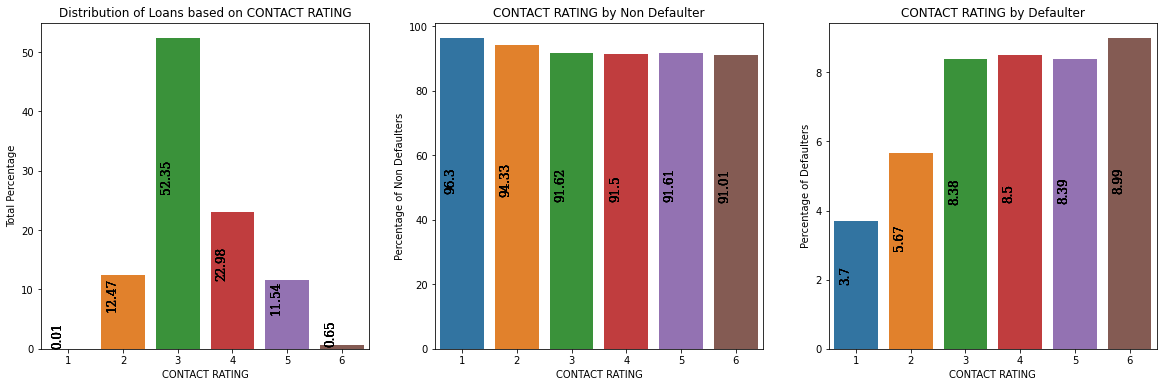

In [339]:
categorical_plot(df_app_data,'CONTACT RATING')

**Clients who have provided all Information are more likely to default**

In [341]:
# cols = ['FLAG_EMP_PHONE','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
# df=df_app_data[cols]
# t = (df.set_index('TARGET')
#  .groupby(level='TARGET')
# # to do the count of columns nj, wd, wpt against the column ptype using 
# # groupby + value_counts
#  .apply(lambda g: g.apply(pd.value_counts))
#  .unstack(level=1)
#  .fillna(0))
# plt.figure(figsize=(18,10))
# sns.heatmap(t,annot=True,fmt='g', cmap="Blues")

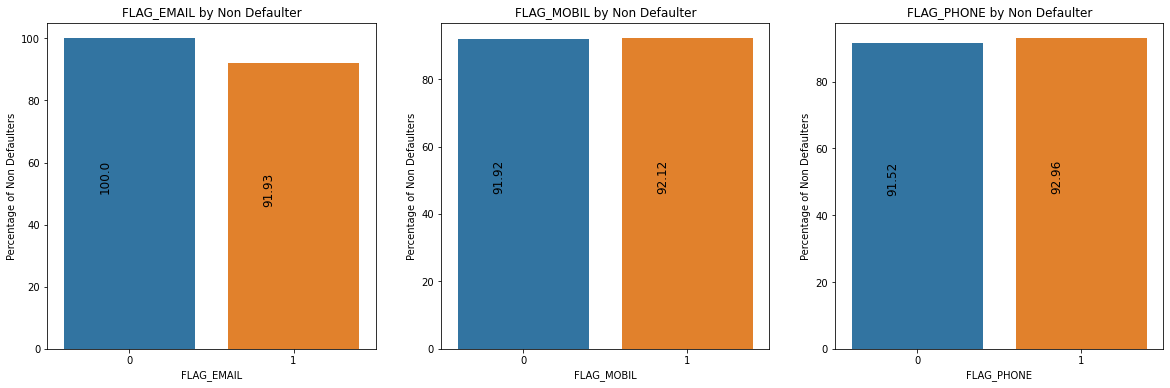

In [343]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
target1 = ((df_nondefault_data['FLAG_EMAIL'].value_counts().sort_values(ascending=False) / df_app_data['FLAG_EMAIL'].value_counts().sort_values(ascending=False))*100).round(2)
target0 = ((df_nondefault_data["FLAG_MOBIL"].value_counts().sort_values(ascending=False) / df_app_data['FLAG_MOBIL'].value_counts().sort_values(ascending=False))*100).round(2)
target2 = ((df_nondefault_data['FLAG_PHONE'].value_counts().sort_values(ascending=False) / df_app_data['FLAG_PHONE'].value_counts().sort_values(ascending=False))*100).round(2)
sns.barplot(x= target0.index,y=target0.values,ax=axs[0]).set_title('FLAG_EMAIL'+" by Non Defaulter")
axs[0].set(xlabel='FLAG_EMAIL', ylabel='Percentage of Non Defaulters')
sns.barplot(x= target1.index,y=target1.values,ax=axs[1]).set_title('FLAG_MOBIL'+" by Non Defaulter")
axs[1].set(xlabel='FLAG_MOBIL', ylabel='Percentage of Non Defaulters')
sns.barplot(x= target2.index,y=target2.values,ax=axs[2]).set_title('FLAG_PHONE'+" by Non Defaulter")
axs[2].set(xlabel='FLAG_PHONE', ylabel='Percentage of Non Defaulters')
def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x()+0.25, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12)
for ax in axs.flatten():
      autolabel(ax.patches)
          
plt.show()

posx and posy should be finite values
posx and posy should be finite values


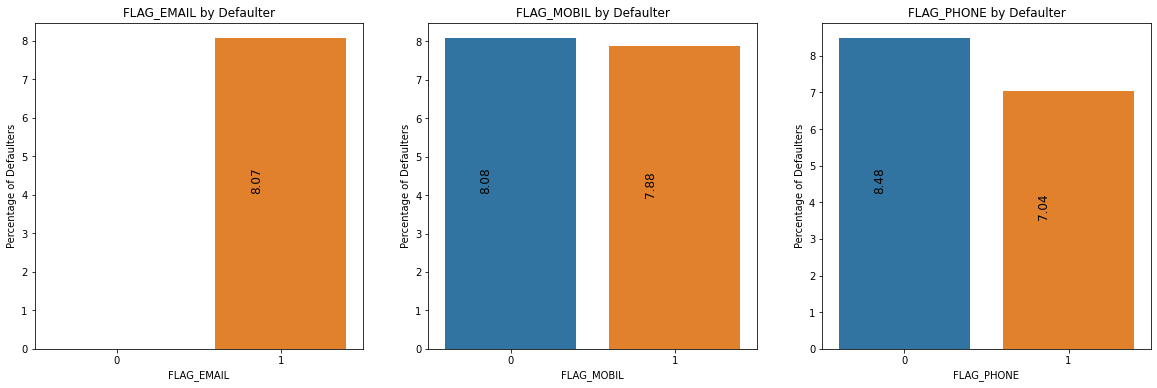

In [345]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
target1 = ((df_default_data['FLAG_EMAIL'].value_counts().sort_values(ascending=False) / df_app_data['FLAG_EMAIL'].value_counts().sort_values(ascending=False))*100).round(2)
target0 = ((df_default_data["FLAG_MOBIL"].value_counts().sort_values(ascending=False) / df_app_data['FLAG_MOBIL'].value_counts().sort_values(ascending=False))*100).round(2)
target2 = ((df_default_data['FLAG_PHONE'].value_counts().sort_values(ascending=False) / df_app_data['FLAG_PHONE'].value_counts().sort_values(ascending=False))*100).round(2)
sns.barplot(x= target0.index,y=target0.values,ax=axs[0]).set_title('FLAG_EMAIL'+" by Defaulter")
axs[0].set(xlabel='FLAG_EMAIL', ylabel='Percentage of Defaulters')
sns.barplot(x= target1.index,y=target1.values,ax=axs[1]).set_title('FLAG_MOBIL'+" by Defaulter")
axs[1].set(xlabel='FLAG_MOBIL', ylabel='Percentage of Defaulters')
sns.barplot(x= target2.index,y=target2.values,ax=axs[2]).set_title('FLAG_PHONE'+" by Defaulter")
axs[2].set(xlabel='FLAG_PHONE', ylabel='Percentage of Defaulters')
def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x()+0.25, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12)
   
for ax in axs.flatten():
      autolabel(ax.patches)
          
plt.show()

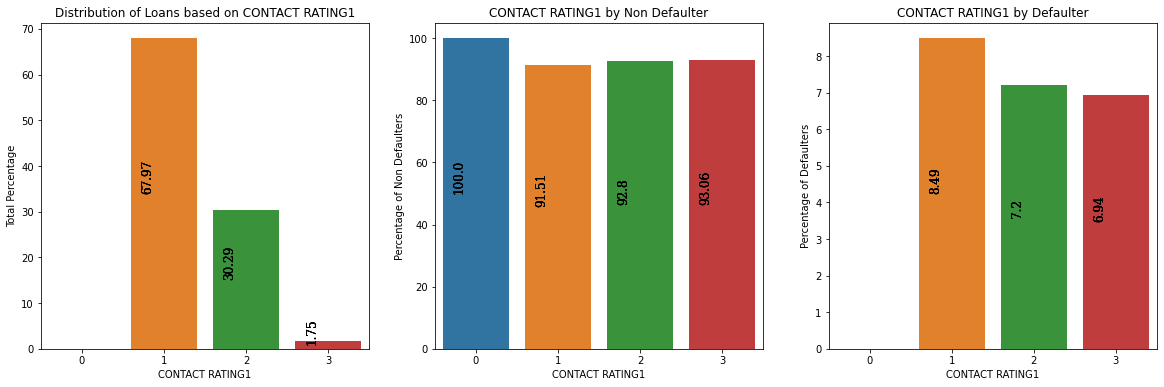

In [347]:

df_app_data['CONTACT RATING1']= df_app_data['FLAG_MOBIL'] + df_app_data['FLAG_PHONE']+ df_app_data['FLAG_EMAIL']
categorical_plot(df_app_data,'CONTACT RATING1')


  **7. Housing Ratings**

  **Analyzing REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region)**

In [349]:
df_app_data['REGION_POPULATION_RELATIVE'].isnull().sum()

0

 There are no null Values

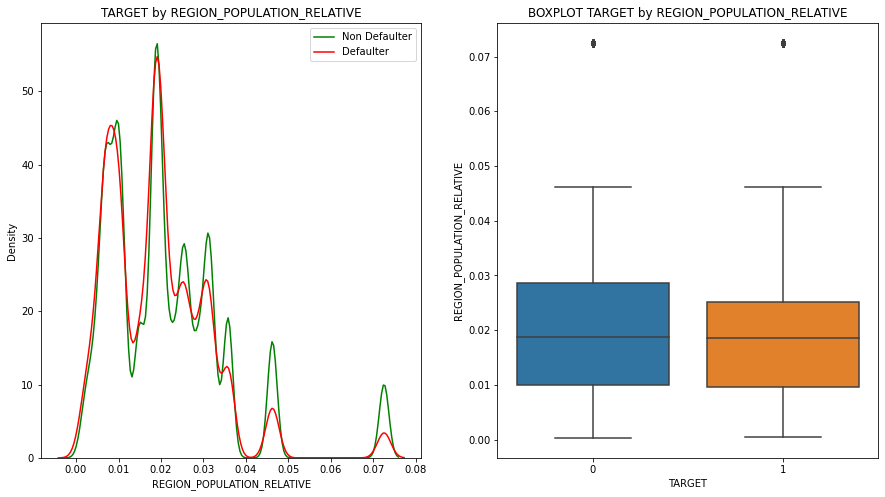

In [351]:
numerical_plot(df_app_data,'REGION_POPULATION_RELATIVE')

In [353]:
df_app_data['REGION_POPULATION_RELATIVE_BIN'] = pd.cut(df_app_data['REGION_POPULATION_RELATIVE'], [0, 0.03, 0.05, 1], labels=['Low', 'Medium','High'])

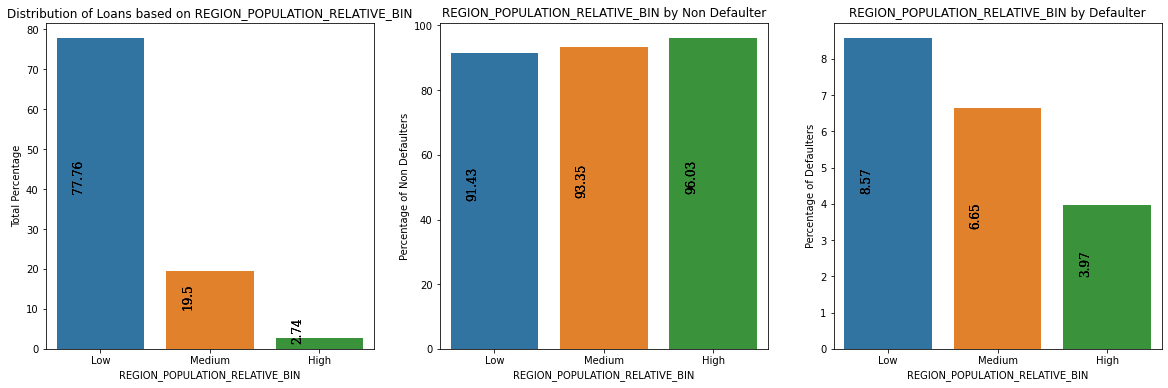

In [355]:
categorical_plot(df_app_data,'REGION_POPULATION_RELATIVE_BIN')

 **Clients from less populated regions are more liekly to default**

  **Analyzing REGION_RATING_CLIENT - Rating of the region where client lives (1,2,3)**

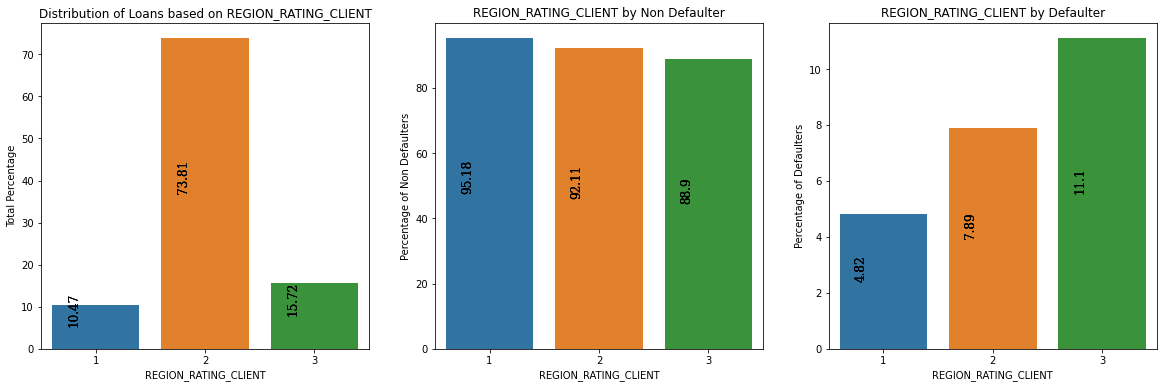

In [357]:
categorical_plot(df_app_data,'REGION_RATING_CLIENT')

**Clients from Region Rating 3 are more likely to default**

  Analyzing REGION_RATING_CLIENT_W_CITY -R ating of the region where client lives with taking city into account (1,2,3)

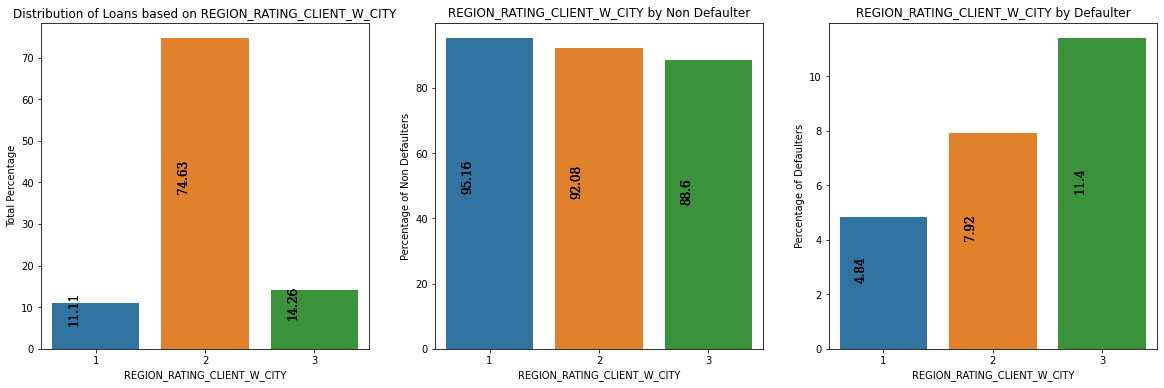

In [359]:
categorical_plot(df_app_data,'REGION_RATING_CLIENT_W_CITY')

 **Clients from Region Rating 3 are more likely to default loans**


  **Analyzing REG_REGION_NOT_LIVE_REGION - Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)**

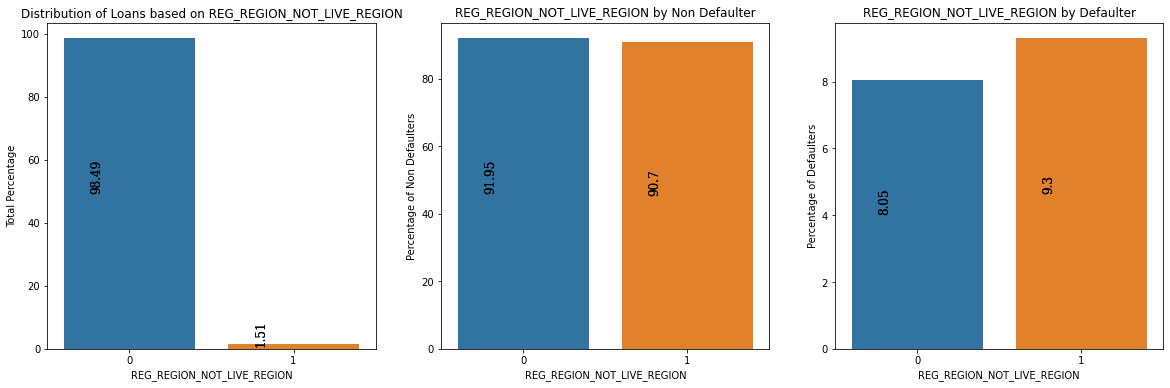

In [361]:
categorical_plot(df_app_data,'REG_REGION_NOT_LIVE_REGION')

 **Client is more likely to default loan if permanent address is not same as contact address at region level**

  **Analyzing REG_REGION_NOT_WORK_REGION - Flag if client's permanent address does not match work address (1=different, 0=same, at region level)**

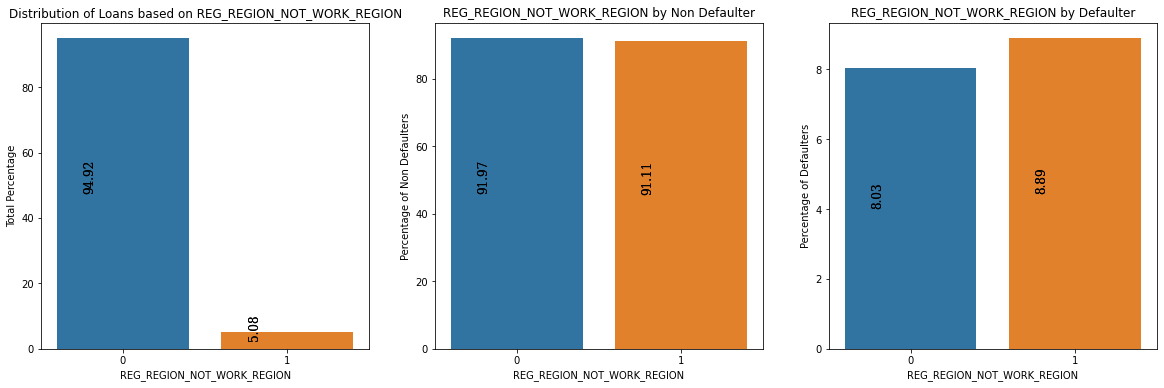

In [363]:
categorical_plot(df_app_data,'REG_REGION_NOT_WORK_REGION')

  **Clients whose Permanent address matches Work address pay off loans better**

  **Analyzing LIVE_REGION_NOT_WORK_REGION - Flag if client's contact address does not match work address (1=different, 0=same, at region level)**

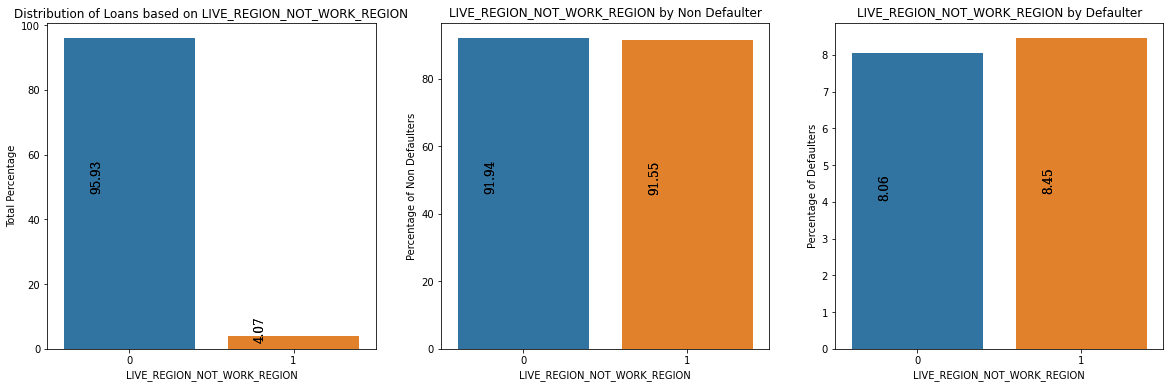

In [365]:
categorical_plot(df_app_data,'LIVE_REGION_NOT_WORK_REGION')

 **Clients whose contact address does not match work address are more likely to default loans**

  **Analyzing REG_CITY_NOT_LIVE_CITY - Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)**

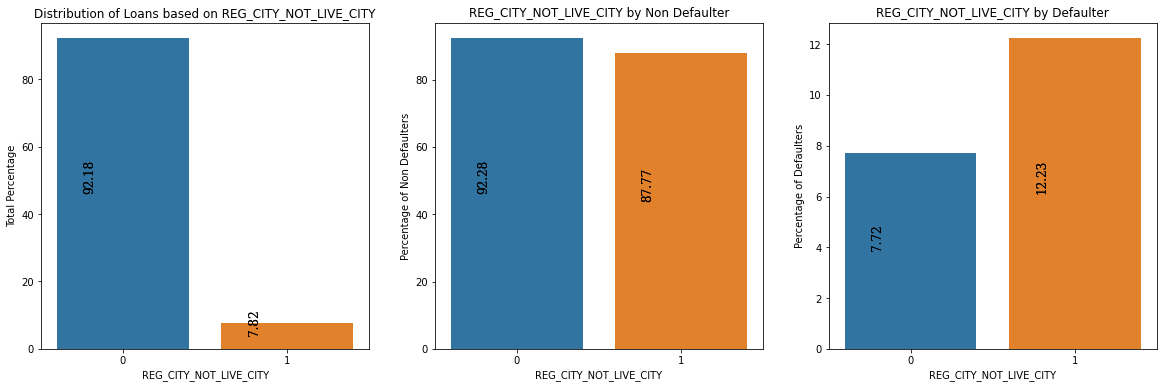

In [367]:
categorical_plot(df_app_data,'REG_CITY_NOT_LIVE_CITY')

 **Client are more likely to default loans if  permanent address does not match contact address**

  **Analyzing REG_CITY_NOT_WORK_CITY - Flag if client's permanent address does not match work address (1=different, 0=same, at city level)**

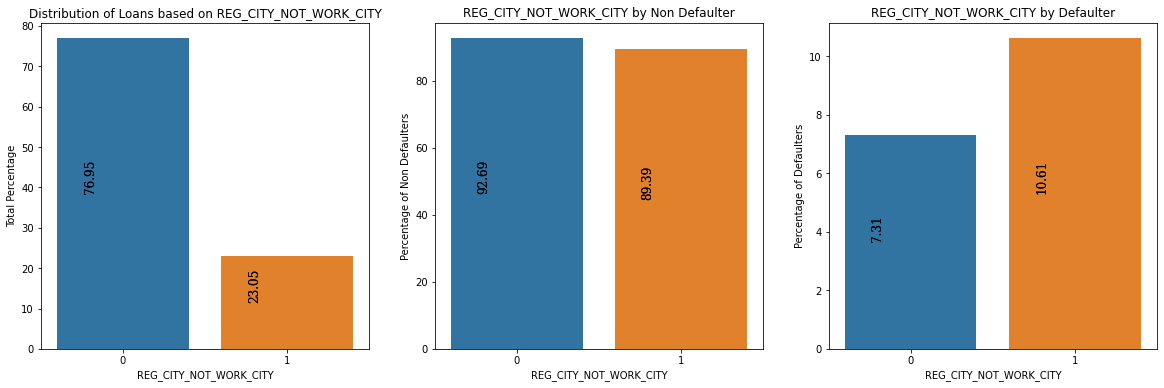

In [369]:
categorical_plot(df_app_data,'REG_CITY_NOT_WORK_CITY')

  **Clients are more likely to default loans id permanent address does not match work address**

 **Analyzing LIVE_CITY_NOT_WORK_CITY -Flag if client's contact address does not match work address (1=different, 0=same, at city level)**

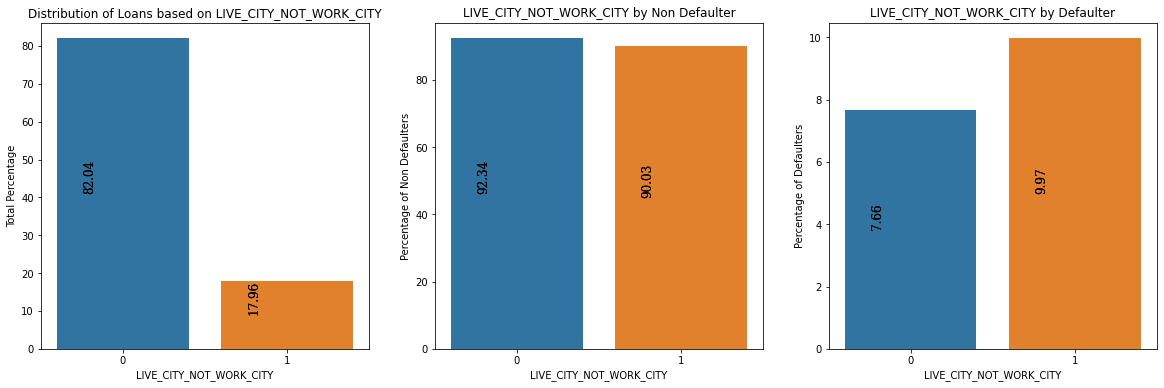

In [371]:
categorical_plot(df_app_data,'LIVE_CITY_NOT_WORK_CITY')

 **Clients are more likely to default loans contact address does not match work address**

**8. MARITAL STATUS**

In [373]:
df_app_data['NAME_FAMILY_STATUS'].isnull().sum()

0

There are no null values

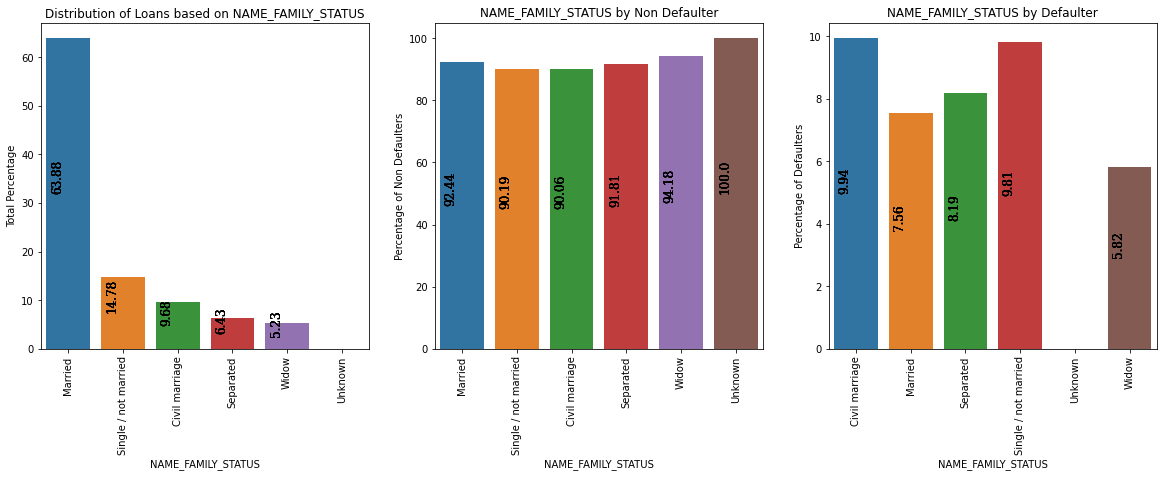

In [375]:
categorical_plot(df_app_data,'NAME_FAMILY_STATUS',xticks=90)


 **Single/not married and Civil marriage are likely to default loans**

  **9.FAMILY**

  **Analyzing CNT_CHILDREN - Number of children the client has**

In [377]:
df_app_data['CNT_CHILDREN'].isnull().sum()

0

 There are no null values

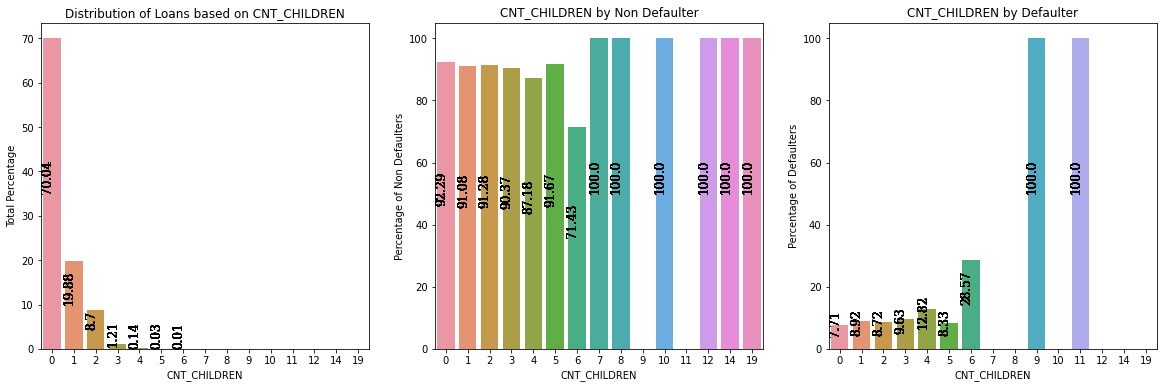

In [379]:
categorical_plot(df_app_data,'CNT_CHILDREN')

**People with no children are less likely to default<br>But we cannot infer that people with more than one child will default as the percentages between the groups are almost same**

  **Analyzing CNT_FAM_MEMBERS - How many family members does client have**

In [381]:
df_app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

There are only 2 null values. Null Values can be replaced with Mode - 2

In [383]:
df_app_data['CNT_FAM_MEMBERS'].fillna(2, inplace=True)

In [385]:
df_app_data['CNT_FAM_MEMBERS'].fillna(df_app_data['CNT_FAM_MEMBERS'].mode(), inplace=True)

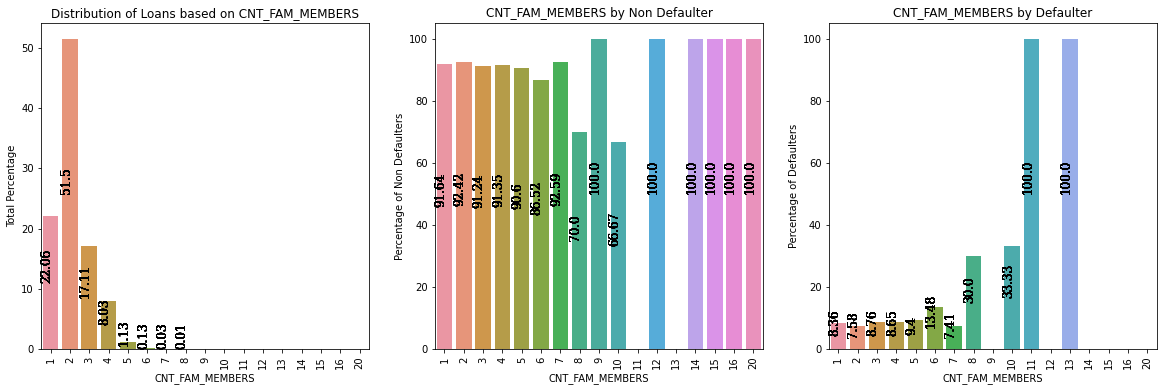

In [387]:

categorical_plot(df_app_data,'CNT_FAM_MEMBERS', xticks=90)


 **Percentages are almost similar till 5 familar members. There is a spike for 6 and 8. But no of families with those numbers are really less**
 



 **10.Income**

  **Analyzing AMT_INCOME_TOTAL - Income of the client**

In [389]:
df_app_data['AMT_INCOME_TOTAL'].isnull().sum()

0

There are no null values

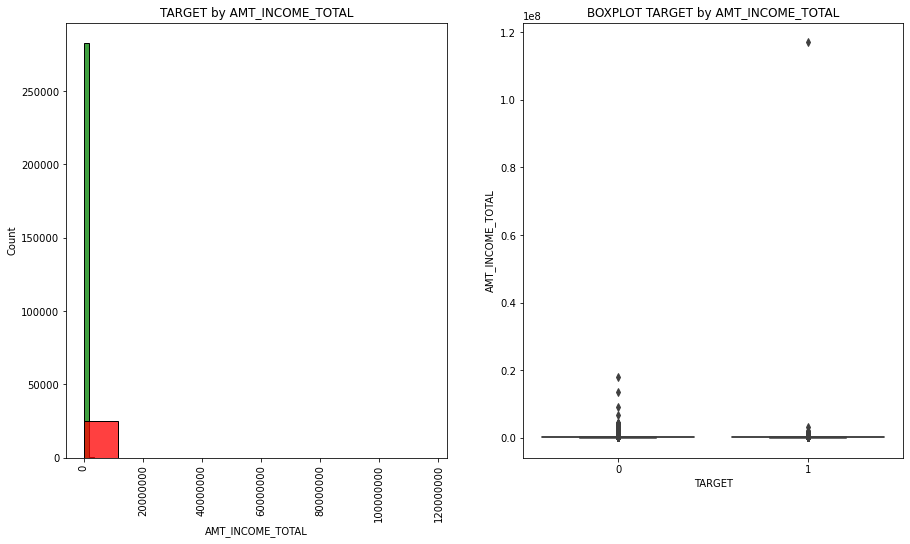

In [391]:
numerical_histplot(df_app_data,'AMT_INCOME_TOTAL')

In [393]:
df_app_data['AMT_INCOME_TOTAL'].sort_values(ascending=False).head(3)

12840     117000000.0
203693     18000090.0
246858     13500000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [395]:
df_app_data['AMT_INCOME_TOTAL'].describe(percentiles=(0.25,0.5,0.75,0.99))

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

From the above plot we can see that there are outliers for Amout income total with an income total of 117000000.00.<br>
Analysing the income total with income less than 300000




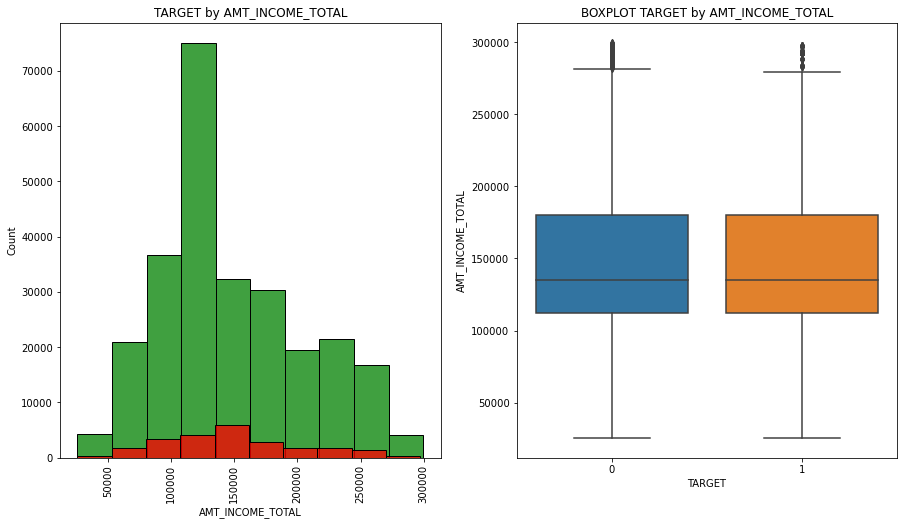

In [397]:
numerical_histplot(df_app_data[df_app_data['AMT_INCOME_TOTAL']<300000 ],'AMT_INCOME_TOTAL')

 **Binning Income Total**

In [399]:
df_app_data['AMT_INCOME_TOTAL_BIN'] = pd.cut(df_app_data['AMT_INCOME_TOTAL'], [10000, 50000, 100000, 150000, 200000, 300000, 400000,500000,10000000], labels=['10K-50K', '50K-100K','100K-150K','150K-200K','200K-300K','300K-400K','400K-500K','500K+'])

In [401]:
income_df = pd.DataFrame()
income_df['DEFAULT'] = df_app_data[df_app_data['TARGET']==1].groupby('AMT_INCOME_TOTAL_BIN')['AMT_INCOME_TOTAL'].count()
income_df['NON DEFAULT'] = df_app_data[df_app_data['TARGET']==0].groupby('AMT_INCOME_TOTAL_BIN')['AMT_INCOME_TOTAL'].count()
income_df['TOTAL'] = income_df['DEFAULT'] + income_df['NON DEFAULT'] 
income_df['% defaulters'] = ((income_df['DEFAULT'] / income_df['TOTAL'])*100).round()
income_df['% non defaulters'] = ((income_df['NON DEFAULT'] / income_df['TOTAL'])*100).round()
income_df

DEFAULT  NON DEFAULT  TOTAL  % defaulters  \
AMT_INCOME_TOTAL_BIN                                              
10K-50K                   343         4174   4517           8.0   
50K-100K                 4882        54299  59181           8.0   
100K-150K                7894        83697  91591           9.0   
150K-200K                5432        58875  64307           8.0   
200K-300K                4921        60255  65176           8.0   
300K-400K                 885        13791  14676           6.0   
400K-500K                 322         5039   5361           6.0   
500K+                     145         2554   2699           5.0   

                      % non defaulters  
AMT_INCOME_TOTAL_BIN                    
10K-50K                           92.0  
50K-100K                          92.0  
100K-150K                         91.0  
150K-200K                         92.0  
200K-300K                         92.0  
300K-400K                         94.0  
400K-500K                         94.0  
500K+                             95.0

**As the income increases, they are more likely to pay loans**

 **11. Housing**

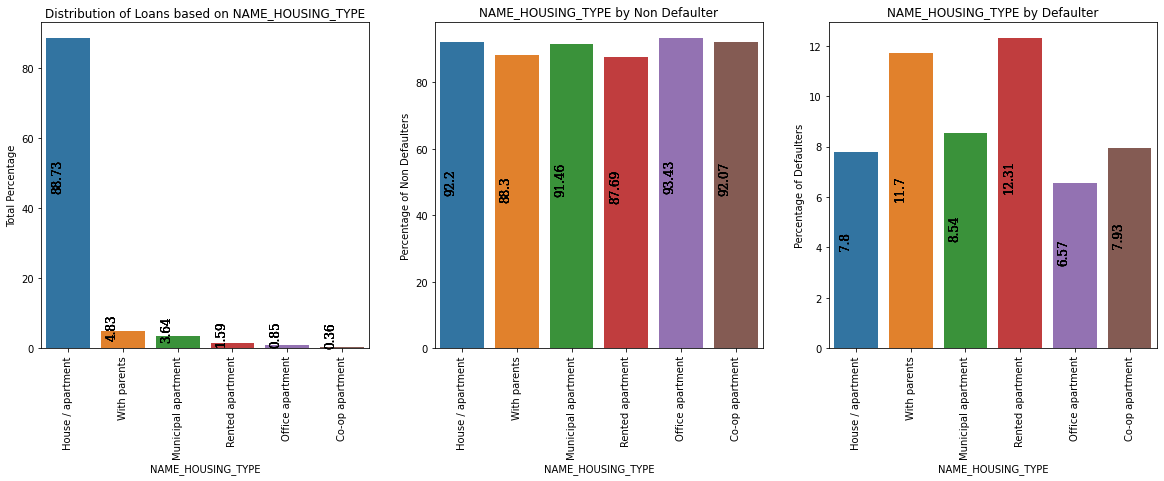

In [403]:
categorical_plot(df_app_data,'NAME_HOUSING_TYPE',xticks =90)

**People living in House/Apartment and Office apartments are less likely to default**

  **USER RATINGS**

  **Analyzing EXT_SOURCE_2 - Normalized score from external data source**

In [405]:
df_app_data['EXT_SOURCE_2'].isnull().sum()

0

 EXT_SOURCE_2 has around 660 null values. Imputing it with median values as there are few outliers

In [407]:
df_app_data['EXT_SOURCE_2'].fillna(df_app_data['EXT_SOURCE_2'].median(), inplace=True)

In [409]:
df_app_data['EXT_SOURCE_2'].isnull().sum()

0

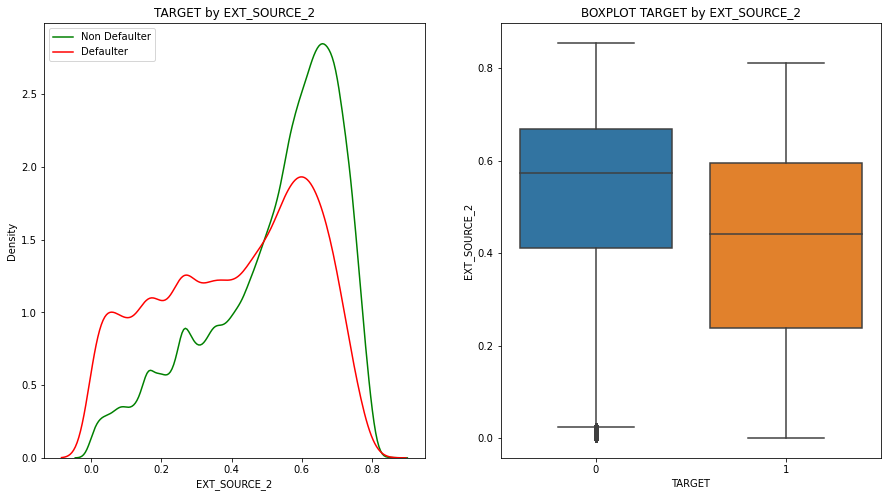

In [411]:
numerical_plot(df_app_data,'EXT_SOURCE_2')

**For EXT_SOURCE_2 rating as well we observe that clients with lower ratings are more likely to default**

 **Analyzing EXT_SOURCE_3 - Normalized score from external data source**

In [413]:
df_app_data['EXT_SOURCE_3'].isnull().sum()/df_app_data.shape[0]

0.19825307062186392

EXT_SOURCE_3 has 19% NULL Values.


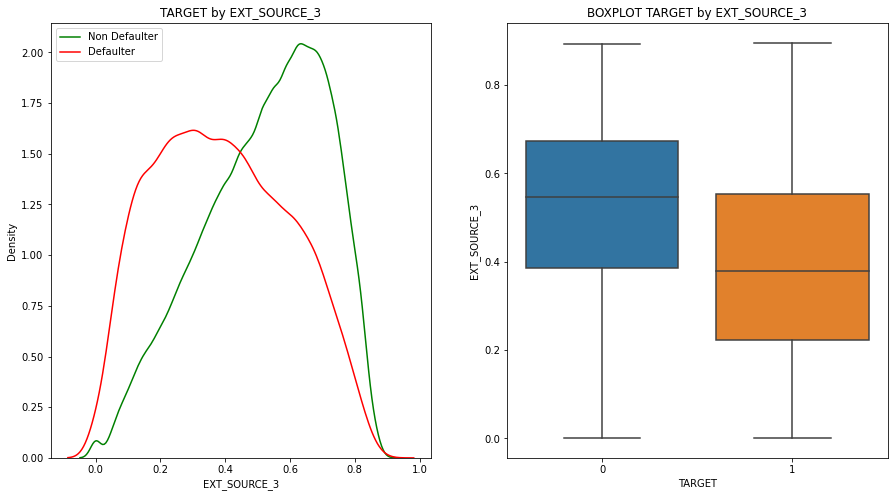

In [415]:
numerical_plot(df_app_data,'EXT_SOURCE_3')

**For EXT_SOURCE_3 as well, clients with lower score are more likely to default**

  **USER ACTIONS**

  **Analyzing DAYS_REGISTRATION - How many days before the application did client change his registration**

In [417]:
df_app_data['DAYS_REGISTRATION'].isnull().sum()

0

DAYS_REGISTRATION has no null values

Converting it to Years

In [419]:
df_app_data['YEAR_REGISTRATION']= abs(df_app_data['DAYS_REGISTRATION']/365)

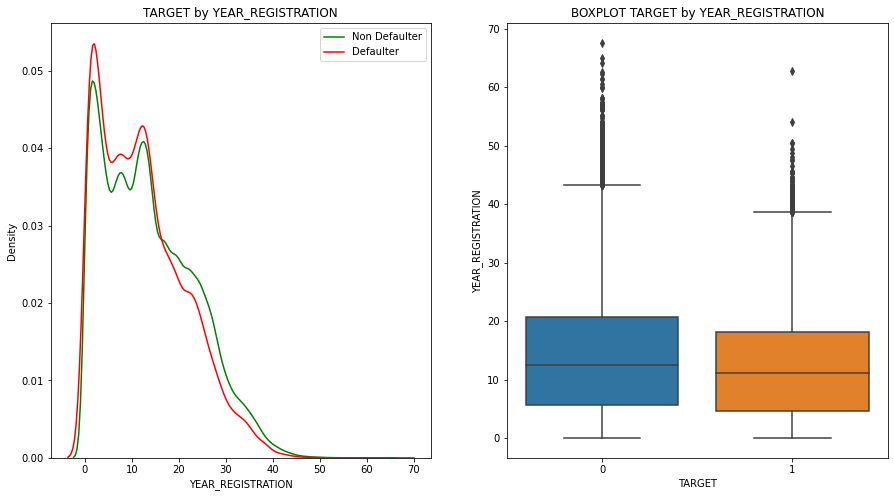

In [421]:
numerical_plot(df_app_data,'YEAR_REGISTRATION')

 **People who have changed registration closer to the application are more likely to default<br>**

  **Analyzing DAYS_ID_PUBLISH -How many days before the application did client change the identity document with which he applied for the loan**

In [423]:
df_app_data['DAYS_ID_PUBLISH'].isnull().sum()

0

DAYS_ID_PUBLISH has no null values

Converting it to Years

In [425]:
df_app_data['YEARS_ID_PUBLISH']= abs(df_app_data['DAYS_ID_PUBLISH']/365)

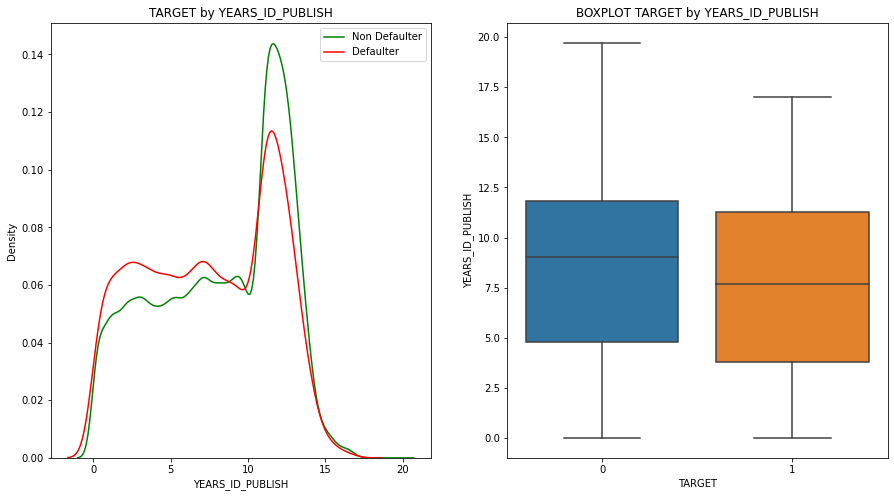

In [427]:
numerical_plot(df_app_data,'YEARS_ID_PUBLISH')

**We have more defaulters between 0-8 years approximately**

  **Analyzing DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone**
  

In [429]:
df_app_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [431]:
int(df_app_data['DAYS_LAST_PHONE_CHANGE'].mean())

-962

In [433]:
df_app_data['DAYS_LAST_PHONE_CHANGE'].fillna(int(df_app_data['DAYS_LAST_PHONE_CHANGE'].mean()), inplace=True)

In [435]:
df_app_data['YEAR_LAST_PHONE_CHANGE']= abs(df_app_data['DAYS_LAST_PHONE_CHANGE']/365)

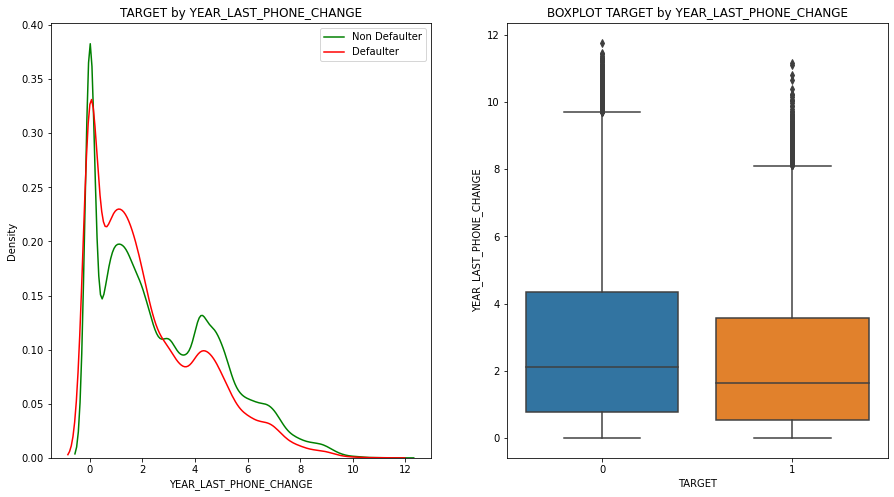

In [437]:
numerical_plot(df_app_data,'YEAR_LAST_PHONE_CHANGE')

**Distribution is left Skewed, people who have changes phone number closer to application date 1-3 years are more likely to defau;t**


  **Analyzing Number of enquiries to Credit Bureau about the client in an hour, day,month,week,quarter,year**


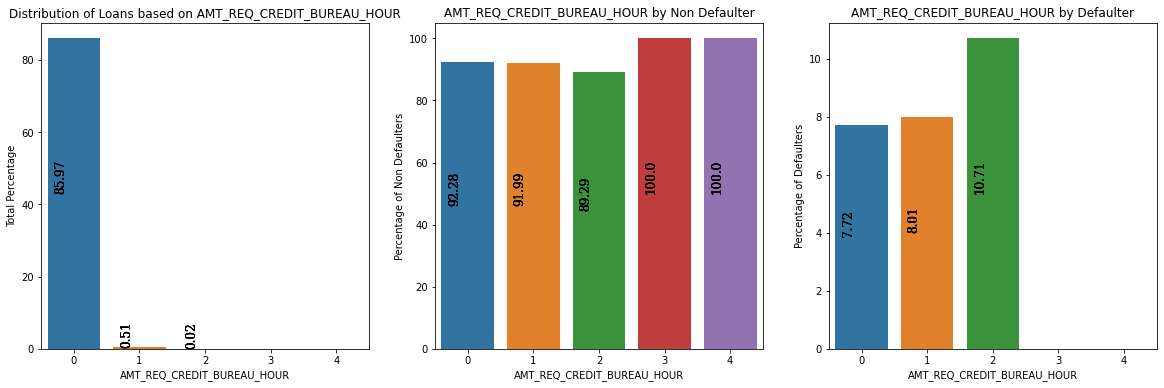

In [439]:
categorical_plot(df_app_data,'AMT_REQ_CREDIT_BUREAU_HOUR')

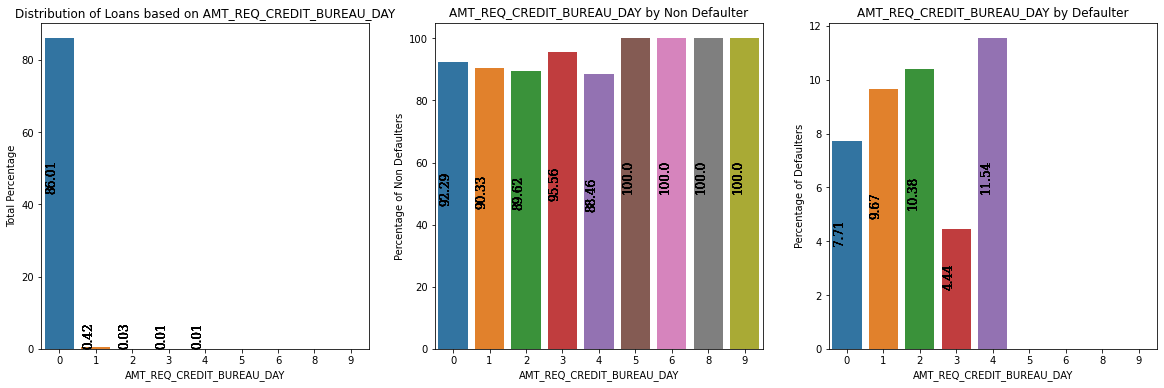

In [441]:
categorical_plot(df_app_data,'AMT_REQ_CREDIT_BUREAU_DAY')

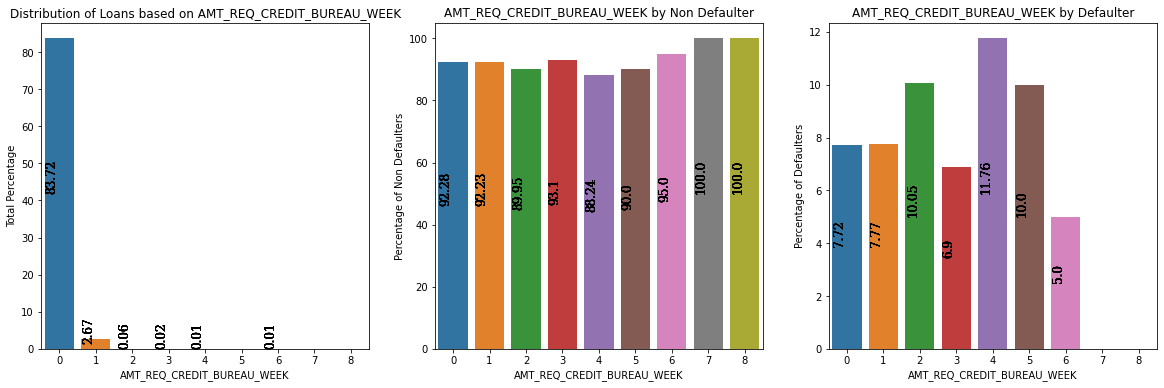

In [443]:
categorical_plot(df_app_data,'AMT_REQ_CREDIT_BUREAU_WEEK')

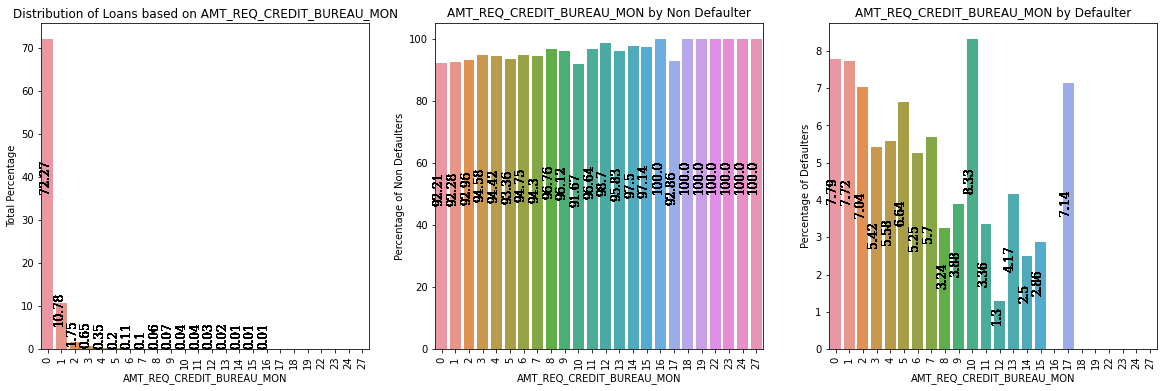

In [445]:
categorical_plot(df_app_data,'AMT_REQ_CREDIT_BUREAU_MON',xticks=90)

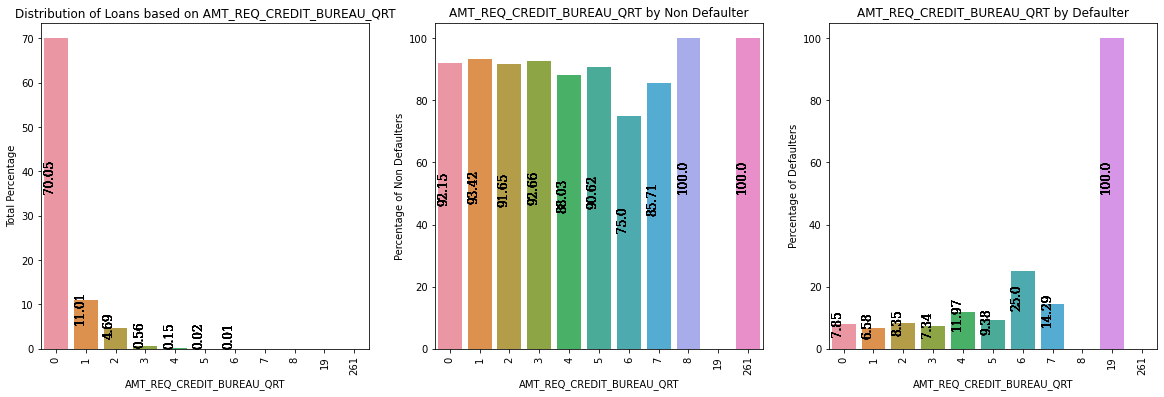

In [447]:
categorical_plot(df_app_data,'AMT_REQ_CREDIT_BUREAU_QRT',xticks=90)

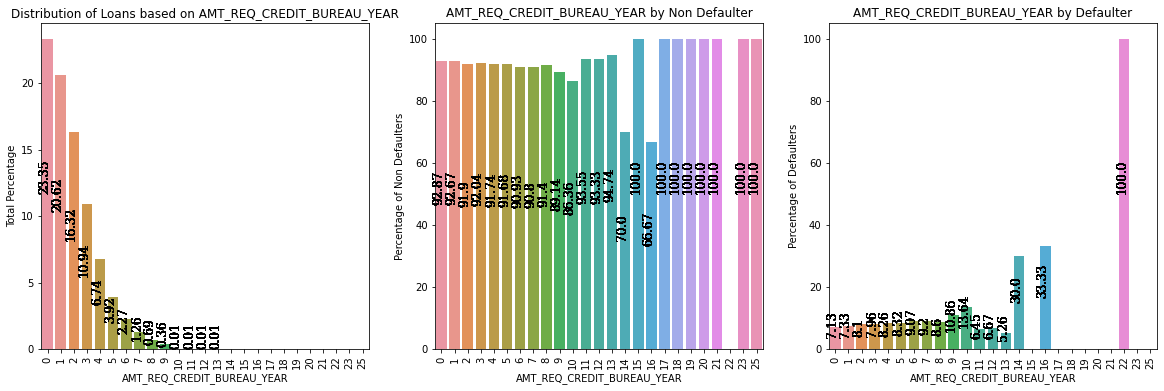

In [449]:
categorical_plot(df_app_data,'AMT_REQ_CREDIT_BUREAU_YEAR', xticks=90)

  **LOAN SUMMARY**

  **Analyzing NAME_CONTRACT_TYPE - Identification if loan is cash or revolving**

In [451]:
df_app_data['NAME_CONTRACT_TYPE'].isnull().sum()

0

It has no null values

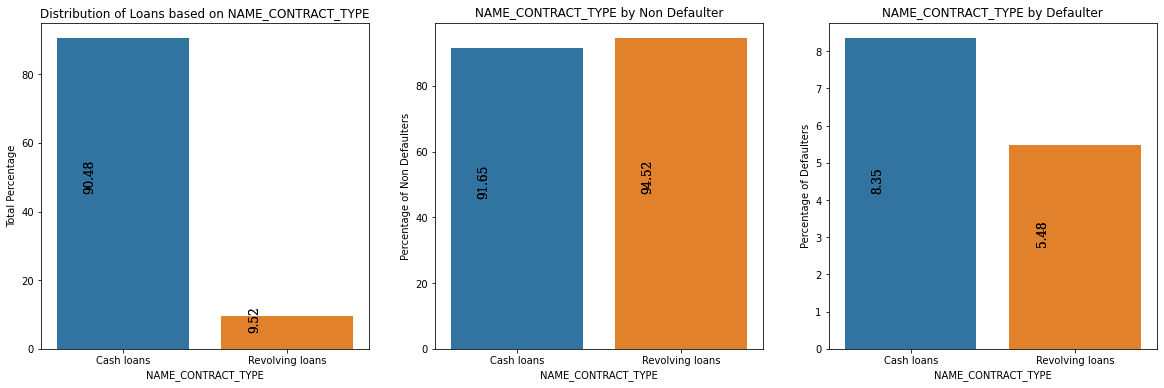

In [453]:
categorical_plot(df_app_data,'NAME_CONTRACT_TYPE')

**Around 93.5% of total loan applications are for cash loans and 6.5% are for revolving loans<br>
Around 93% of the loans whicg are likely to default are cash loans, 7% are revolving loans**

  **Analyzing AMT_CREDIT - Credit amount of the loan**

In [455]:
df_app_data['AMT_CREDIT'].isnull().sum()

0

It has no null values

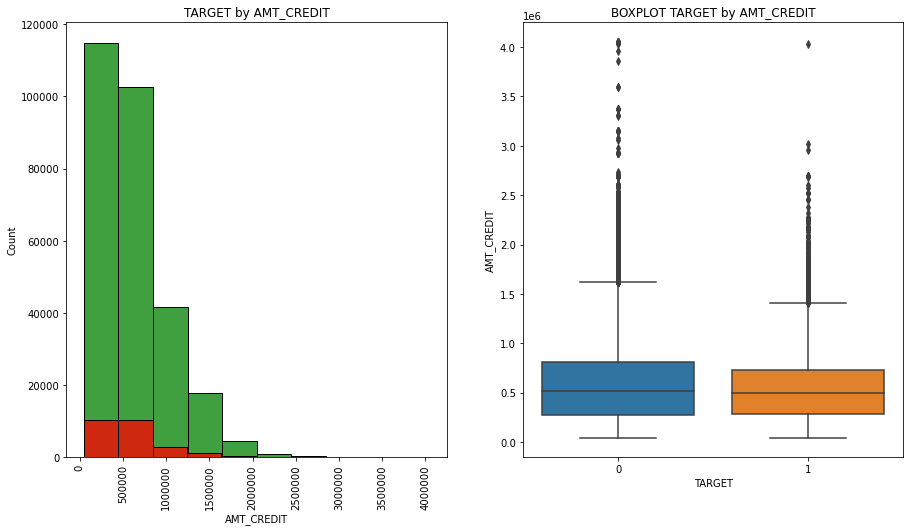

In [457]:
numerical_histplot(df_app_data,'AMT_CREDIT')

Distribution is right Skewed

In [459]:
df_app_data['AMT_CREDIT_BIN'] = pd.cut(df_app_data['AMT_CREDIT'], [10000, 50000, 100000, 150000, 200000, 300000, 400000,500000,600000,700000,800000,900000,1000000,10000000], labels=[ '10K-50K', '50K-100K','100K-150K','150K-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K','800K-900K','900K-1M','1M+'])
credit_df = pd.DataFrame()
credit_df ['DEFAULT'] = df_app_data[df_app_data['TARGET']==1].groupby('AMT_CREDIT_BIN')['AMT_CREDIT'].count()
credit_df ['NON DEFAULT'] = df_app_data[df_app_data['TARGET']==0].groupby('AMT_CREDIT_BIN')['AMT_CREDIT'].count()
credit_df ['TOTAL'] = credit_df ['DEFAULT'] + credit_df ['NON DEFAULT'] 
credit_df ['% defaulters'] = ((credit_df ['DEFAULT'] / credit_df ['TOTAL'])*100).round()
credit_df ['% non defaulters'] = ((credit_df ['NON DEFAULT'] / credit_df ['TOTAL'])*100).round()
credit_df 


DEFAULT  NON DEFAULT  TOTAL  % defaulters  % non defaulters
AMT_CREDIT_BIN                                                             
10K-50K              23          538    561           4.0              96.0
50K-100K            308         5135   5443           6.0              94.0
100K-150K           762        11393  12155           6.0              94.0
150K-200K          1397        16588  17985           8.0              92.0
200K-300K          4321        50492  54813           8.0              92.0
300K-400K          2623        23715  26338          10.0              90.0
400K-500K          3171        28867  32038          10.0              90.0
500K-600K          3523        30709  34232          10.0              90.0
600K-700K          2097        21952  24049           9.0              91.0
700K-800K          1466        17727  19193           8.0              92.0
800K-900K          1555        20237  21792           7.0              93.0
900K-1M             647         8280   8927           7.0              93.0
1M+                2932        47053  49985           6.0              94.0

  **Analyzing AMT_ANNUITY - Loan annuity**

In [461]:
df_app_data['AMT_ANNUITY'].isnull().sum()

0

In [463]:
df_app_data['AMT_ANNUITY'].median()

24903.0

In [465]:
df_app_data['AMT_ANNUITY'].fillna(df_app_data['AMT_ANNUITY'].median(), inplace=True)

It has only 12 null values. Since there are outliers we can impute it with Median value of the column - 24903.0 <br>

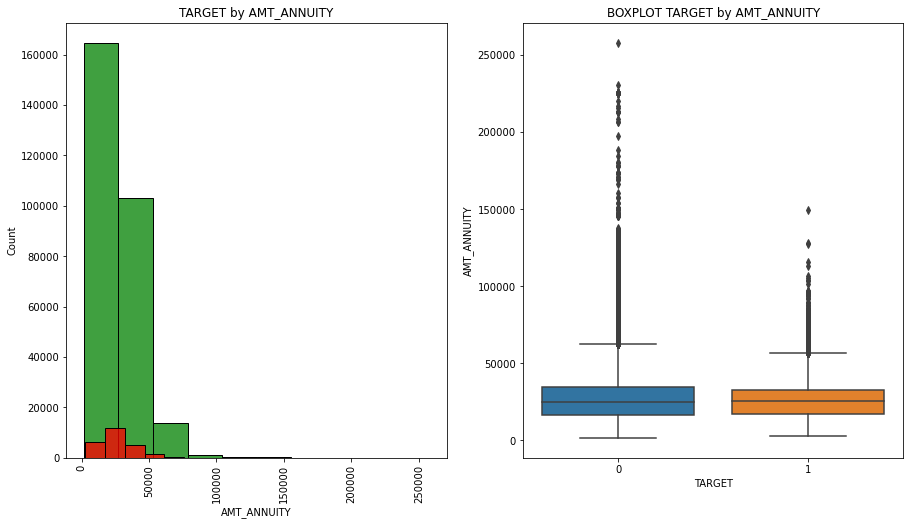

In [467]:
numerical_histplot(df_app_data,'AMT_ANNUITY')

In [469]:
df_app_data['AMT_ANNUITY'].sort_values(ascending = False).head(3)

17948     258025.5
101508    230161.5
12108     225000.0
Name: AMT_ANNUITY, dtype: float64

 From the plot above we can see that there are outliers for Annuity column. There are values more than 200000 which indicates the same

In [471]:
df_app_data['AMT_ANNUITY_BIN'] = pd.cut(df_app_data['AMT_ANNUITY'], [10000, 20000,30000,40000,50000,80000,100000,200000], labels=[ '10K-20K', '20K-30K','30K-40K','40K-50K','50K-80K','380K-100K','100K+'])
annuity_df = pd.DataFrame()
annuity_df ['DEFAULT'] = df_app_data[df_app_data['TARGET']==1].groupby('AMT_ANNUITY_BIN')['AMT_ANNUITY'].count()
annuity_df ['NON DEFAULT'] = df_app_data[df_app_data['TARGET']==0].groupby('AMT_ANNUITY_BIN')['AMT_ANNUITY'].count()
annuity_df ['TOTAL'] = annuity_df ['DEFAULT'] + annuity_df ['NON DEFAULT'] 
annuity_df ['% defaulters'] = ((annuity_df ['DEFAULT'] / annuity_df ['TOTAL'])*100).round()
annuity_df ['% non defaulters'] = ((annuity_df ['NON DEFAULT'] / annuity_df ['TOTAL'])*100).round()
annuity_df 

DEFAULT  NON DEFAULT  TOTAL  % defaulters  % non defaulters
AMT_ANNUITY_BIN                                                             
10K-20K             6434        76788  83222           8.0              92.0
20K-30K             8258        84220  92478           9.0              91.0
30K-40K             5251        53311  58562           9.0              91.0
40K-50K             2009        26660  28669           7.0              93.0
50K-80K             1178        18596  19774           6.0              94.0
380K-100K             35          983   1018           3.0              97.0
100K+                 10          459    469           2.0              98.0

  **Analyzing AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given**

In [473]:
df_app_data['AMT_GOODS_PRICE'].isnull().sum()


278

In [475]:
df_app_data['AMT_GOODS_PRICE'].median()

450000.0

In [477]:
df_app_data[df_app_data['NAME_CONTRACT_TYPE']=="Revolving loans"][['AMT_GOODS_PRICE','AMT_CREDIT']].tail(10)

AMT_GOODS_PRICE  AMT_CREDIT
307384         270000.0    270000.0
307385         180000.0    180000.0
307402         382500.0    382500.0
307419         450000.0    450000.0
307425         450000.0    450000.0
307444         270000.0    270000.0
307457         360000.0    360000.0
307467         675000.0    675000.0
307485         180000.0    180000.0
307496         337500.0    337500.0

In [479]:
df_app_data[df_app_data['AMT_GOODS_PRICE'].isnull()][['NAME_CONTRACT_TYPE','AMT_CREDIT']].head()

Empty DataFrame
Columns: [NAME_CONTRACT_TYPE, AMT_CREDIT]
Index: []

It has 278 null values. Null values are for Revovling Loans.
While analyzing data for revolving loans we see that goods price is same as amout credit. Hence imputing it with amount credit <br>


In [481]:
df_app_data['AMT_GOODS_PRICE'].fillna(df_app_data['AMT_CREDIT'], inplace=True)

In [483]:
df_app_data['AMT_GOODS_PRICE'].isnull().sum()

0

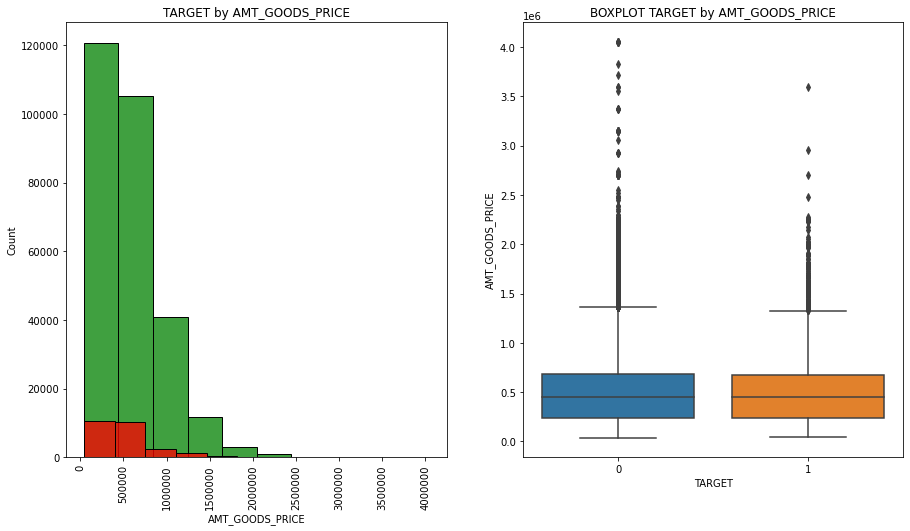

In [485]:
numerical_histplot(df_app_data,'AMT_GOODS_PRICE')

In [487]:
df_app_data['AMT_GOODS_PRICE_BIN'] = pd.cut(df_app_data['AMT_GOODS_PRICE'], [10000, 50000, 100000, 150000, 200000, 300000, 400000,500000,10000000], labels=['10K-50K', '50K-100K','100K-150K','150K-200K','200K-300K','300K-400K','400K-500K','500k+'])
goods_df = pd.DataFrame()
goods_df ['DEFAULT'] = df_app_data[df_app_data['TARGET']==1].groupby('AMT_GOODS_PRICE_BIN')['AMT_GOODS_PRICE'].count()
goods_df ['NON DEFAULT'] = df_app_data[df_app_data['TARGET']==0].groupby('AMT_GOODS_PRICE_BIN')['AMT_GOODS_PRICE'].count()
goods_df ['TOTAL'] = goods_df ['DEFAULT'] + goods_df ['NON DEFAULT'] 
goods_df ['% defaulters'] = ((goods_df ['DEFAULT'] / goods_df ['TOTAL'])*100).round()
goods_df ['% non defaulters'] = ((goods_df ['NON DEFAULT'] / goods_df ['TOTAL'])*100).round()
goods_df 

DEFAULT  NON DEFAULT   TOTAL  % defaulters  \
AMT_GOODS_PRICE_BIN                                               
10K-50K                   59         1268    1327           4.0   
50K-100K                 467         6915    7382           6.0   
100K-150K               1104        14875   15979           7.0   
150K-200K               1438        15641   17079           8.0   
200K-300K               5292        57579   62871           8.0   
300K-400K               2233        19011   21244          11.0   
400K-500K               5902        51090   56992          10.0   
500k+                   8330       116307  124637           7.0   

                     % non defaulters  
AMT_GOODS_PRICE_BIN                    
10K-50K                          96.0  
50K-100K                         94.0  
100K-150K                        93.0  
150K-200K                        92.0  
200K-300K                        92.0  
300K-400K                        89.0  
400K-500K                        90.0  
500k+                            93.0

  **Analyzing NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan**

In [489]:
df_app_data['NAME_TYPE_SUITE'].isnull().sum()

1292

 There are 1292 null Values.
Since it is a categorical variable we can impute it with mode of the column ie. Unaccompanied.<br>


In [491]:
df_app_data['NAME_TYPE_SUITE'].fillna(df_app_data['NAME_TYPE_SUITE'].mode(), inplace=True)

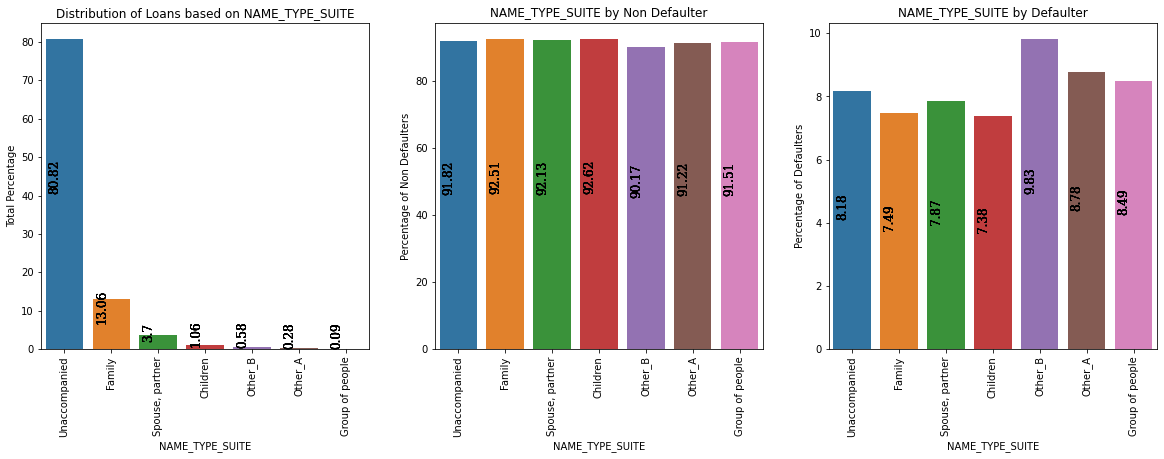

In [493]:
categorical_plot(df_app_data,'NAME_TYPE_SUITE',xticks=90)

 **Clients who were accompanied with Family and Children are less likely to default loans**

  **Analyzing WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for the loan**

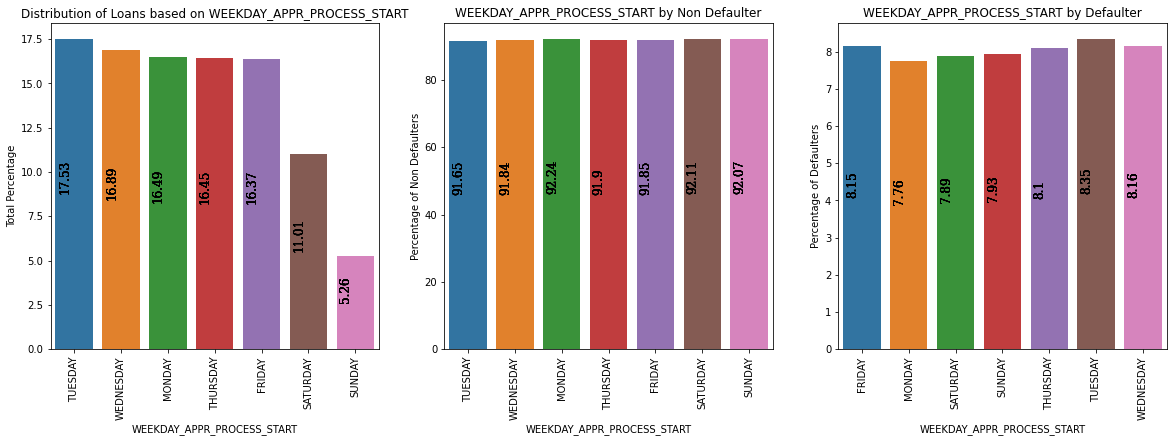

In [495]:
categorical_plot(df_app_data,'WEEKDAY_APPR_PROCESS_START', xticks=90)

 **Clients who applied for loans on any day of the week can default loans. There is not much we can infer**

  **Analyzing HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan**

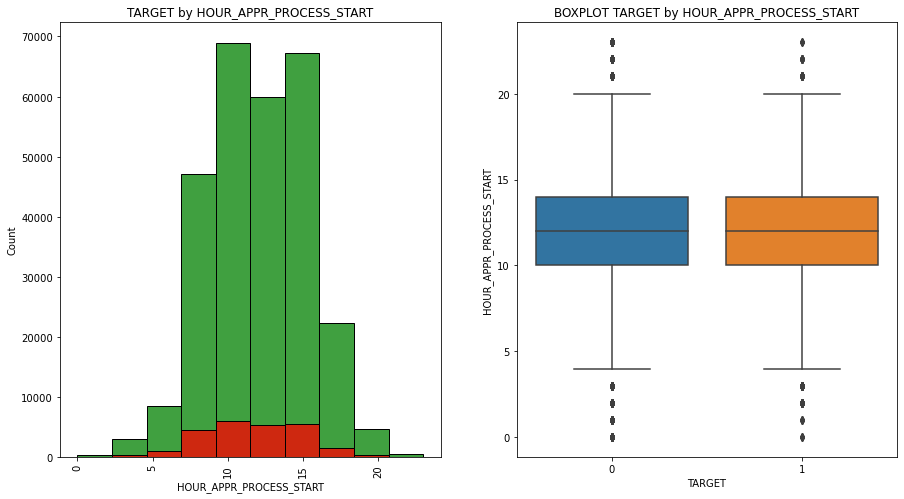

In [497]:
numerical_histplot(df_app_data,'HOUR_APPR_PROCESS_START')

**LOAN DOCUMENTS**


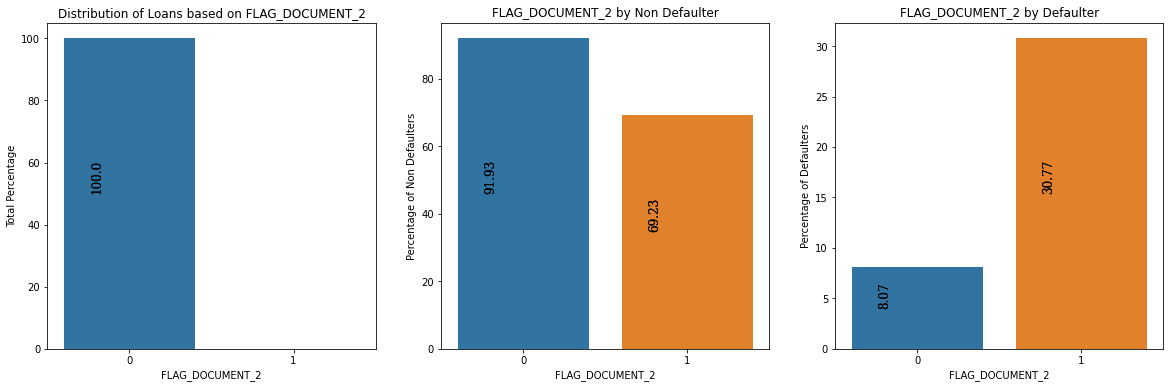

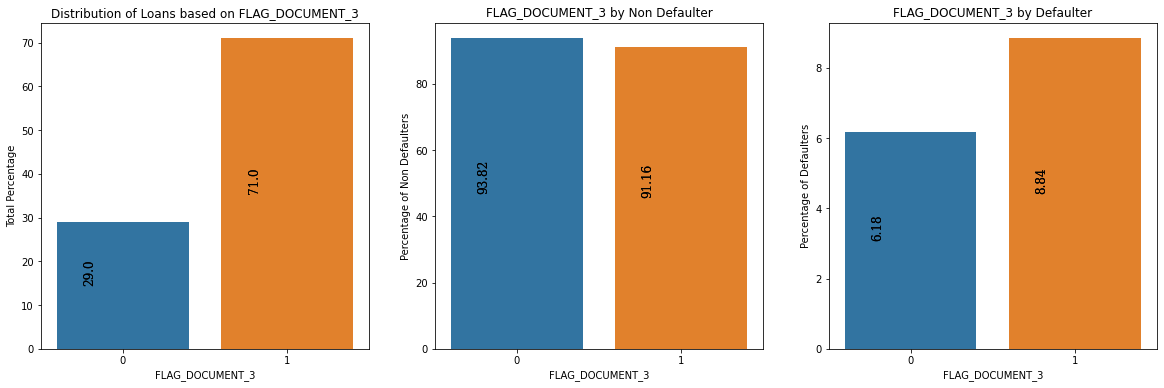

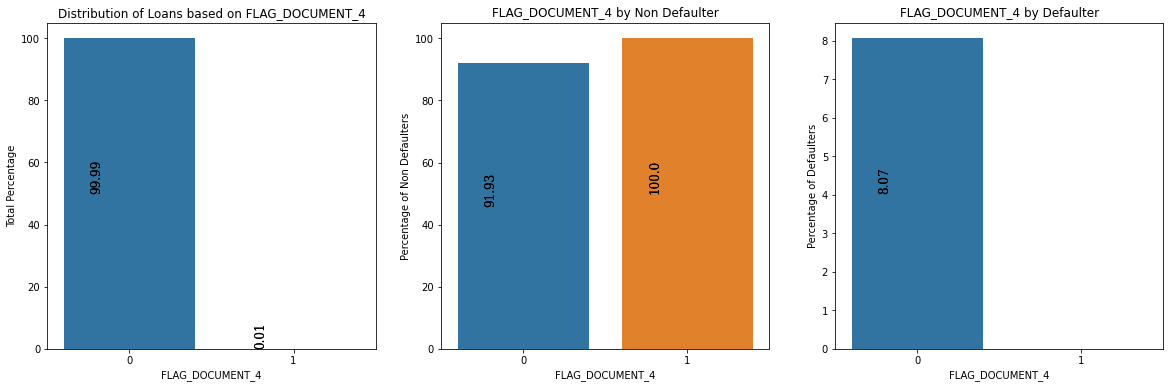

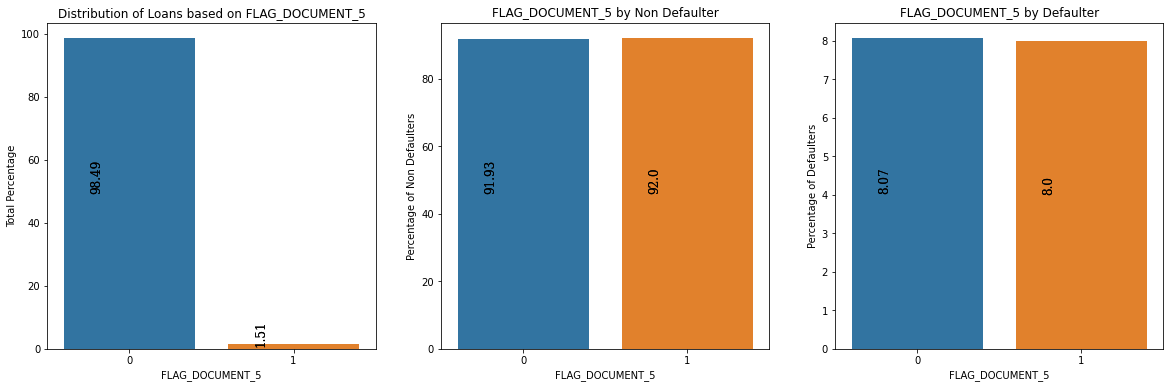

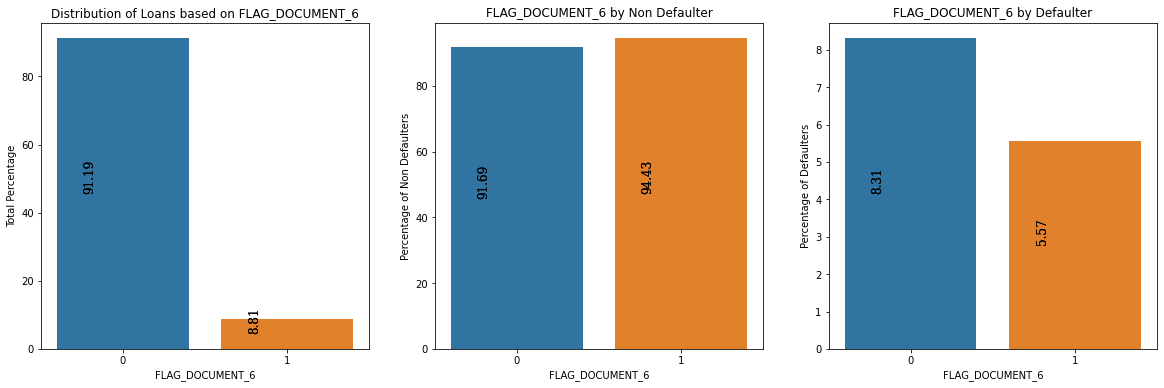

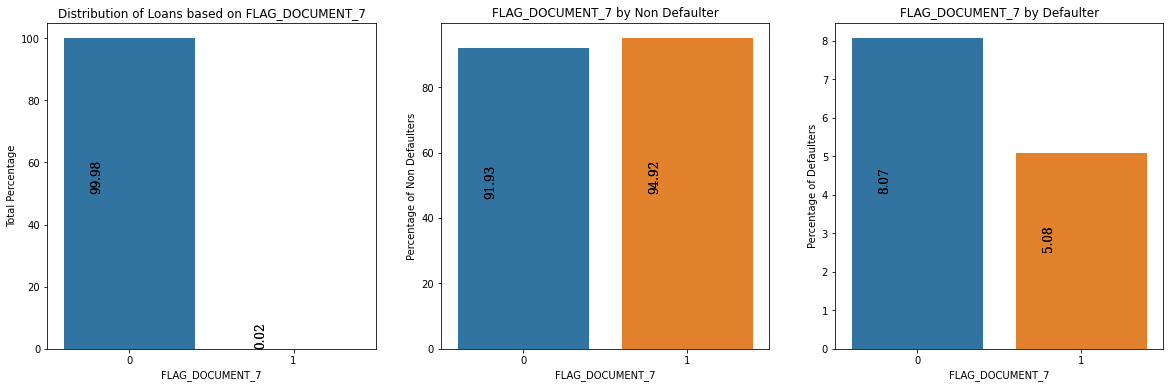

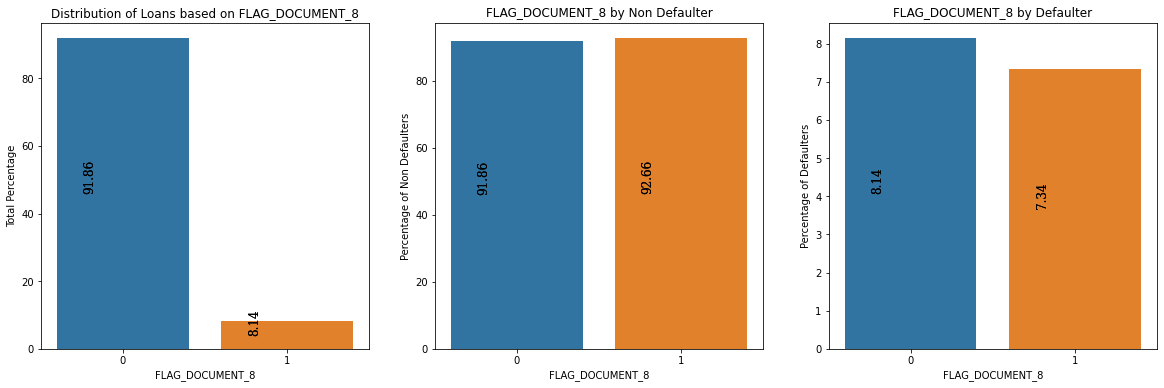

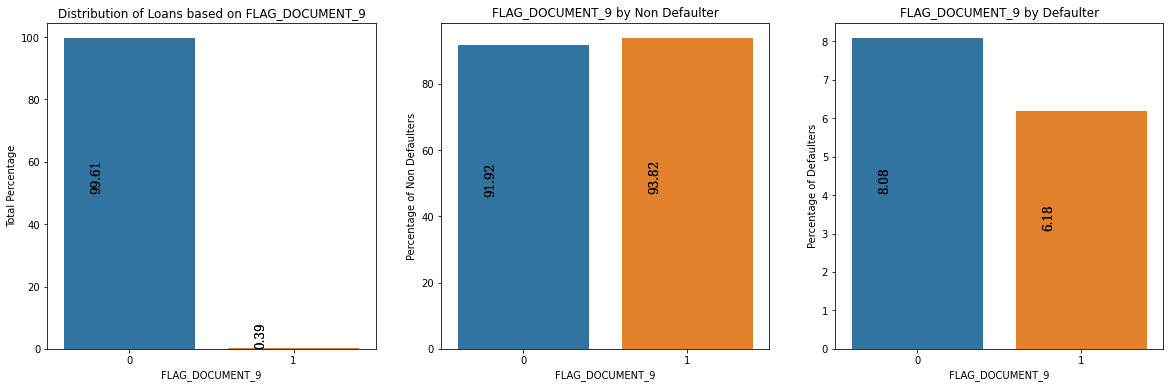

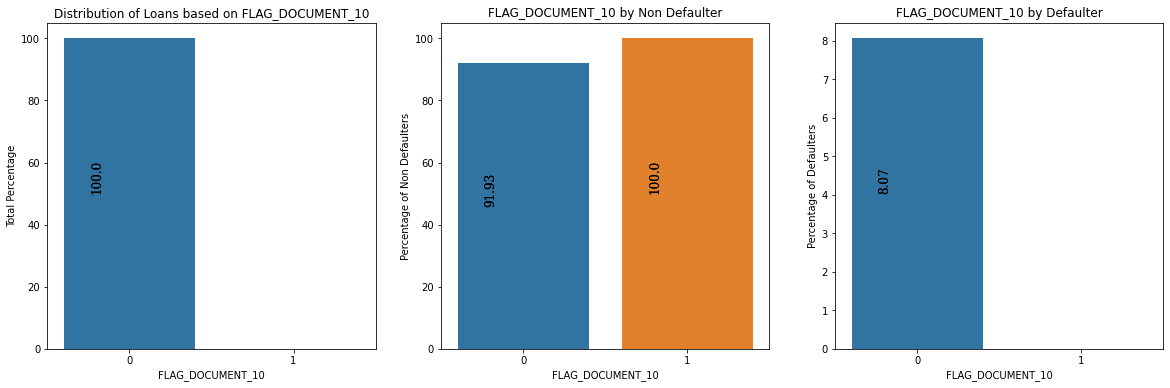

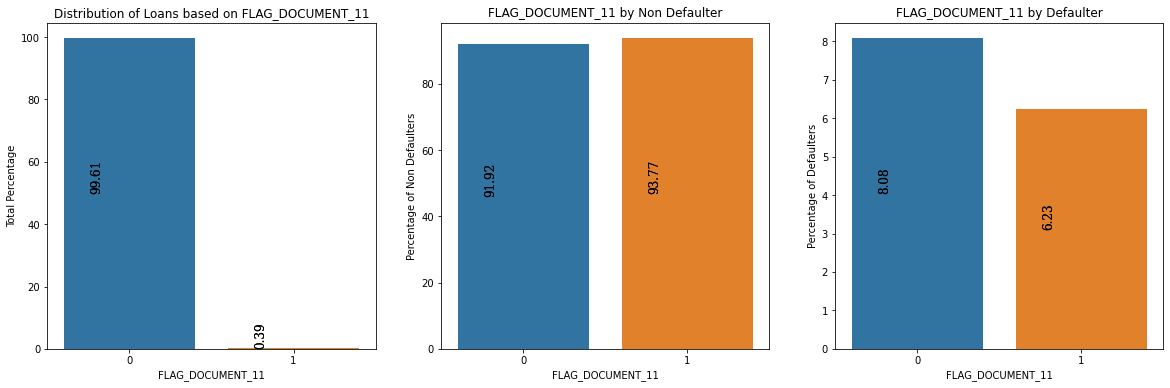

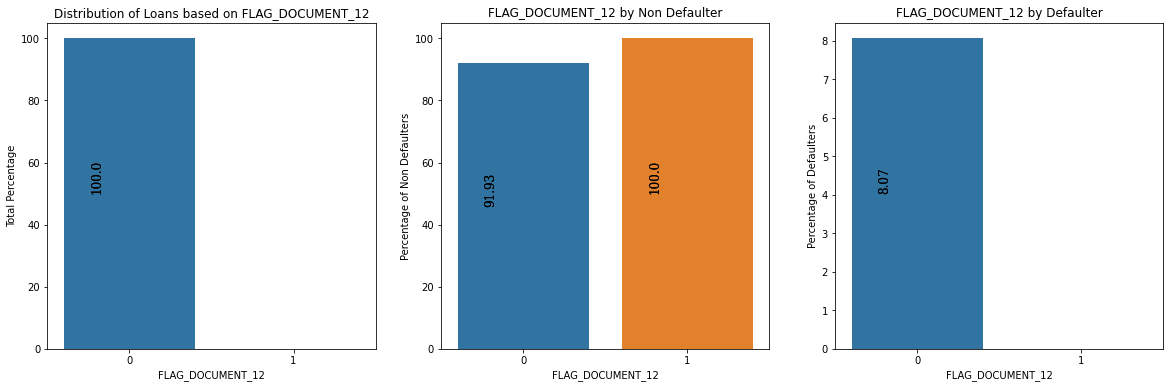

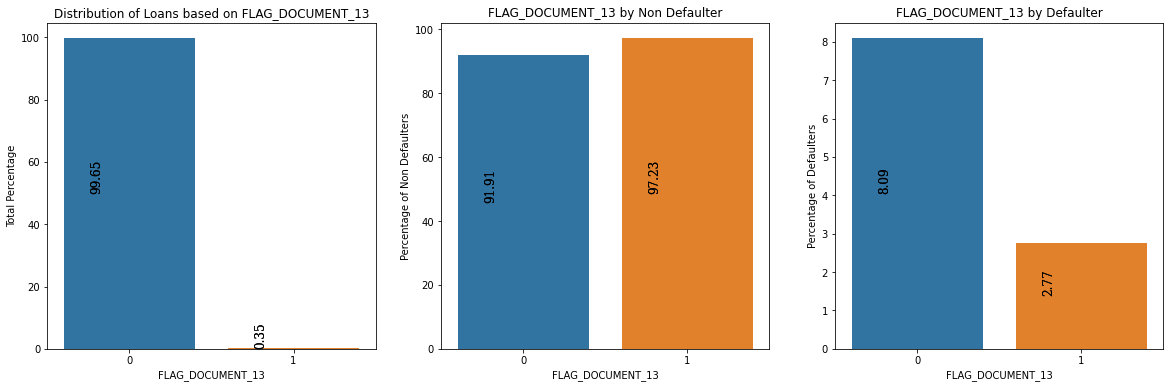

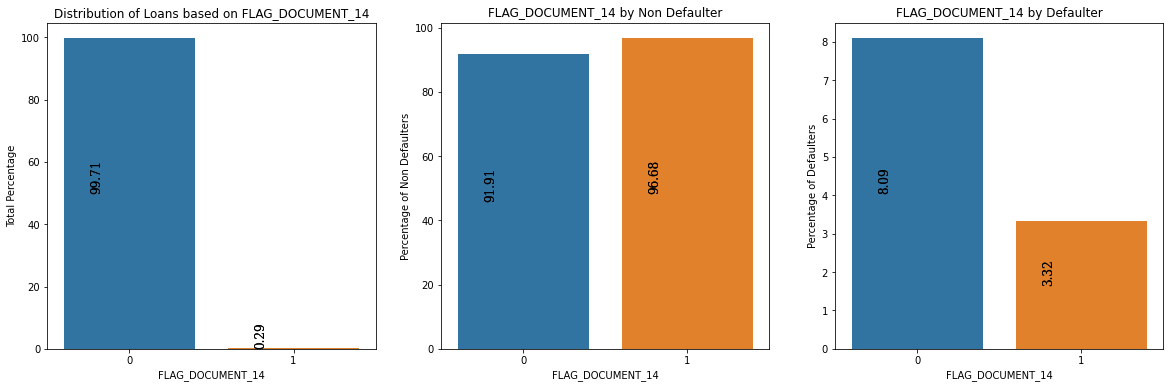

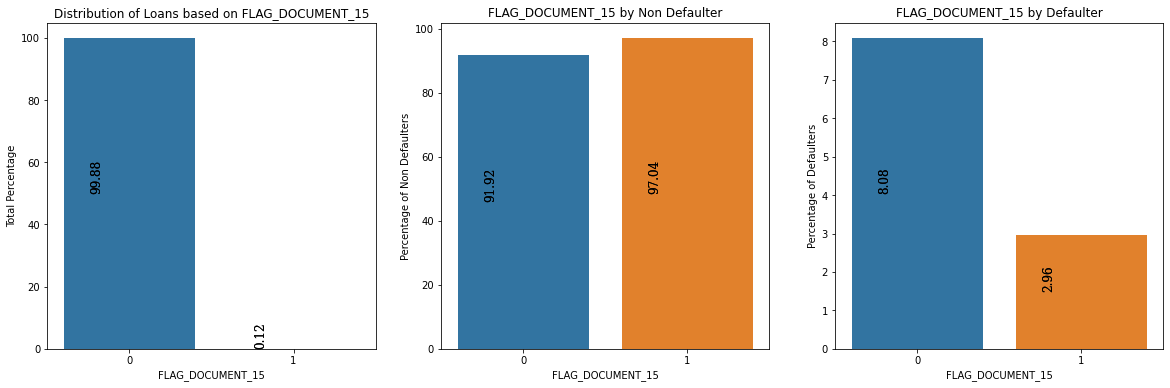

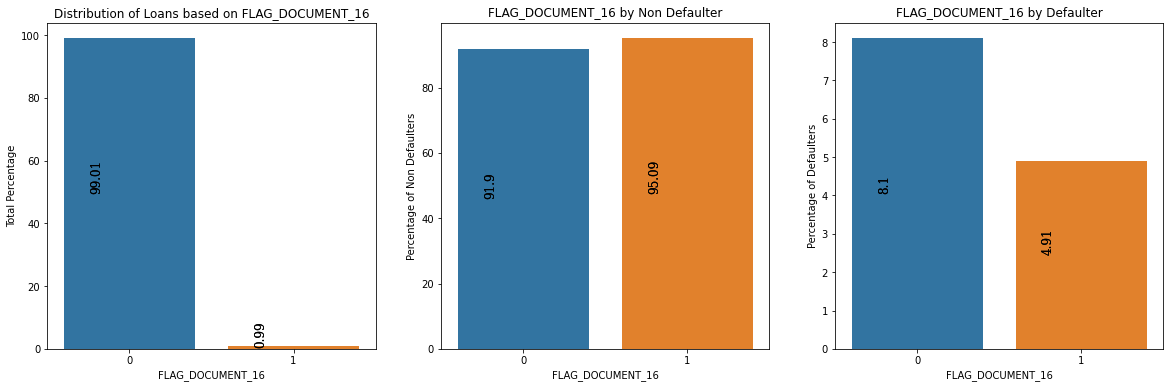

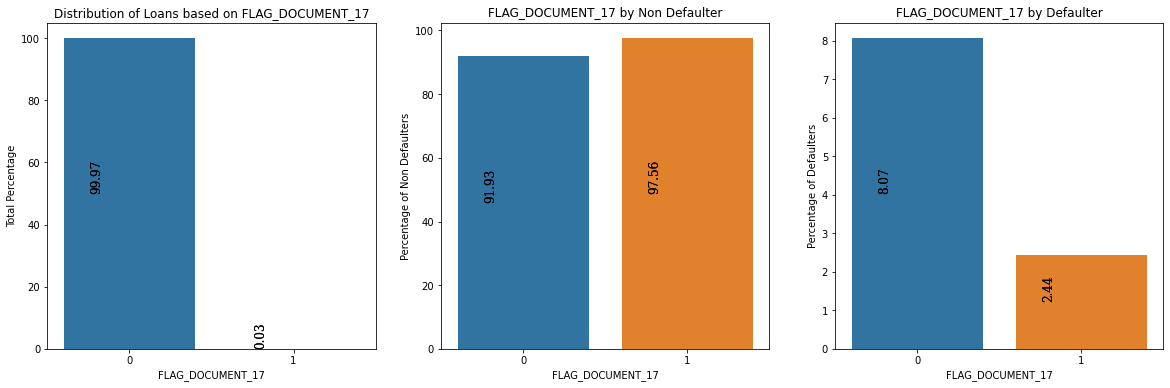

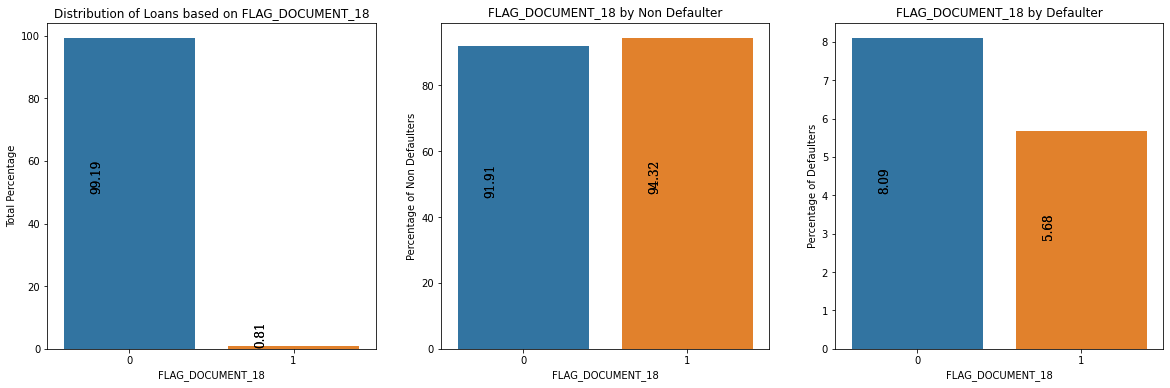

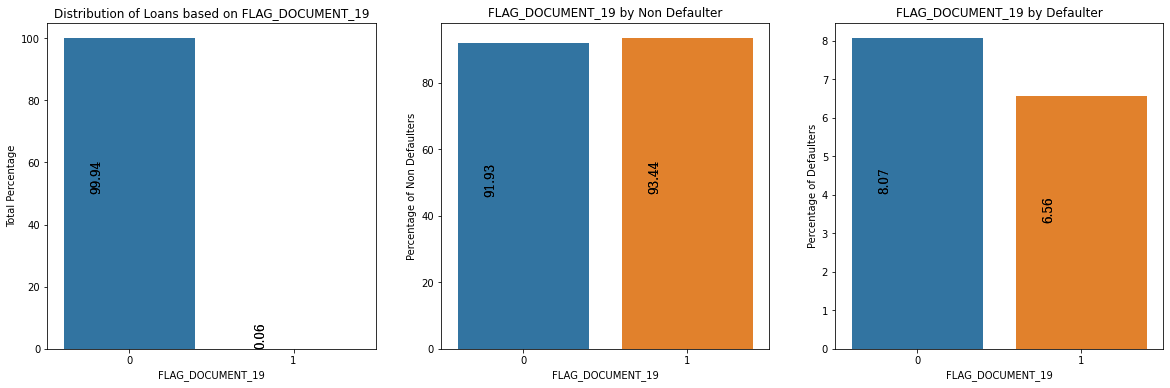

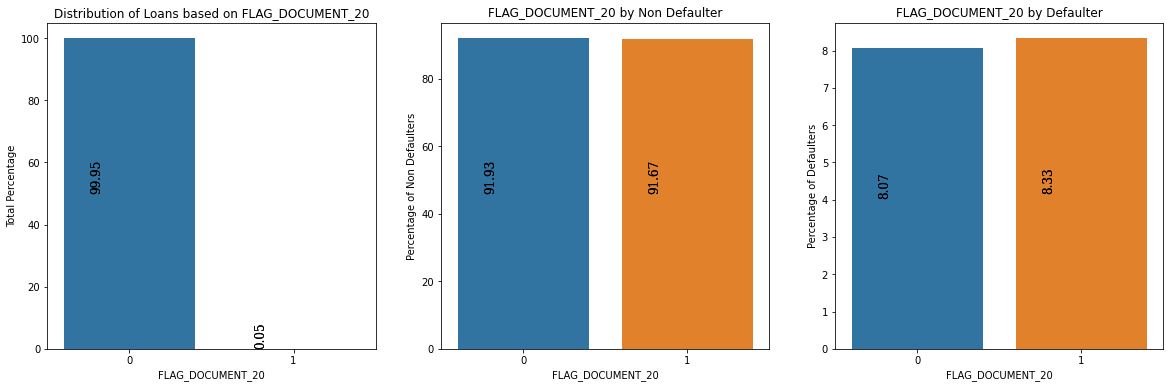

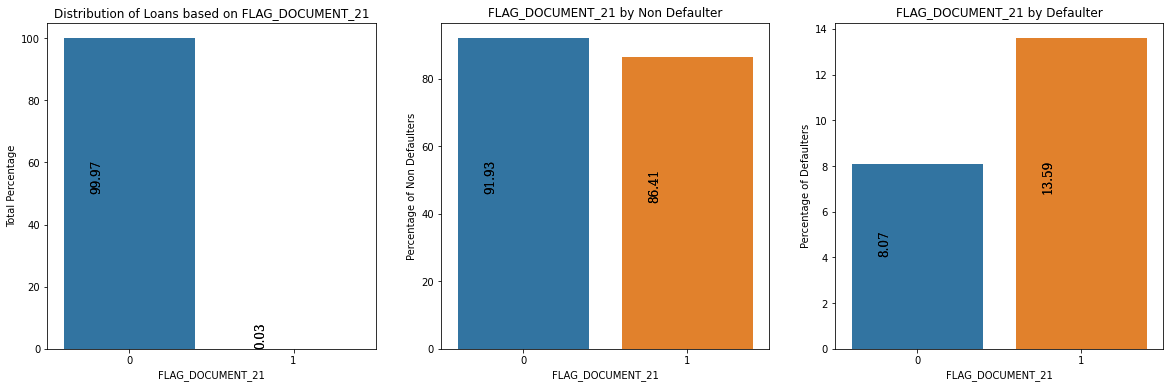

In [499]:
cols= ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
for col in cols:
  categorical_plot(df_app_data,col)

**Combining all Flag Documents**

In [501]:
df_app_data['LOAN DOCUMENTS']= df_app_data['FLAG_DOCUMENT_2'] + df_app_data['FLAG_DOCUMENT_3'] + df_app_data['FLAG_DOCUMENT_4'] + df_app_data['FLAG_DOCUMENT_5'] + df_app_data['FLAG_DOCUMENT_6']+ df_app_data['FLAG_DOCUMENT_7']+df_app_data['FLAG_DOCUMENT_8'] + df_app_data['FLAG_DOCUMENT_9'] + df_app_data['FLAG_DOCUMENT_10'] + df_app_data['FLAG_DOCUMENT_11'] + df_app_data['FLAG_DOCUMENT_12']+ df_app_data['FLAG_DOCUMENT_13']+df_app_data['FLAG_DOCUMENT_14'] + df_app_data['FLAG_DOCUMENT_15'] + df_app_data['FLAG_DOCUMENT_16'] + df_app_data['FLAG_DOCUMENT_17'] + df_app_data['FLAG_DOCUMENT_18']+ df_app_data['FLAG_DOCUMENT_19']+df_app_data['FLAG_DOCUMENT_20']+df_app_data['FLAG_DOCUMENT_21']

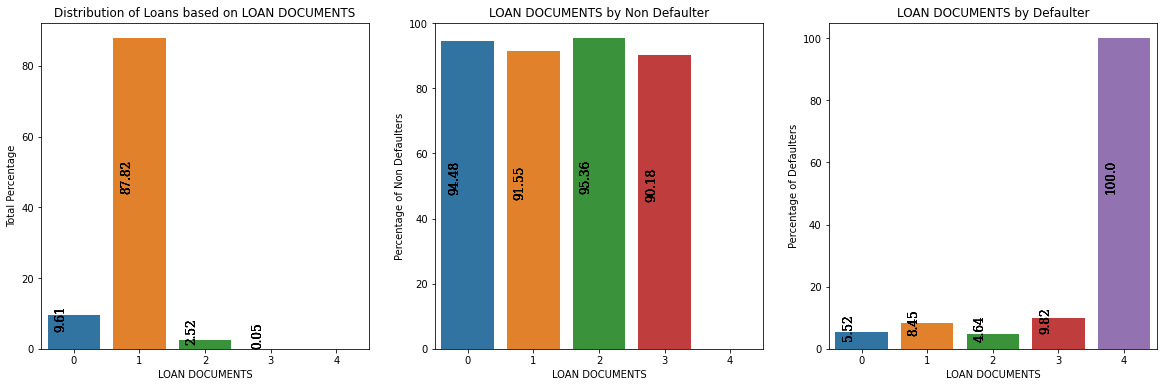

In [503]:
categorical_plot(df_app_data,'LOAN DOCUMENTS')

 **Majority of the Clients have provided only one document which is Document 3**

---



 **USER SOCIAL RATINGS**

  **Analyzing OBS_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 30 DPD (days past due) default**

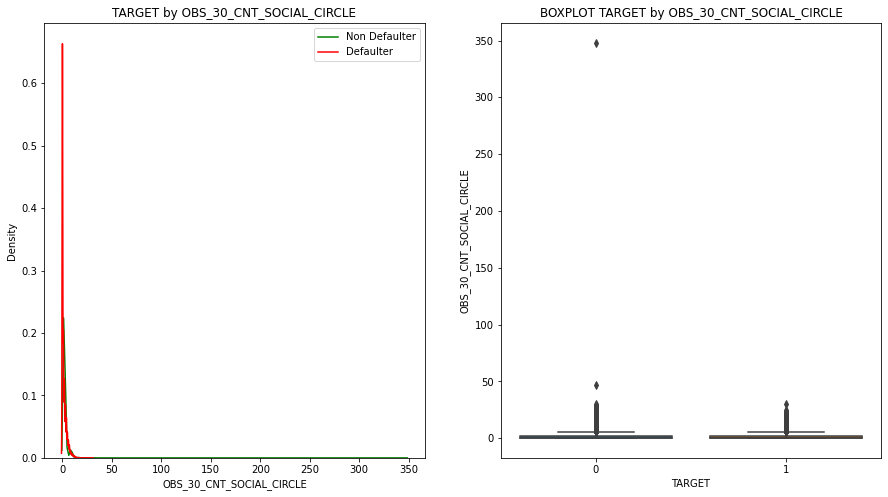

In [505]:
numerical_plot(df_app_data,'OBS_30_CNT_SOCIAL_CIRCLE')

There are outliers as there are values around 350 which is extremely high

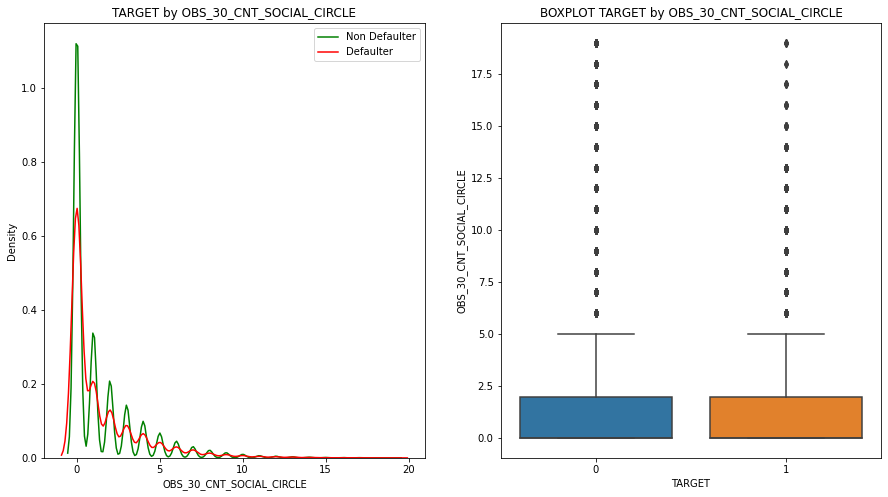

In [507]:
numerical_plot(df_app_data[df_app_data['OBS_30_CNT_SOCIAL_CIRCLE']<20],'OBS_30_CNT_SOCIAL_CIRCLE')

  **Analyzing DEF_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 30 DPD (days past due)**

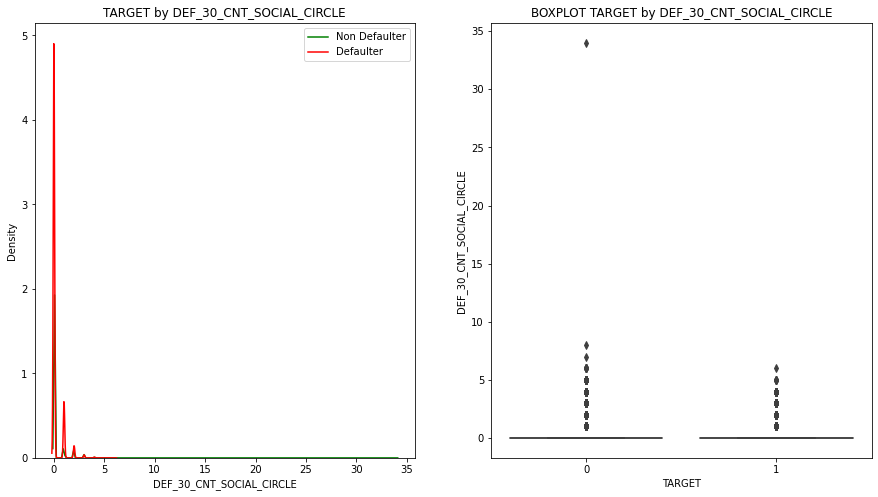

In [509]:
numerical_plot(df_app_data,'DEF_30_CNT_SOCIAL_CIRCLE')

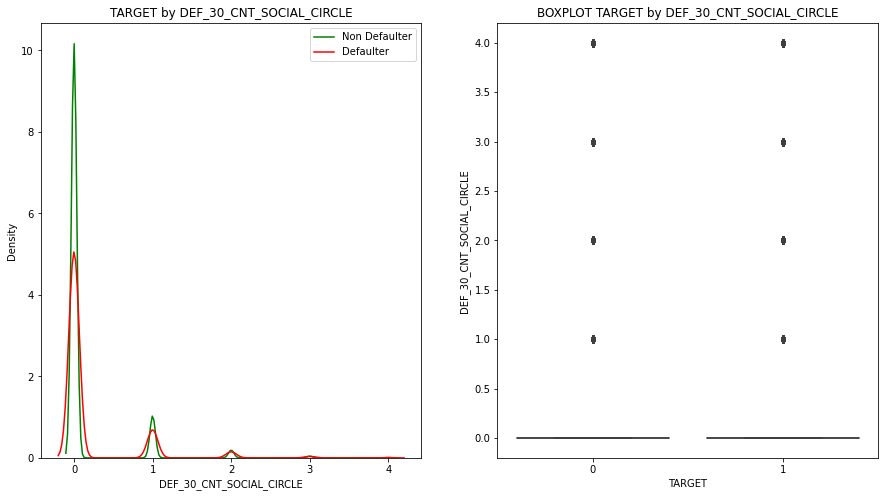

In [511]:
numerical_plot(df_app_data[df_app_data['DEF_30_CNT_SOCIAL_CIRCLE']<5],'DEF_30_CNT_SOCIAL_CIRCLE')

  **Analyzing OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default**
  

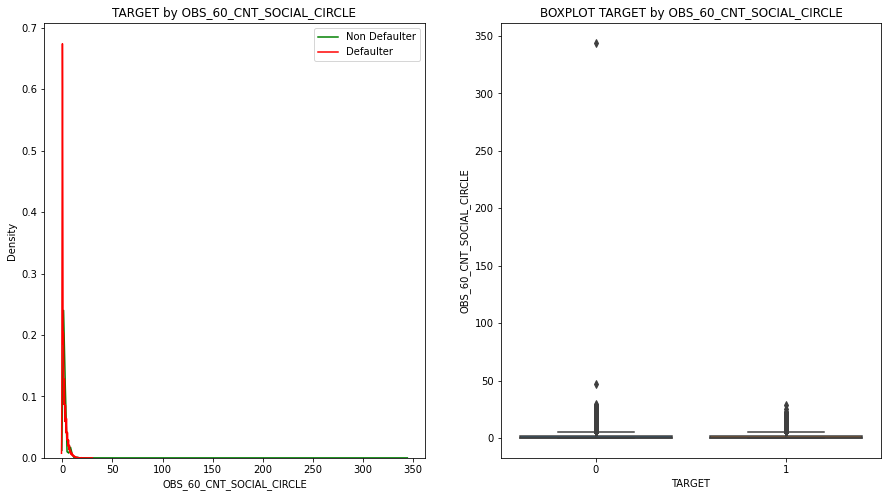

In [513]:
numerical_plot(df_app_data,'OBS_60_CNT_SOCIAL_CIRCLE')

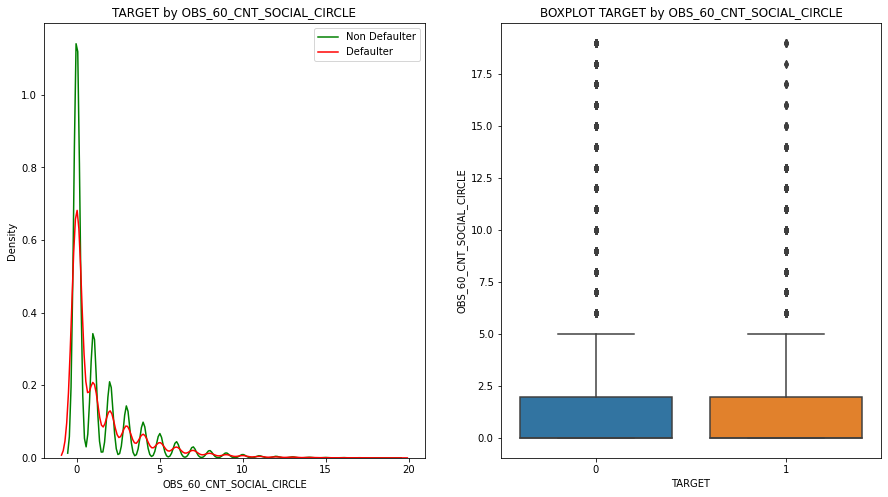

In [515]:
numerical_plot(df_app_data[df_app_data['OBS_60_CNT_SOCIAL_CIRCLE']<20],'OBS_60_CNT_SOCIAL_CIRCLE')

  **Analyzing DEF_30_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD**
  

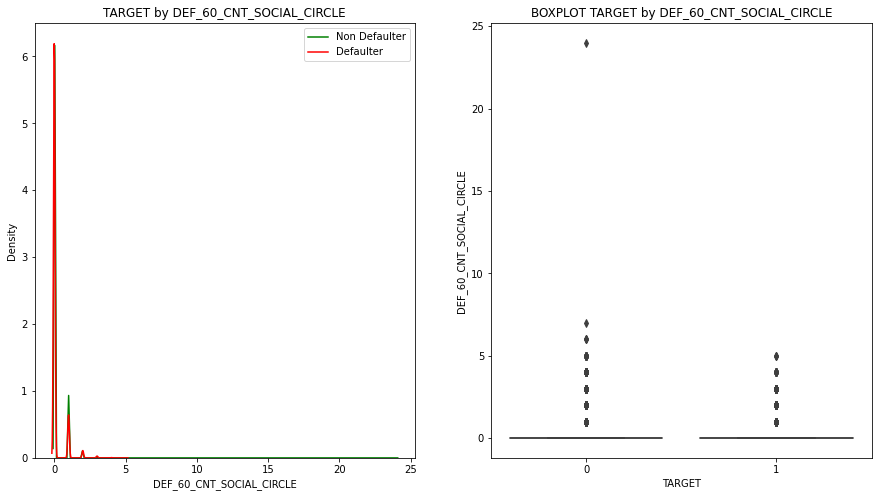

In [517]:
numerical_plot(df_app_data,'DEF_60_CNT_SOCIAL_CIRCLE')

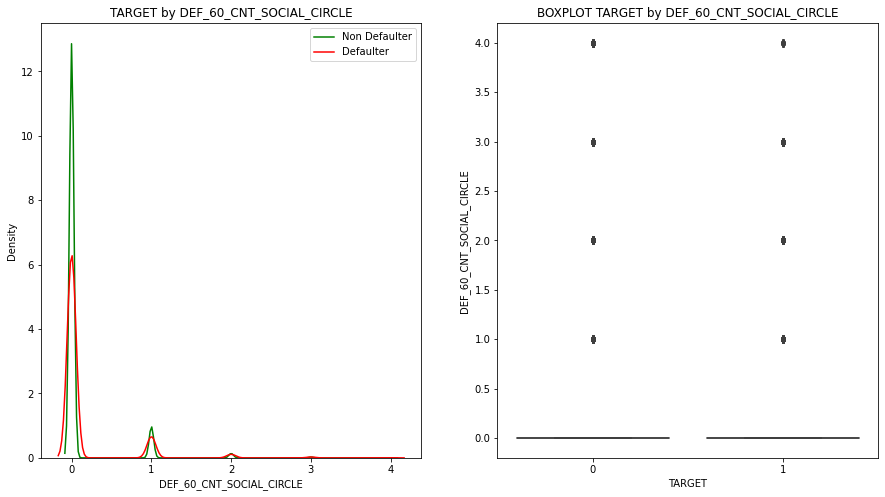

In [519]:
numerical_plot(df_app_data[df_app_data['DEF_60_CNT_SOCIAL_CIRCLE']<5],'DEF_60_CNT_SOCIAL_CIRCLE')

 **Number of Observables are less for majority of the Clients. There are lot of outliers**
 

**BI VARIATE ANALYSIS**











**FAMILY, INCOME AND TARGET**

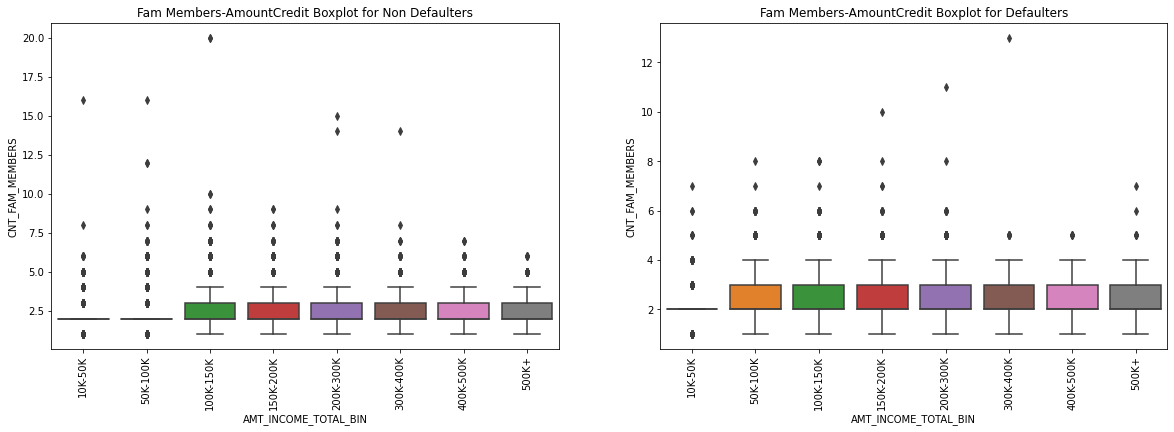

In [521]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='CNT_FAM_MEMBERS', data=df_app_data[df_app_data['TARGET'] == 0], x="AMT_INCOME_TOTAL_BIN",ax=axs[0]).set_title("Fam Members-AmountCredit Boxplot for Non Defaulters")
sns.boxplot(y='CNT_FAM_MEMBERS', data=df_app_data[df_app_data['TARGET'] == 1], x="AMT_INCOME_TOTAL_BIN",ax=axs[1]).set_title("Fam Members-AmountCredit Boxplot for Defaulters")
for ax in axs.flatten():  
  for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()

**Applicants with 2 family members in income range 10K-400K are more likely to default loans.<br>**

**AGE, INCOME AND TARGET**

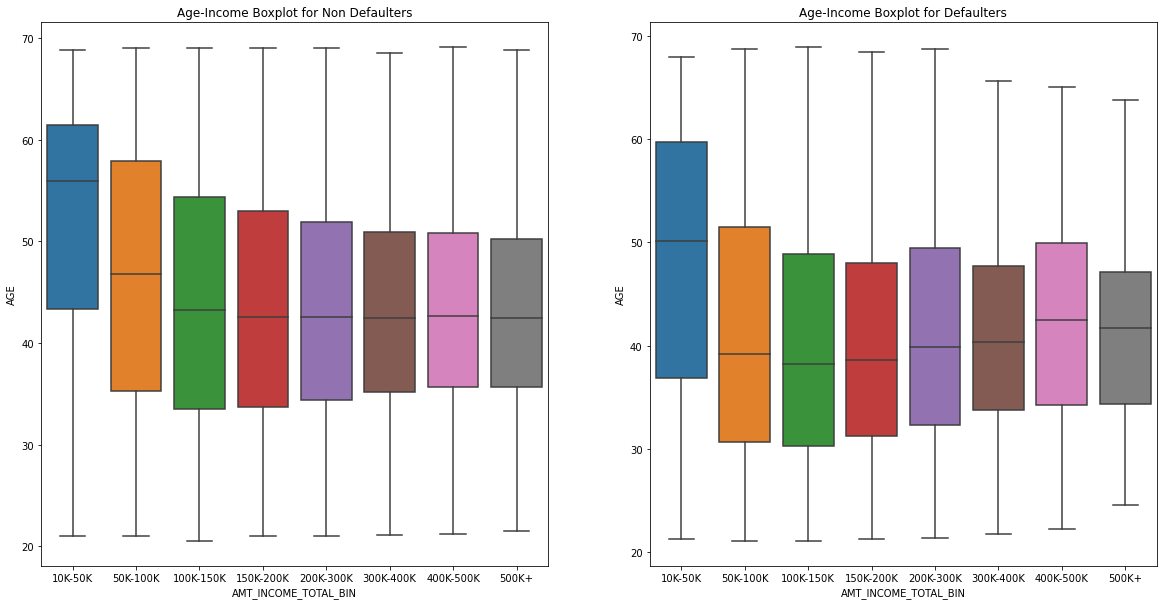

In [523]:

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(y='AGE', data=df_app_data[df_app_data['TARGET'] == 0], x="AMT_INCOME_TOTAL_BIN").set_title("Age-Income Boxplot for Non Defaulters")
plt.subplot(1,2,2)
sns.boxplot(y='AGE', data=df_app_data[df_app_data['TARGET'] == 1], x="AMT_INCOME_TOTAL_BIN").set_title("Age-Income Boxplot for Defaulters")
plt.show()


 **Clients with Age 50 or more are less likely to default if there income is more than 50K<br>
 People in the age group 30-40 are more likely to default**


**EDUCATION TYPE, AGE AND TARGET**

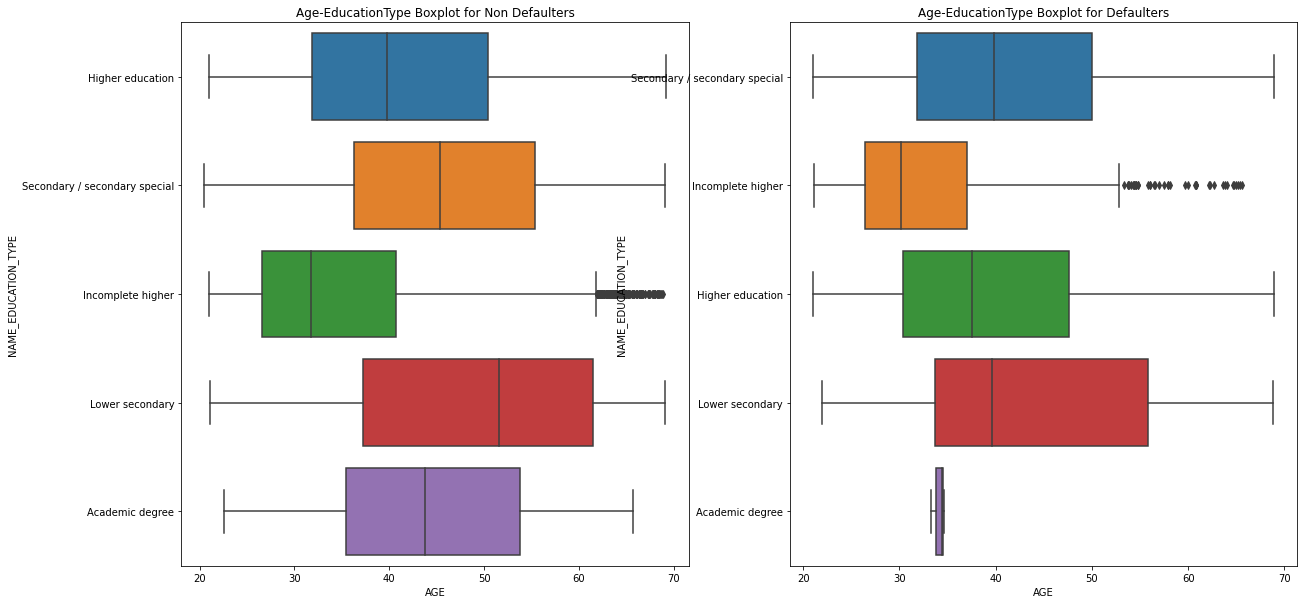

In [525]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(y='NAME_EDUCATION_TYPE', data=df_app_data[df_app_data['TARGET'] == 0], x="AGE").set_title("Age-EducationType Boxplot for Non Defaulters")
plt.subplot(1,2,2)
sns.boxplot(y='NAME_EDUCATION_TYPE', data=df_app_data[df_app_data['TARGET'] == 1], x="AGE").set_title("Age-EducationType Boxplot for Defaulters")
plt.show()

**Clients with Lower Secondary Degree are most likely to default<br>
Clients with Academic degree are better at paying off loans**


**HOUSE/CAR OWNSERSHIP AND TARGET**

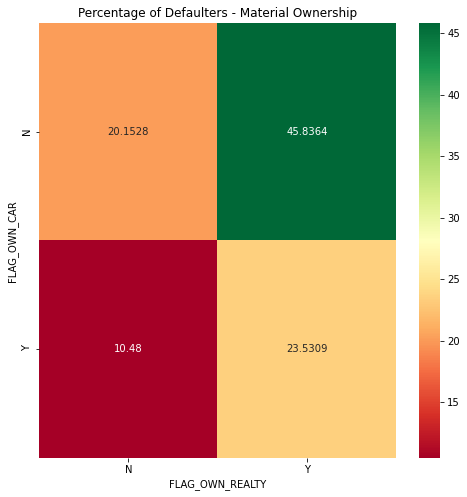

In [527]:
perc = lambda x: 100*x.count()/df_app_data.shape[0]
material = pd.pivot_table(index="FLAG_OWN_CAR", columns ="FLAG_OWN_REALTY", values="TARGET", data=df_app_data, aggfunc=perc)
plt.figure(figsize=(8,8))
plt.title('Percentage of Defaulters - Material Ownership')
sns.heatmap(material,annot=True,fmt='g',cmap='RdYlGn')
plt.show()


**People with House and No car have the maximum no of defaulters**

**WORKING CLIENTS - Housing Type, INCOME < 300000 AND TARGET**

In [529]:
df_default_data[df_default_data['NAME_INCOME_TYPE']=="Working"]['OCCUPATION_TYPE'].value_counts()

Laborers                 4567
Sales staff              2116
Drivers                  1542
Core staff                974
Managers                  694
Security staff            560
Cooking staff             464
High skill tech staff     440
Cleaning staff            353
Medicine staff            348
Low-skill Laborers        294
Accountants               259
Private service staff     122
Waiters/barmen staff      103
Secretaries                53
Realty agents              41
IT staff                   19
HR staff                   17
Name: OCCUPATION_TYPE, dtype: int64

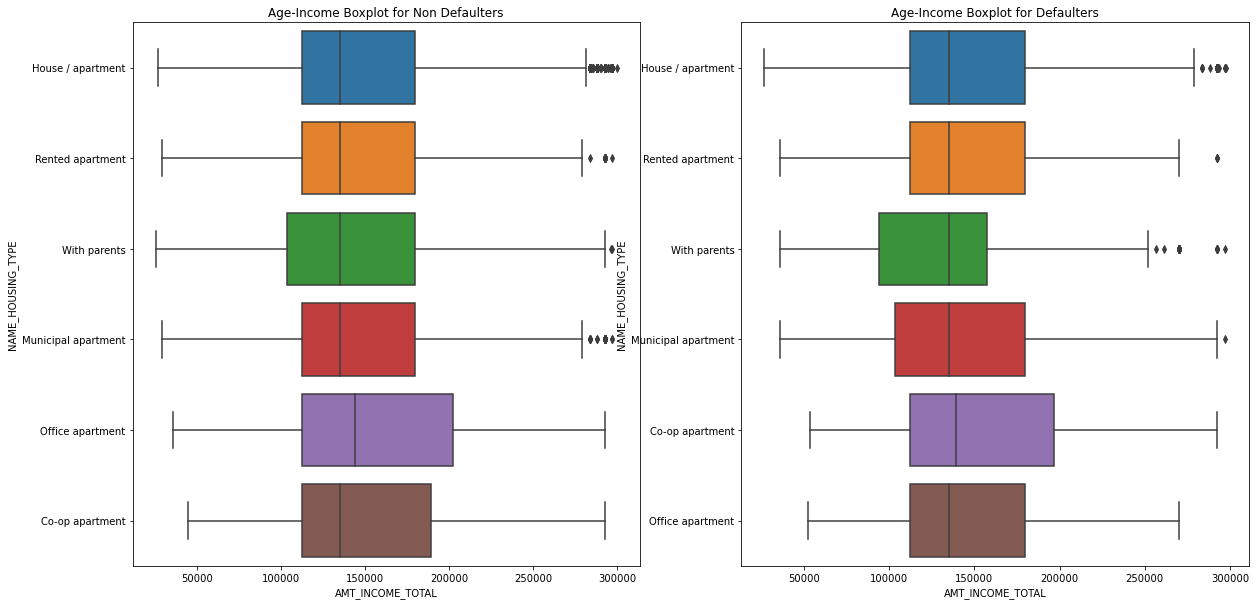

In [531]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(y='NAME_HOUSING_TYPE', data=df_nondefault_data[(df_nondefault_data['NAME_INCOME_TYPE']=="Working") & (df_nondefault_data['AMT_INCOME_TOTAL']<300000)], x="AMT_INCOME_TOTAL").set_title("Age-Income Boxplot for Non Defaulters")
plt.subplot(1,2,2)
sns.boxplot(y='NAME_HOUSING_TYPE', data=df_default_data[(df_default_data['NAME_INCOME_TYPE']=="Working") & (df_default_data['AMT_INCOME_TOTAL']<300000)], x="AMT_INCOME_TOTAL").set_title("Age-Income Boxplot for Defaulters")
plt.show()



 **Working Clients living with parents are less likely to default loans**

 **CONTRACT TYPE, CREDIT < 300000, GENDER AND TARGET**

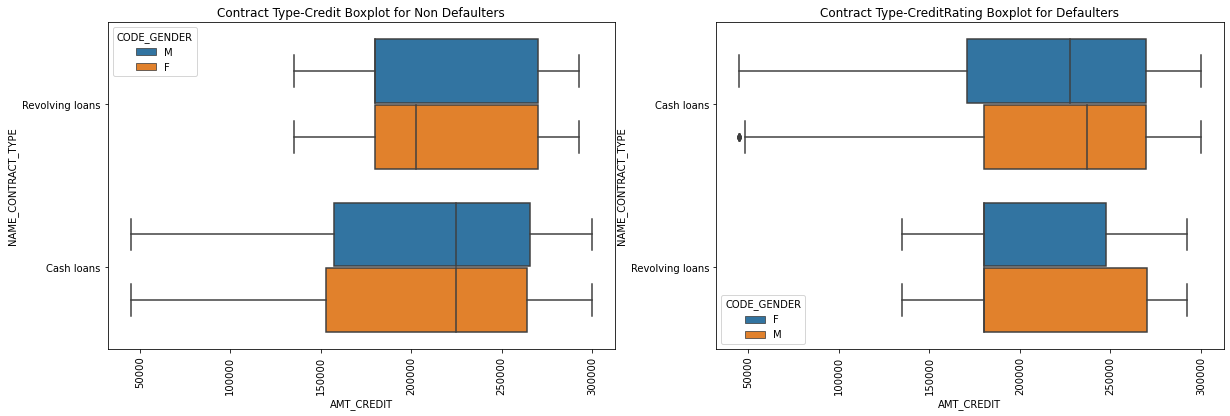

In [533]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='NAME_CONTRACT_TYPE', data=df_nondefault_data[df_nondefault_data['AMT_CREDIT']<300000], x="AMT_CREDIT",ax=axs[0],hue="CODE_GENDER").set_title("Contract Type-Credit Boxplot for Non Defaulters")
sns.boxplot(y='NAME_CONTRACT_TYPE', data=df_default_data[df_default_data['AMT_CREDIT']<300000], x="AMT_CREDIT",ax=axs[1],hue="CODE_GENDER").set_title("Contract Type-CreditRating Boxplot for Defaulters")
for ax in axs.flatten():  
  for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()


 **Females are better at paying Revolving Loan.<br> Males are better at ppaying Cash Loans**

 **HOUSING TYPE, REGION RATING AND TARGET**

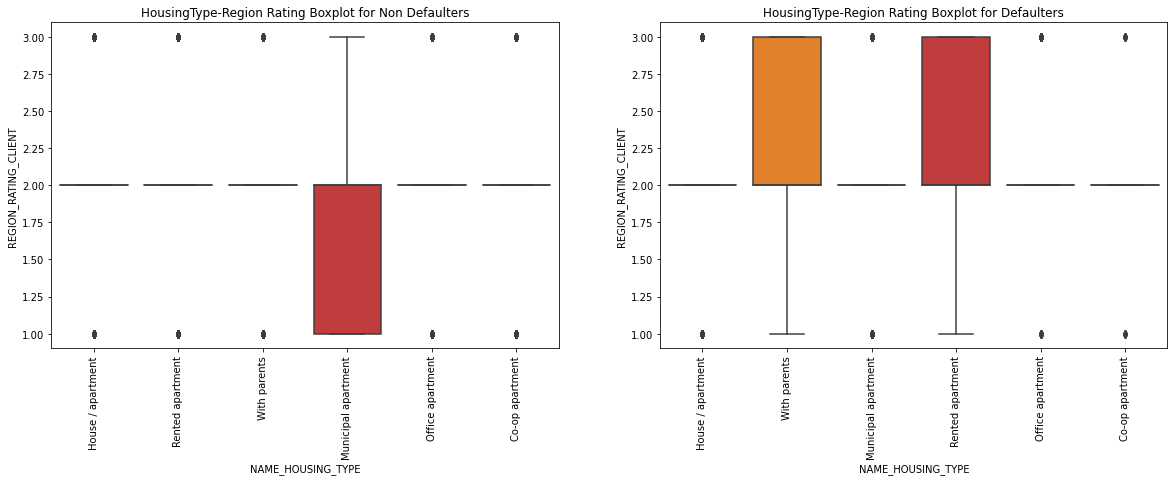

In [535]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='REGION_RATING_CLIENT', data=df_nondefault_data, x="NAME_HOUSING_TYPE",ax=axs[0]).set_title("HousingType-Region Rating Boxplot for Non Defaulters")
sns.boxplot(y='REGION_RATING_CLIENT', data=df_default_data, x="NAME_HOUSING_TYPE",ax=axs[1]).set_title("HousingType-Region Rating Boxplot for Defaulters")
for ax in axs.flatten():  
  for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()

 **Clients with Region rating 2 and living in House/Apartment have maximum defaulters**

 **FAMILY STATUS, GENDER, ANNUITY AND TARGET** 

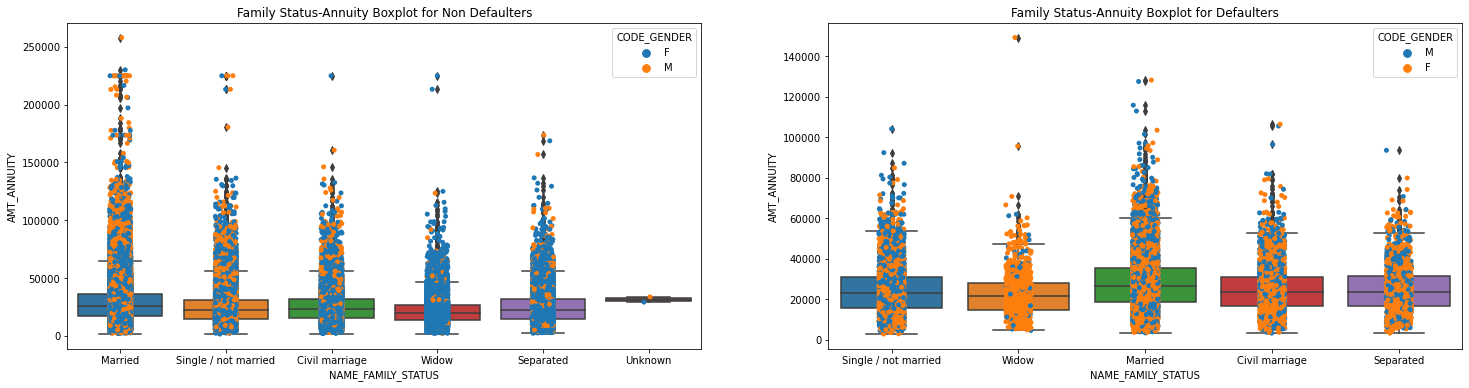

In [537]:
fig, axs = plt.subplots(1,2,figsize=(25,6))
sns.boxplot(x='NAME_FAMILY_STATUS', y='AMT_ANNUITY', data =df_nondefault_data ,ax=axs[0] ).set_title("Family Status-Annuity Boxplot for Non Defaulters")
sns.stripplot(x="NAME_FAMILY_STATUS", y="AMT_ANNUITY", data=df_nondefault_data, hue="CODE_GENDER",ax=axs[0]  )
sns.boxplot(x='NAME_FAMILY_STATUS', y='AMT_ANNUITY', data =df_default_data ,ax=axs[1] )
sns.stripplot(x="NAME_FAMILY_STATUS", y="AMT_ANNUITY", data=df_default_data, hue="CODE_GENDER",ax=axs[1]  ).set_title("Family Status-Annuity Boxplot for Defaulters")
plt.show()

**Widow and Seperated Females are more liekly to default loans**

 **GOODS PRICE, EDUCATION, GENDER AND TARGET**

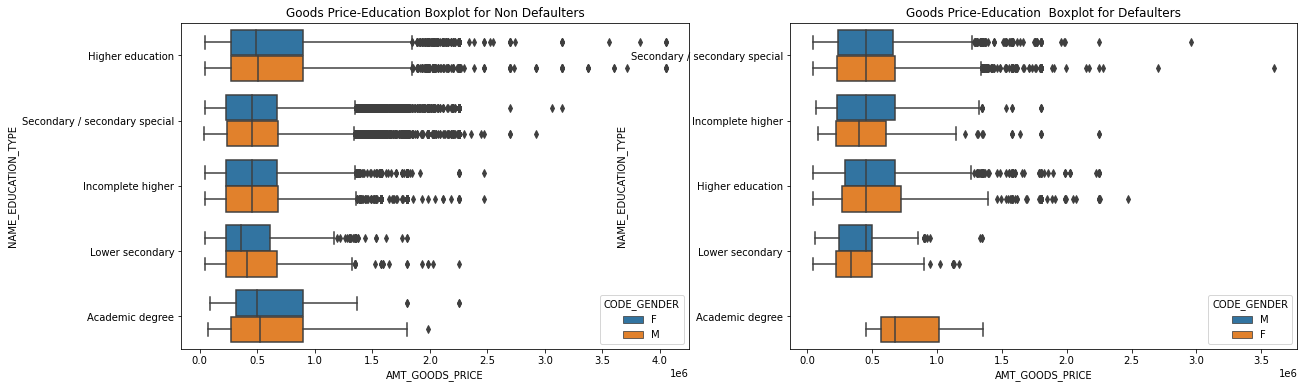

In [539]:
fig, axs = plt.subplots(1,2,figsize=(20,6))
sns.boxplot(x='AMT_GOODS_PRICE', y='NAME_EDUCATION_TYPE', data =df_app_data[df_app_data['TARGET']==0] ,ax=axs[0],hue="CODE_GENDER").set_title("Goods Price-Education Boxplot for Non Defaulters")
sns.boxplot(x='AMT_GOODS_PRICE', y='NAME_EDUCATION_TYPE', data =df_app_data[df_app_data['TARGET']==1] ,ax=axs[1],hue="CODE_GENDER").set_title("Goods Price-Education  Boxplot for Defaulters")
plt.show()

Males with academic degree may not default

**AMT_CREDIT AND AMT_GOODS_PRICE**

<Figure size 1080x720 with 0 Axes>

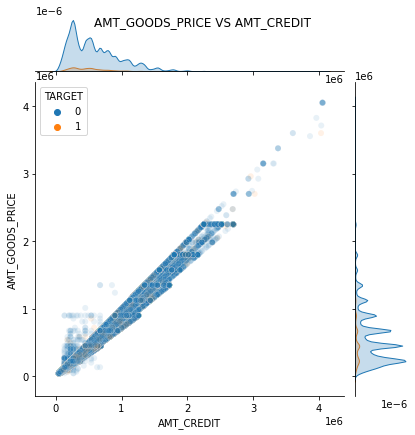

In [541]:
plt.figure(figsize=(15,10))
p = sns.jointplot(data=df_app_data,x="AMT_CREDIT",y="AMT_GOODS_PRICE",alpha=0.1,hue='TARGET')
p.fig.suptitle("AMT_GOODS_PRICE VS AMT_CREDIT")
plt.show()

**AMT_INCOME_TOTAL VS AMT_CREDIT**

<Figure size 1080x720 with 0 Axes>

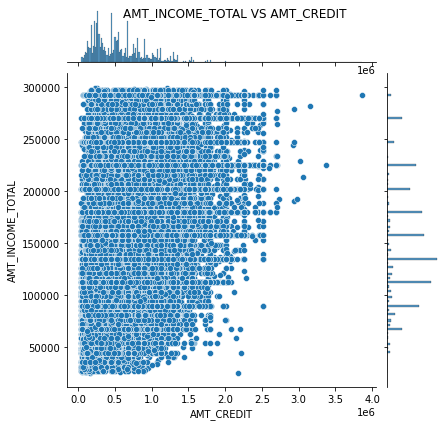

In [543]:
plt.figure(figsize=(15,10))
df= df_app_data[df_app_data['AMT_INCOME_TOTAL']<300000 ]
p = sns.jointplot(data=df,x="AMT_CREDIT",y="AMT_INCOME_TOTAL")
p.fig.suptitle("AMT_INCOME_TOTAL VS AMT_CREDIT")
plt.show()

<Figure size 1080x720 with 0 Axes>

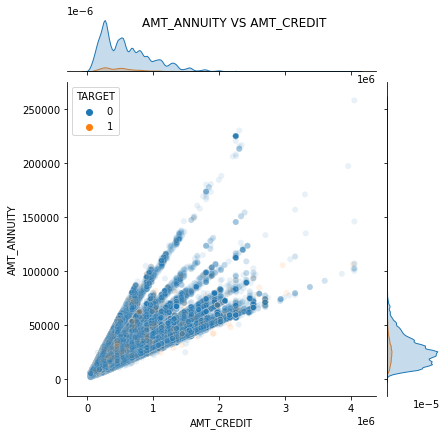

In [545]:
plt.figure(figsize=(15,10))
p = sns.jointplot(data=df_app_data,x="AMT_CREDIT",y="AMT_ANNUITY",alpha=0.1,hue='TARGET')
p.fig.suptitle("AMT_ANNUITY VS AMT_CREDIT")
plt.show()

  **CORRELATION**

In [547]:
corr_data = df_app_data.corr()['TARGET'].sort_values(ascending=False)

In [549]:
corr_data.head(15)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
Name: TARGET, dtype: float64

<AxesSubplot:>

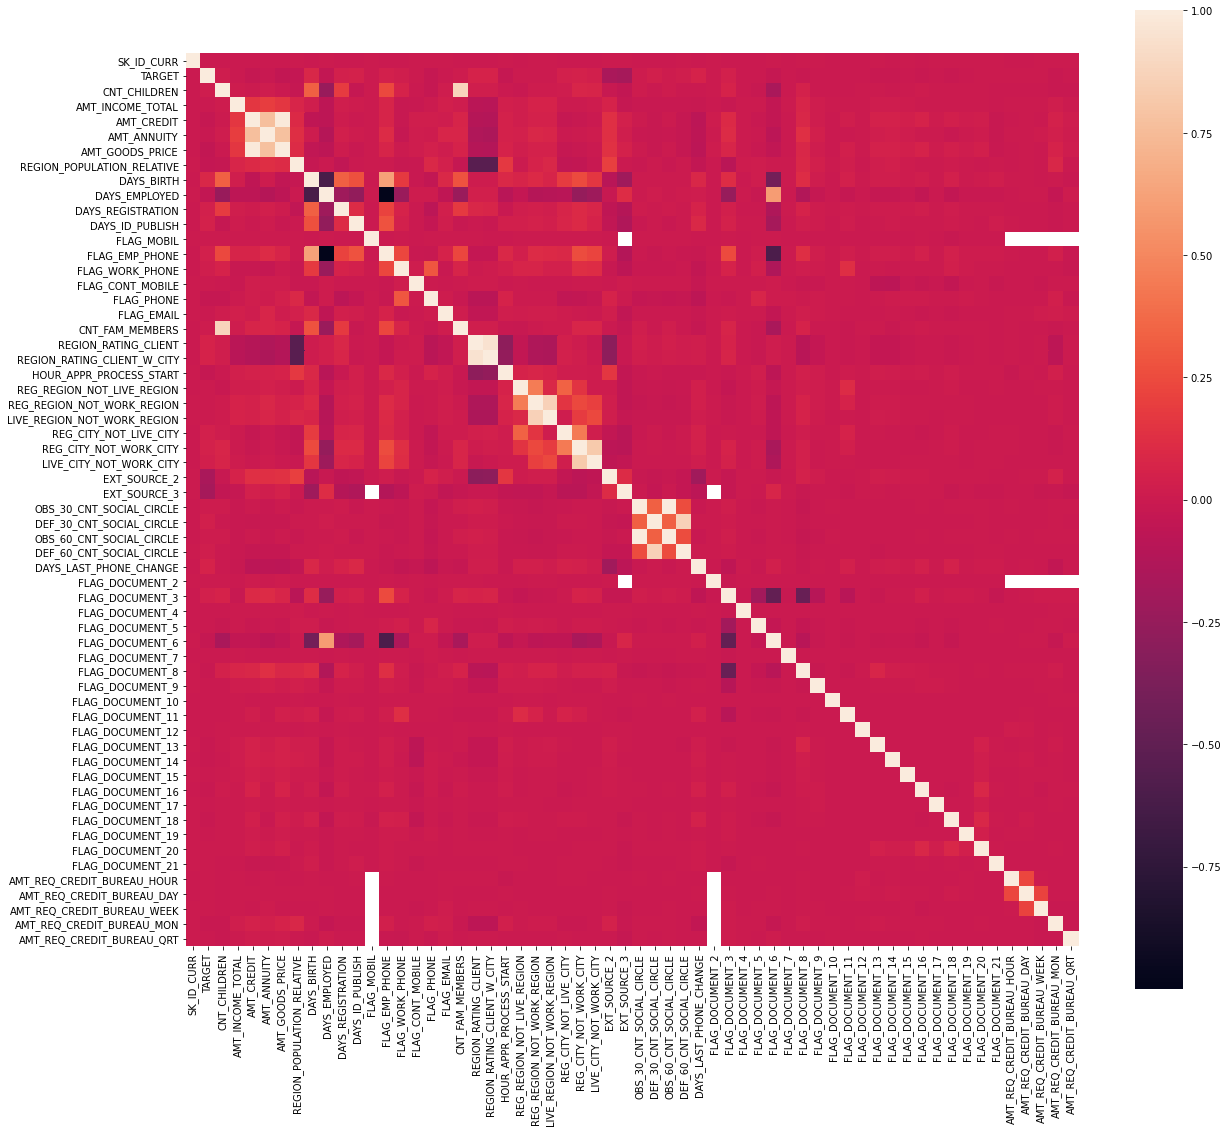

In [551]:
fig, ax= plt.subplots(figsize=(20,18))
sns.heatmap(df_app_data.iloc[:,:72].corr(),square=True)

  **Top 10 Correlation for Non Defaulters**

In [556]:
df_nondefault_data_corr =  df_nondefault_data.iloc[:,:72].corr(method='pearson')
corr=df_nondefault_data_corr.where(np.triu(np.ones(df_nondefault_data_corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()


In [557]:
corr_df.columns = ['Variable1','Variable2','CORRELATION']
corr_df['CORR_ABS'] = abs(corr_df['CORRELATION'])
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

Variable1                   Variable2  CORRELATION  \
789                FLAG_EMP_PHONE               DAYS_EMPLOYED    -0.999758   
1950     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998508   
364               AMT_GOODS_PRICE                  AMT_CREDIT     0.987250   
1219  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149   
1082              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571   
1463  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861   
2011     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859332   
1646      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381   
365               AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686   
304                   AMT_ANNUITY                  AMT_CREDIT     0.771309   

      CORR_ABS  
789   0.999758  
1950  0.998508  
364   0.987250  
1219  0.950149  
1082  0.878571  
1463  0.861861  
2011  0.859332  
1646  0.830381  
365   0.776686  
304   0.771309

  **Top 10 Correlation for Defaulters**

In [558]:
df_default_data_corr =  df_default_data.iloc[:,:72].corr(method='pearson')
corr=df_default_data_corr.where(np.triu(np.ones(df_default_data_corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()


In [559]:
corr_df.columns = ['Variable1','Variable2','CORRELATION']
corr_df['CORR_ABS'] = abs(corr_df['CORRELATION'])
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

Variable1                   Variable2  CORRELATION  \
789                FLAG_EMP_PHONE               DAYS_EMPLOYED    -0.999702   
1950     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998269   
364               AMT_GOODS_PRICE                  AMT_CREDIT     0.983103   
1219  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637   
1082              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484   
2011     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.868994   
1463  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885   
1646      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540   
365               AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699   
304                   AMT_ANNUITY                  AMT_CREDIT     0.752195   

      CORR_ABS  
789   0.999702  
1950  0.998269  
364   0.983103  
1219  0.956637  
1082  0.885484  
2011  0.868994  
1463  0.847885  
1646  0.778540  
365   0.752699  
304   0.752195

  **CORRELATION OF TARGET WITH NORMALIZED SCORE RATINGS AND DAYS_BIRTH**

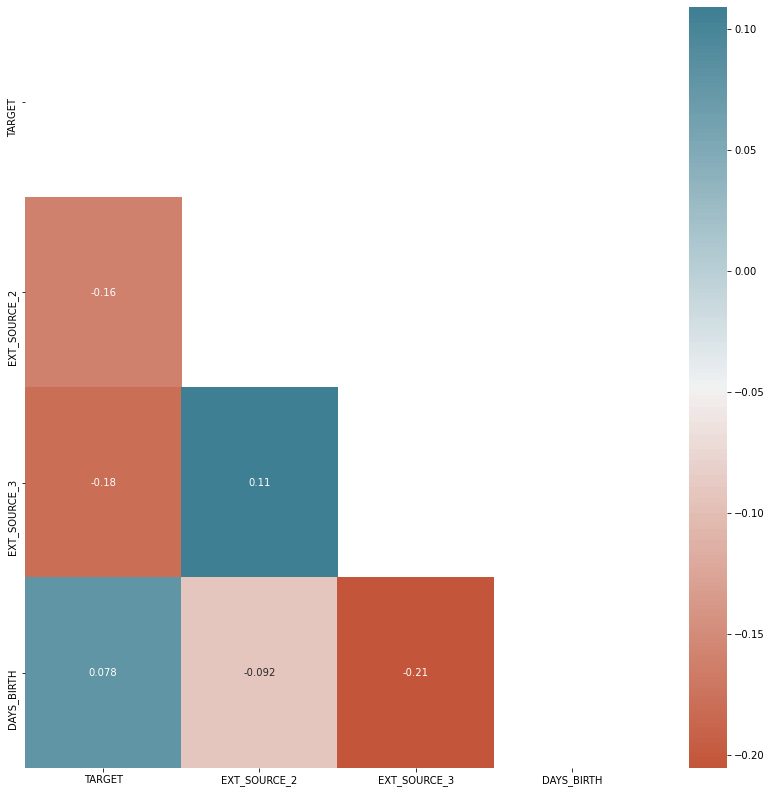

In [560]:
ext_df_cols = ['TARGET',
'EXT_SOURCE_2',
'EXT_SOURCE_3','DAYS_BIRTH']

corr_plot(df_app_data,ext_df_cols)

 **CORRELATION OF LOAN AMOUNTS WITH DAYS_BIRTH and DAYS_EMPLOYED**

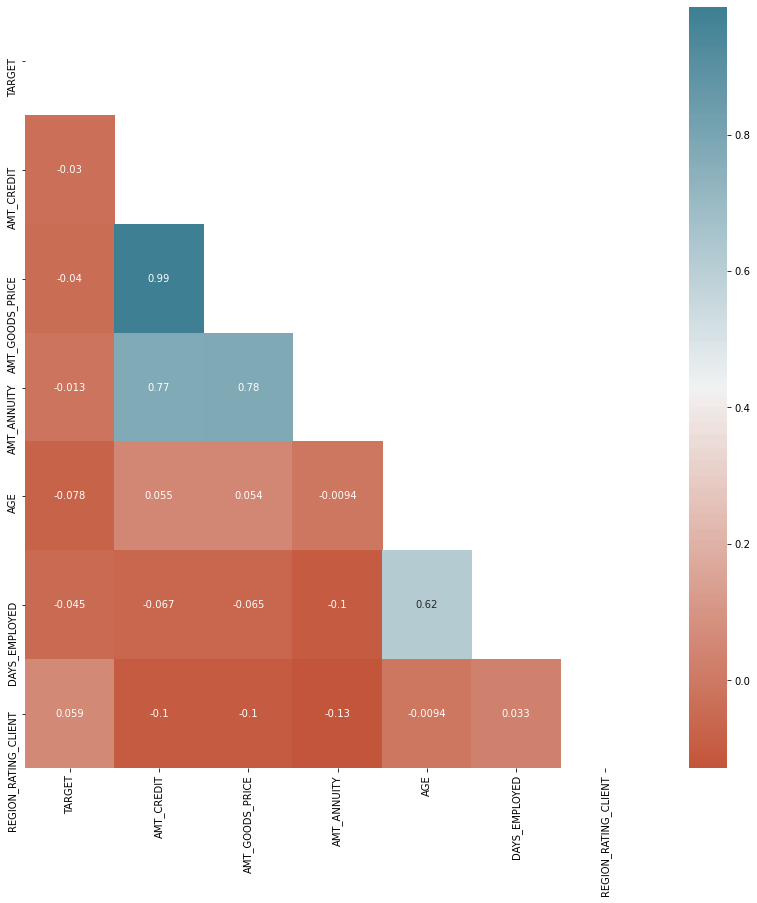

In [561]:
ext_df_cols = ['TARGET','AMT_CREDIT',
'AMT_GOODS_PRICE',
'AMT_ANNUITY','AGE','DAYS_EMPLOYED','REGION_RATING_CLIENT']

corr_plot(df_app_data,ext_df_cols)

   **There is a high correlation between AMT_GOODS_PRICE and AMT_CREDIT<br>
  There is also correlation between DAYS_EMPLOYED and DAYS_BIRTH**

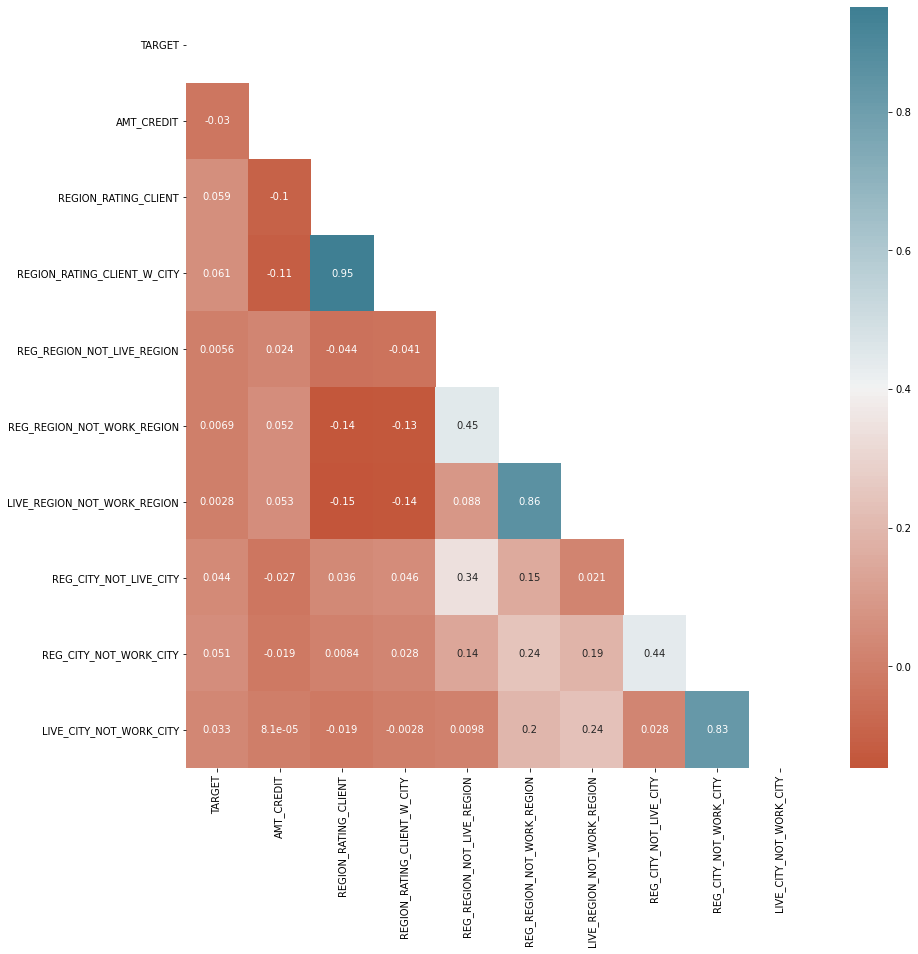

In [562]:
ext_df_cols = ['TARGET','AMT_CREDIT',
'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
corr_plot(df_app_data,ext_df_cols)

**There is a high correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY<br>
High correlation between REG_CITY_NOT_WORK_CITY and LIVE_CITY_NOT_WORK_CITY<br>
High correlation between REG_REGION_NOT_WORK_REGION and LIVE_REGION_NOT_WORK_REGION**

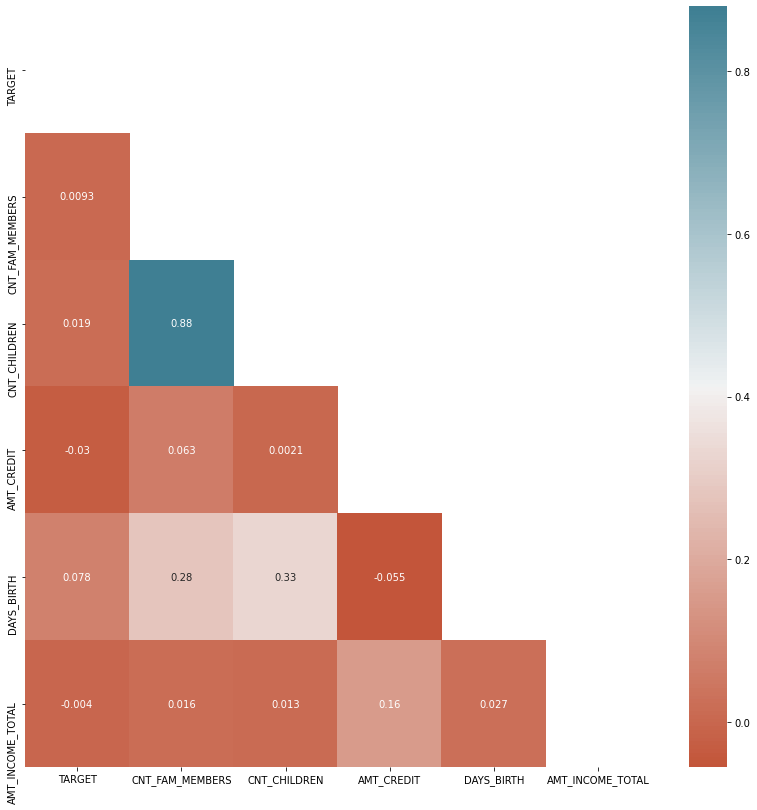

In [563]:
ext_df_cols = ['TARGET','CNT_FAM_MEMBERS',
'CNT_CHILDREN','AMT_CREDIT','DAYS_BIRTH','AMT_INCOME_TOTAL']

corr_plot(df_app_data,ext_df_cols)

 **CNT_CHILDREN has a high correlation with CNT_FAM_MEMBERS**

 **CORRELATION BETWEEN  SOCIAL CIRCLE RATINGs, AGE AND FAMILY**

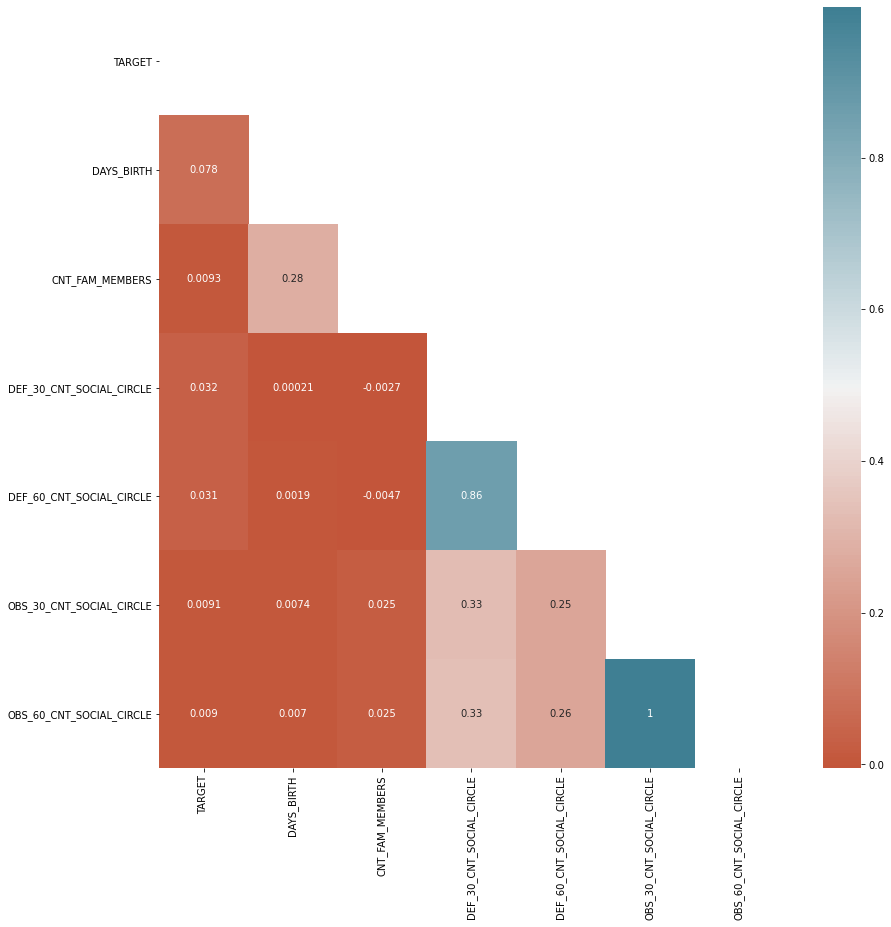

In [564]:
ext_df_cols = ['TARGET','DAYS_BIRTH','FLAG_OWN_REALTY','CNT_FAM_MEMBERS','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']

corr_plot(df_app_data,ext_df_cols)

 **OBS_30_CNT_SOCIAL_CIRCLE has very high postitve correlation with OBS_60_CNT_SOCIAL_CIRCLE<br>
 DEF_30_CNT_SOCIAL_CIRCLE has a positive correlation with DEF_60_CNT_SOCIAL_CIRCLE**

**Previous Application DataSet<br>
<br>**

In [565]:
df_prev_data = pd.read_csv('previous_application.csv')

print("Application data csv head:\n")
df_prev_data.head()

Application data csv head:



SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

 **Checking Null Values**

In [566]:
df_null_values = 100 * df_prev_data.isnull().sum()/df_prev_data.shape[0]
df_null_values

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

 **Null Values more than 40%**

In [567]:
cols = df_null_values[df_null_values>40].sort_values(ascending=False).index

 **Dropping Columns with more than 40% null Values**

In [568]:

df_prev_data.drop(labels=cols,axis=1,inplace=True)

In [569]:
merged_df = df_app_data[['TARGET','SK_ID_CURR','CODE_GENDER','AMT_CREDIT','NAME_CONTRACT_TYPE','AMT_ANNUITY','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE']].merge(df_prev_data[['SK_ID_CURR','AMT_CREDIT','NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE','NAME_CLIENT_TYPE','NAME_CONTRACT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP','NAME_PORTFOLIO']],how="left",on='SK_ID_CURR',suffixes=('_app', '_prev'))
merged_df.head()

TARGET  SK_ID_CURR CODE_GENDER  AMT_CREDIT_app NAME_CONTRACT_TYPE_app  \
0       1      100002           M        406597.5             Cash loans   
1       0      100003           F       1293502.5             Cash loans   
2       0      100003           F       1293502.5             Cash loans   
3       0      100003           F       1293502.5             Cash loans   
4       0      100004           M        135000.0        Revolving loans   

   AMT_ANNUITY  NAME_HOUSING_TYPE    NAME_FAMILY_STATUS NAME_INCOME_TYPE  \
0      24700.5  House / apartment  Single / not married          Working   
1      35698.5  House / apartment               Married    State servant   
2      35698.5  House / apartment               Married    State servant   
3      35698.5  House / apartment               Married    State servant   
4       6750.0  House / apartment  Single / not married          Working   

   AMT_CREDIT_prev NAME_CONTRACT_STATUS NAME_CASH_LOAN_PURPOSE  \
0         179055.0             Approved                    XAP   
1        1035882.0             Approved                    XNA   
2         348637.5             Approved                    XAP   
3          68053.5             Approved                    XAP   
4          20106.0             Approved                    XAP   

  NAME_CLIENT_TYPE NAME_CONTRACT_TYPE_prev             CHANNEL_TYPE  \
0              New          Consumer loans                    Stone   
1         Repeater              Cash loans  Credit and cash offices   
2        Refreshed          Consumer loans                    Stone   
3        Refreshed          Consumer loans             Country-wide   
4              New          Consumer loans         Regional / Local   

  NAME_YIELD_GROUP NAME_PORTFOLIO  
0       low_normal            POS  
1       low_normal           Cash  
2           middle            POS  
3           middle            POS  
4           middle            POS

  **Analyzing NAME_CONTRACT STATUS**

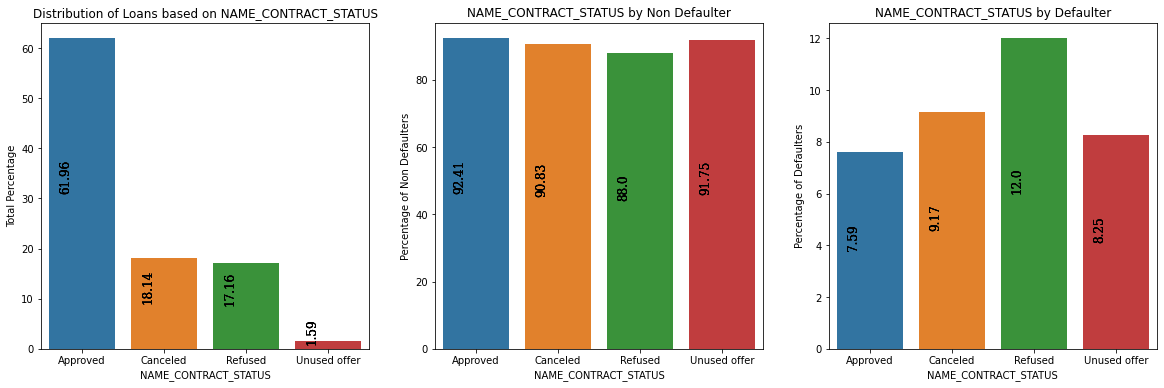

In [570]:
categorical_plot(merged_df,'NAME_CONTRACT_STATUS')

 **Clients whose loans were Refused earlier are more likely to default loans**

 **Analyzing NAME_CASH_LOAN_PURPOSE**

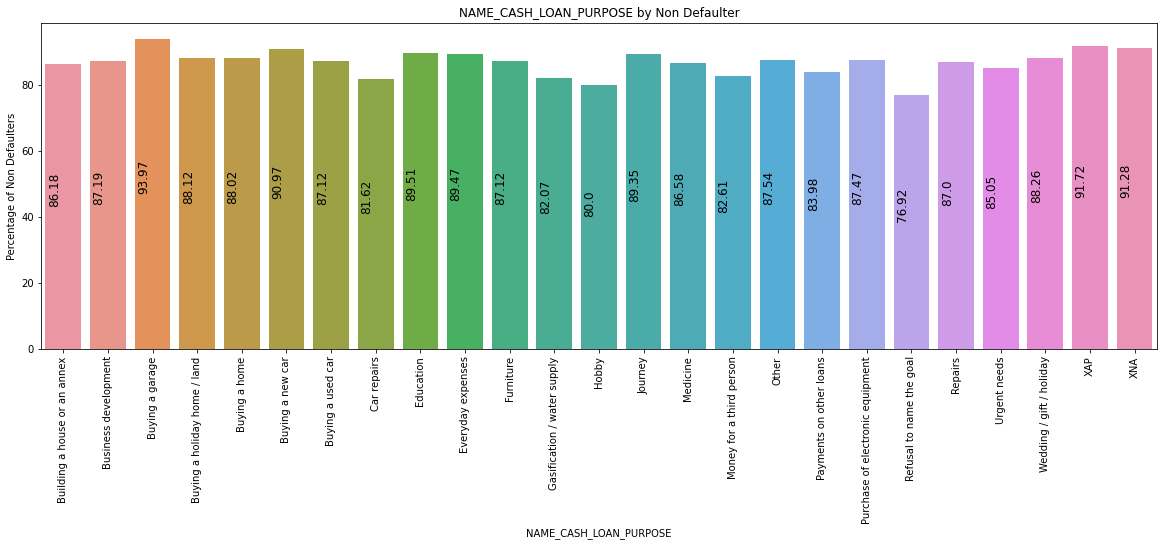

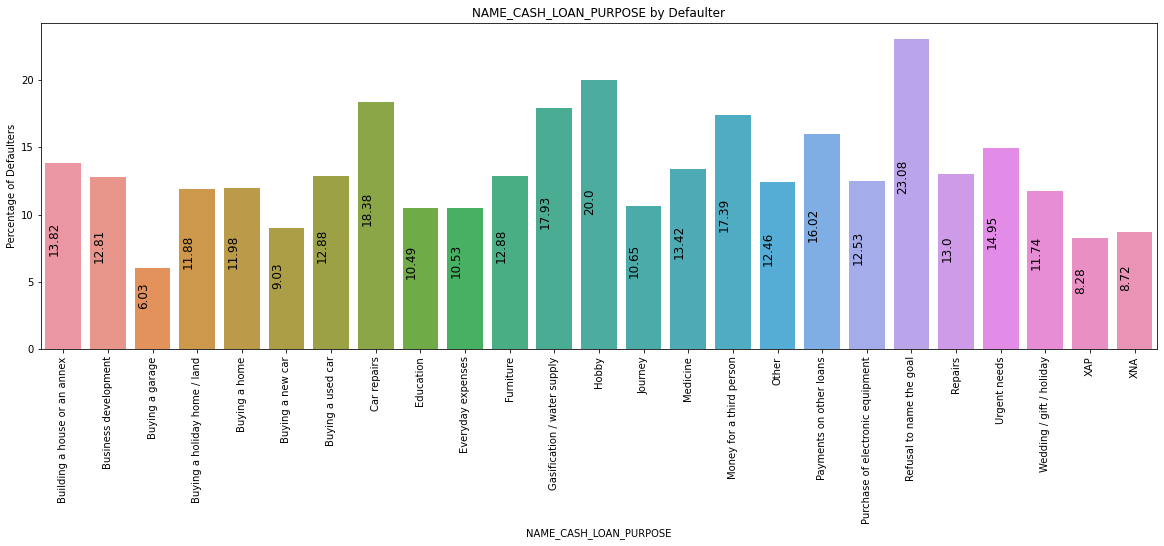

()

In [571]:
fig, ax = plt.subplots(figsize=(20,6))
org_p1 = round((merged_df[merged_df.TARGET == 1]['NAME_CASH_LOAN_PURPOSE'].value_counts() / merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts())*100,2)
org_p0 = round((merged_df[merged_df.TARGET == 0]['NAME_CASH_LOAN_PURPOSE'].value_counts() / merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts())*100,2)
sns.barplot(x= org_p0.index,y=org_p0.values,ax=ax).set_title('NAME_CASH_LOAN_PURPOSE'+" by Non Defaulter")
plt.xticks(rotation=90)
plt.ylabel("Percentage of Non Defaulters")
plt.xlabel("NAME_CASH_LOAN_PURPOSE")
def autolabel(rects):
      for rect in rects:
          height = rect.get_height()
          if height>0:
            ax.text(rect.get_x()+0.2, rect.get_height()/2,height,
                    ha='center', va='bottom', rotation=90, color='black',size=12)
autolabel(ax.patches)
plt.show()
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x= org_p1.index,y=org_p1.values,ax=ax).set_title('NAME_CASH_LOAN_PURPOSE'+" by Defaulter")
plt.ylabel("Percentage of Defaulters")
plt.xlabel("NAME_CASH_LOAN_PURPOSE")
plt.xticks(rotation=90)
autolabel(ax.patches)
plt.show()
()

**Clients who had taken loan with purpose Refusal to name the goal,Hobby are more likely to default loans**

 **Analyzing NAME_CLIENT_TYPE**

**Imputing XNA in Client Type with mode -Repeater**

In [572]:
merged_df.loc[merged_df['NAME_CLIENT_TYPE']=='XNA','NAME_CLIENT_TYPE']=merged_df['NAME_CLIENT_TYPE'].mode()

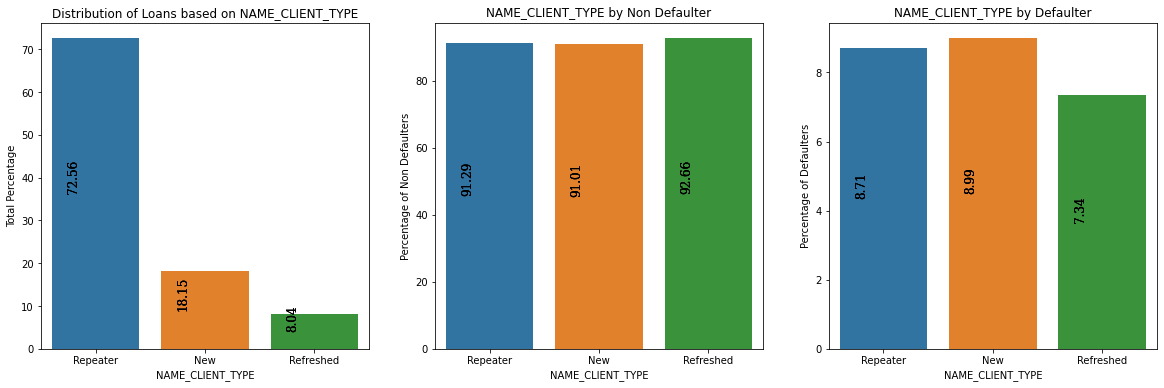

In [573]:
categorical_plot(merged_df,'NAME_CLIENT_TYPE')

 **Repeater Clients are less likely to default loans**

 **Ana;yzing CHANNEL_TYPE**

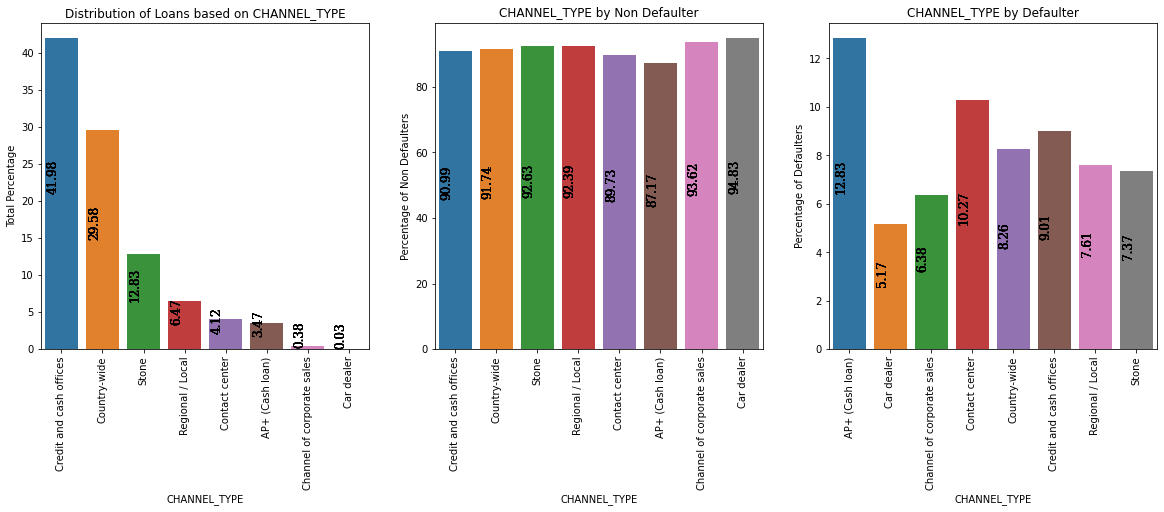

In [574]:
categorical_plot(merged_df,'CHANNEL_TYPE',xticks=90)

 **Clients who had applied with Channel Type AP + (Cash Loan) previously are more likely to default and Clients with Channle type Car dealer are less likely to default**

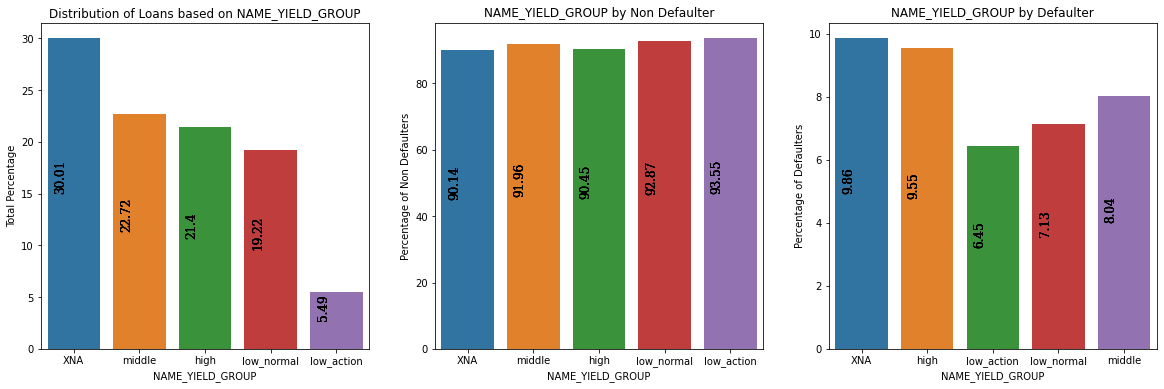

In [575]:
categorical_plot(merged_df,'NAME_YIELD_GROUP')

**Clients with high yield group are more likely to default compared to low_action group**


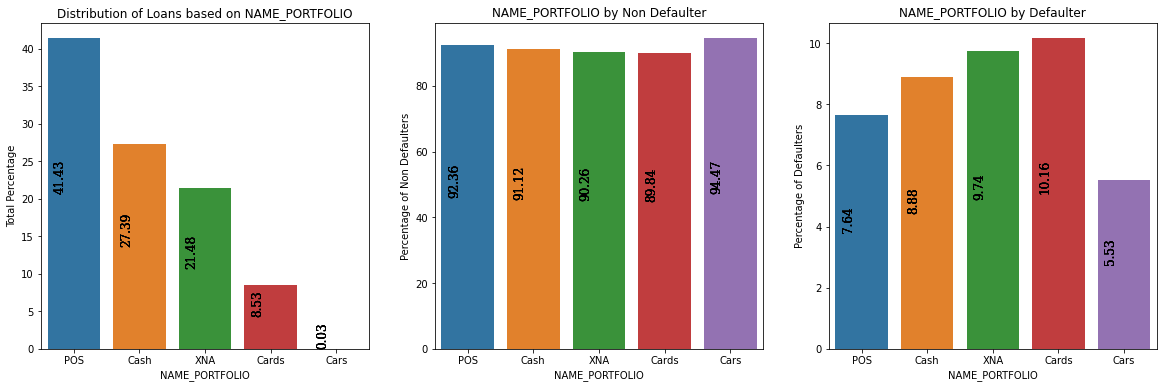

In [576]:
categorical_plot(merged_df,'NAME_PORTFOLIO')

Cients with Cars Portofolio are less likely to default and ones with Cards are more likely to

**FAMILY STATUS ,CONTRACT STATUS AND  TARGET**

<Figure size 1440x432 with 0 Axes>

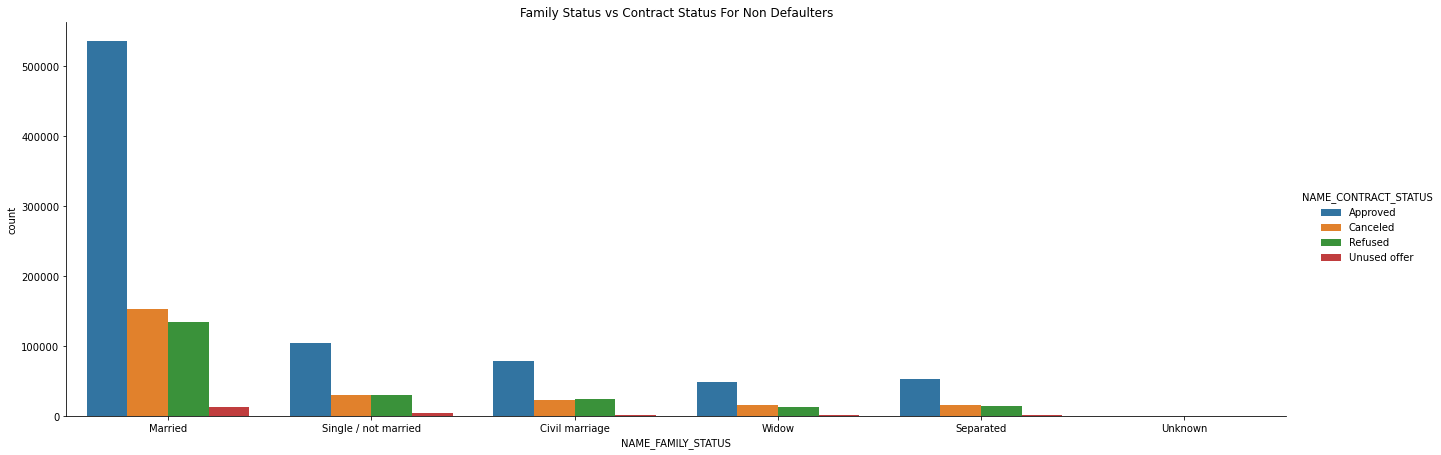

<Figure size 1440x432 with 0 Axes>

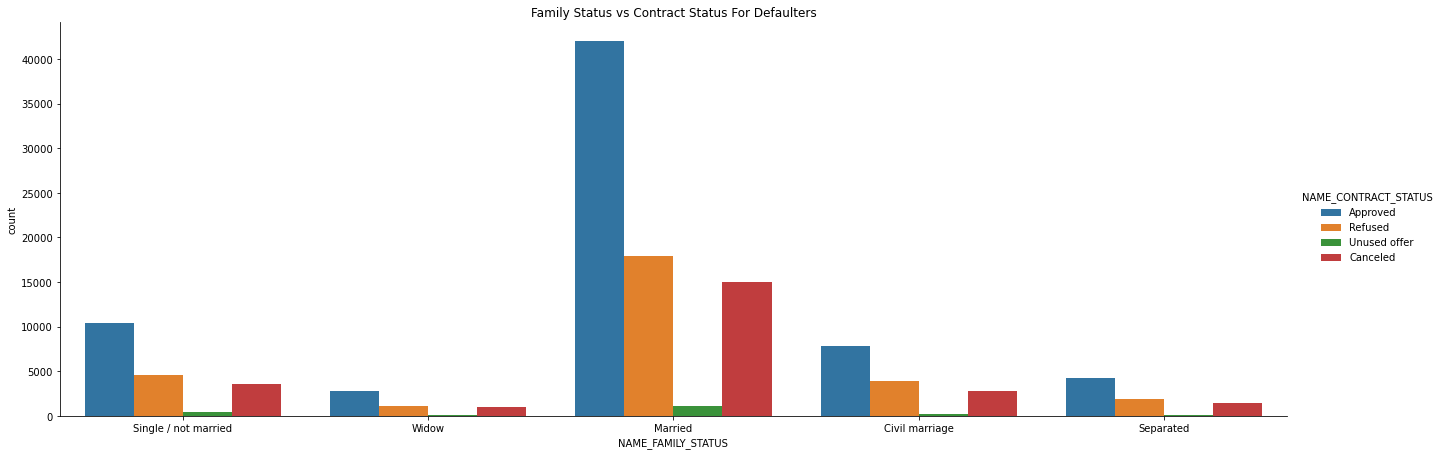

In [577]:
plt.figure(figsize=(20,6))
df=merged_df[merged_df['TARGET']==0]
sns.catplot(x="NAME_FAMILY_STATUS", hue="NAME_CONTRACT_STATUS", data=df, kind="count",height=6,aspect=3)
plt.title('Family Status vs Contract Status For Non Defaulters')
plt.show()
plt.figure(figsize=(20,6))
df=merged_df[merged_df['TARGET']==1]
sns.catplot(x="NAME_FAMILY_STATUS", hue="NAME_CONTRACT_STATUS", data=df, kind="count",height=6,aspect=3)
plt.title('Family Status vs Contract Status For Defaulters')
plt.show()

**INCOME STATUS ,CONTRACT STATUS AND  TARGET**

<Figure size 1440x432 with 0 Axes>

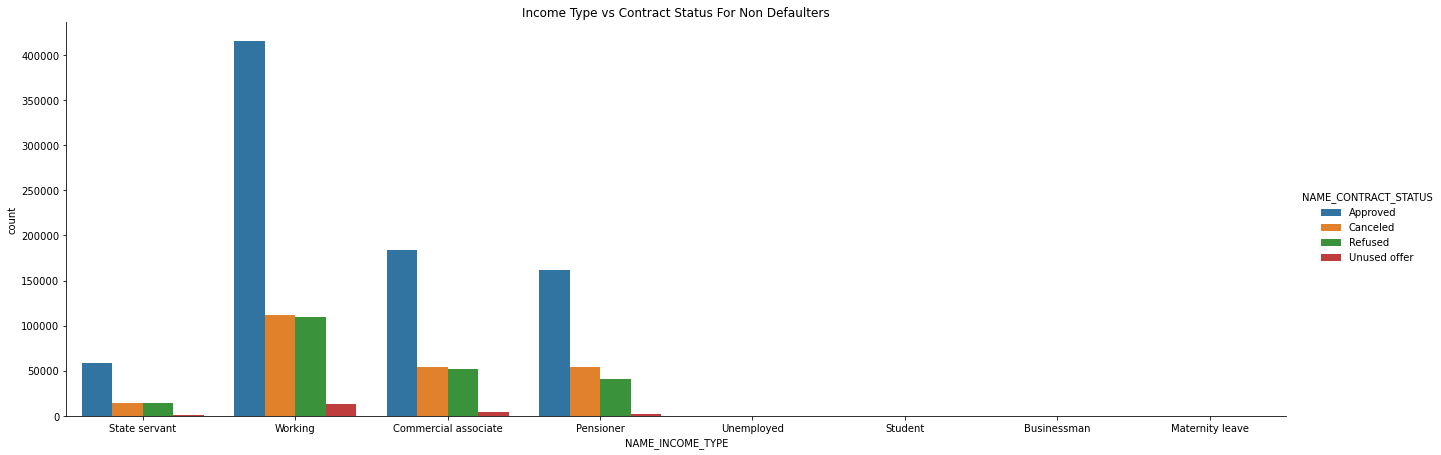

<Figure size 1440x432 with 0 Axes>

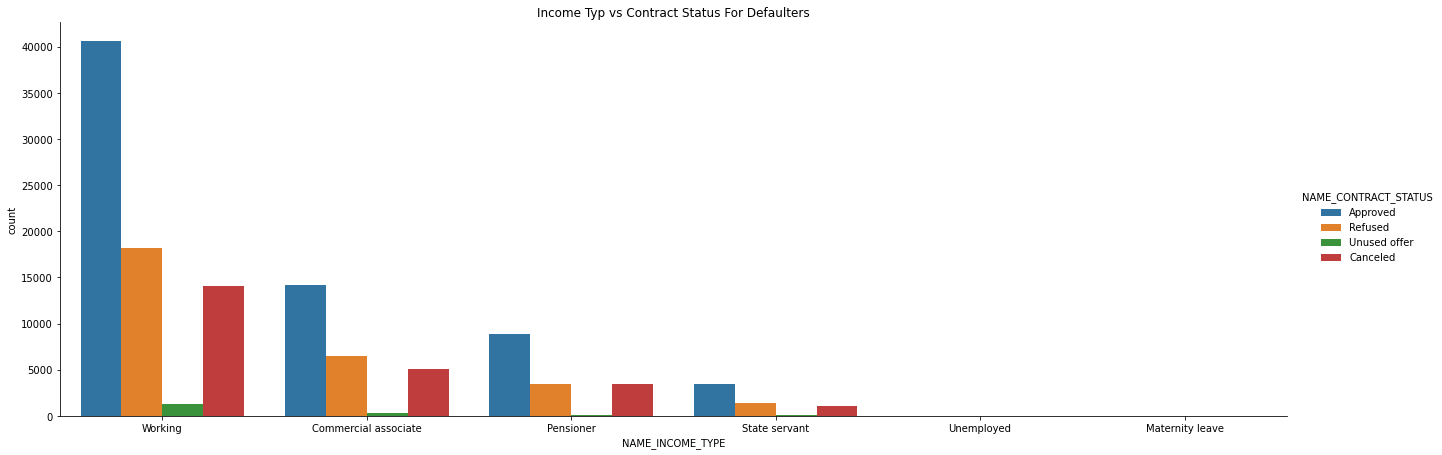

In [578]:
plt.figure(figsize=(20,6))
df=merged_df[merged_df['TARGET']==0]
sns.catplot(x="NAME_INCOME_TYPE", hue="NAME_CONTRACT_STATUS", data=df, kind="count",height=6,aspect=3)
plt.title('Income Type vs Contract Status For Non Defaulters')
plt.show()
plt.figure(figsize=(20,6))
df=merged_df[merged_df['TARGET']==1]
sns.catplot(x="NAME_INCOME_TYPE", hue="NAME_CONTRACT_STATUS", data=df, kind="count",height=6,aspect=3)
plt.title('Income Typ vs Contract Status For Defaulters')
plt.show()